In [5]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for converting countryshortname to continent
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

#to get longitude and latitude data from country name
from geopy.geocoders import Nominatim

#to get population of each country
import datetime
import wbdata

#for creating a world map (User Distributions around the world)
import folium
from folium.plugins import MarkerCluster

#for A/B testing
import statsmodels
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats import weightstats as stests
from scipy.stats import ttest_ind

#for supervised and unsupervised learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
from sklearn.cluster import KMeans

#k-means
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

#### Load Data

In [6]:
#load data
df = pd.read_csv("C:\\Users\\12132\\Desktop\\John\\Resume\\Microsoft\\PhotosUserProfile.csv", encoding='latin-1')

#### Descriptive Data

In [7]:
df.dtypes

UserId                                int64
CountryShortName                     object
IsTouchEnabled                         bool
FormFactor                           object
NumberOfActiveDaysInPhotosApp         int64
TotalLaunchCount                      int64
LaunchViaCropPicker                   int64
LaunchViaWindowsCameraRoll            int64
LaunchViaLumiaCameraRoll              int64
LaunchViaStorageSense                 int64
LaunchViaDrmViewer                    int64
LaunchByImportProtocol                int64
LaunchByImportContent                 int64
LaunchByTileAndTaskBar                int64
LaunchBySearch                        int64
LaunchByFile                          int64
LaunchByProtocol                      int64
LaunchByFileOpenPicker                int64
LaunchByDevice                        int64
LaunchByProtocolResults               int64
PicturesViewed                        int64
VideosViewed                          int64
ImageEdit                       

In [8]:
df.describe().transpose()

count          mean           std  min  \
UserId                            71696.0  35848.500000  20696.996787  1.0   
NumberOfActiveDaysInPhotosApp     71696.0      4.667778      4.825343  1.0   
TotalLaunchCount                  71696.0     20.553141     43.970784  0.0   
LaunchViaCropPicker               71696.0      0.014087      0.539089  0.0   
LaunchViaWindowsCameraRoll        71696.0      0.060980      1.188499  0.0   
LaunchViaLumiaCameraRoll          71696.0      0.000000      0.000000  0.0   
LaunchViaStorageSense             71696.0      0.005788      0.114783  0.0   
LaunchViaDrmViewer                71696.0      0.000000      0.000000  0.0   
LaunchByImportProtocol            71696.0      0.000279      0.017515  0.0   
LaunchByImportContent             71696.0      0.001186      0.073270  0.0   
LaunchByTileAndTaskBar            71696.0      3.111861      8.220209  0.0   
LaunchBySearch                    71696.0      0.000000      0.000000  0.0   
LaunchByFile                      71696.0     17.147428     41.958126  0.0   
LaunchByProtocol                  71696.0      0.103813      1.824454  0.0   
LaunchByFileOpenPicker            71696.0      0.015203      0.579606  0.0   
LaunchByDevice                    71696.0      0.072054      1.837873  0.0   
LaunchByProtocolResults           71696.0      0.001716      0.080516  0.0   
PicturesViewed                    71696.0    157.487070    489.284882  0.0   
VideosViewed                      71696.0      2.191057     14.446561  0.0   
ImageEdit                         71696.0      0.859406     12.837967  0.0   
VideoTrimEdit                     71696.0      0.007713      0.140374  0.0   
SlideShowStarted                  71696.0      0.178002      0.942065  0.0   
ImportSessionStarted              71696.0      0.128082      2.159472  0.0   
ShareSessions                     71696.0      0.110536      1.716479  0.0   
PrintSessions                     71696.0      0.184836      1.896538  0.0   
ItemsShared                       71696.0      0.195157      7.978195  0.0   
ItemsDelete                       71696.0      1.193037     22.961729  0.0   
ItemsCopied                       71696.0      0.360257     13.839258  0.0   
ItemsImported                     71696.0      3.591386     74.065908  0.0   
FromLocal                         71696.0    784.647791   3119.690529  0.0   
FromOneDrive                      71696.0    553.496136   3255.145081  0.0   
NumberOfImages                    71696.0   1369.763962   4667.959965  0.0   
NumberOfVideos                    71696.0     25.783279    138.083245  0.0   
NumberOfPanos                     71696.0      0.028551      0.560212  0.0   
NumberOfRichMedia                 71696.0      2.416564    192.139652  0.0   
TotalFilesInCollection            71696.0   1397.992357   4765.904496  0.0   
NumberOfActiveDaysInOS            71696.0     18.621388      9.231483  1.0   
TotalTimeInAllAppsInMins          71696.0   7818.248005  27560.108312  1.0   
TotalTimeInAllPhotosAppsInMins    71696.0     83.271870    437.281809  0.0   
TotalTimeInPhotosAppInMins        71696.0     19.610243     87.932700  0.0   
TotalTimeInOtherPhotosAppsInMins  36428.0    124.868151    564.086231  0.0   

                                       25%      50%       75%       max  
UserId                            17924.75  35848.5  53772.25   71696.0  
NumberOfActiveDaysInPhotosApp         1.00      3.0      6.00      30.0  
TotalLaunchCount                      3.00      8.0     22.00    3344.0  
LaunchViaCropPicker                   0.00      0.0      0.00      73.0  
LaunchViaWindowsCameraRoll            0.00      0.0      0.00     196.0  
LaunchViaLumiaCameraRoll              0.00      0.0      0.00       0.0  
LaunchViaStorageSense                 0.00      0.0      0.00       8.0  
LaunchViaDrmViewer                    0.00      0.0      0.00       0.0  
LaunchByImportProtocol                0.00      0.0      0.00       2.0  
LaunchByImportConte

In [9]:
# Check missing data counts
df.isna().mean().round(4)*100

UserId                               0.00
CountryShortName                     0.01
IsTouchEnabled                       0.00
FormFactor                           0.90
NumberOfActiveDaysInPhotosApp        0.00
TotalLaunchCount                     0.00
LaunchViaCropPicker                  0.00
LaunchViaWindowsCameraRoll           0.00
LaunchViaLumiaCameraRoll             0.00
LaunchViaStorageSense                0.00
LaunchViaDrmViewer                   0.00
LaunchByImportProtocol               0.00
LaunchByImportContent                0.00
LaunchByTileAndTaskBar               0.00
LaunchBySearch                       0.00
LaunchByFile                         0.00
LaunchByProtocol                     0.00
LaunchByFileOpenPicker               0.00
LaunchByDevice                       0.00
LaunchByProtocolResults              0.00
PicturesViewed                       0.00
VideosViewed                         0.00
ImageEdit                            0.00
VideoTrimEdit                     

#### Create a binary class: Photos and Others

In [10]:
# Create two classes: Photos vs. Others based on "MostUsedPhotoApp"
df['PhotoApp'] = np.where(df['MostUsedPhotoApp']=='Photos', 'Photos', 'Others')

#### EDA - User Demographics (Location, Age, and Gender)

In [11]:
def freq_count(col):
    freq_df = df[col].value_counts(dropna=False, normalize=True).rename_axis(col).reset_index(name='percent')
    freq_df['percent']= freq_df['percent'].round(4)*100
    return freq_df

In [12]:
def barplot(data, col):
    #plt.style.use('fivethirtyeight')
    fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(18, 8))
    data_p= data.loc[data['PhotoApp']=='Photos']
    data_o= data.loc[data['PhotoApp']=='Others']
        
    data.groupby(col)[col].count().plot(kind='barh', ax=ax1, title= (col + ' Total'))
    data_p.groupby(col)[col].count().plot(kind='barh', ax=ax2, title=(col + ' Photos'))
    data_o.groupby(col)[col].count().plot(kind='barh', ax=ax3, title=(col + ' Others'))
    return plt.show()

##### Location

In [13]:
# Frequency based on Country
user_freq = freq_count('CountryShortName')
user_freq

#Total of 206 countries are represented in this dataset. The largest user base is from the U.S. followed by Brazil and China.
#I will map these countries to corresponding continents to reduce dimensionality. 

CountryShortName  percent
0               United States    12.08
1                      Brazil     9.08
2                       China     8.34
3          Russian Federation     5.85
4                       India     4.54
5                     Germany     4.03
6                      Mexico     3.75
7              United Kingdom     3.14
8                      France     2.45
9                    Colombia     1.91
10                     Canada     1.79
11                    Ukraine     1.71
12                  Indonesia     1.60
13                      Spain     1.53
14                      Italy     1.49
15                     Poland     1.42
16                Netherlands     1.31
17                  Australia     1.30
18                   Thailand     1.23
19                   Viet Nam     1.18
20                  Argentina     1.18
21                  Venezuela     1.17
22                       Peru     1.11
23                     Turkey     1.11
24                   Pakistan     1.10
25                      Egypt     1.07
26                Philippines     0.92
27                      Japan     0.79
28               South Africa     0.71
29                    Ecuador     0.70
..                        ...      ...
176             Åland Islands     0.00
177                Tajikistan     0.00
178  Turks and Caicos Islands     0.00
179                      Guam     0.00
180                    Gambia     0.00
181  Northern Mariana Islands     0.00
182                   Vanuatu     0.00
183          Papua New Guinea     0.00
184     Virgin Islands (U.S.)     0.00
185                   Bahamas     0.00
186         Equatorial Guinea     0.00
187                   Comoros     0.00
188              Turkmenistan     0.00
189                   Liberia     0.00
190                 Greenland     0.00
191                     Yemen     0.00
192                  Djibouti     0.00
193                   Burundi     0.00
194     Sao Tome and Principe     0.00
195  Virgin Islands (British)     0.00
196                    Guinea     0.00
197                Mauritania     0.00
198                    Bhutan     0.00
199             French Guiana     0.00
200                    Kosovo     0.00
201                    Monaco     0.00
202          Marshall Islands     0.00
203               South Sudan     0.00
204                  Anguilla     0.00
205                San Marino     0.00

[206 rows x 2 columns]

##### Extract Country names and Continents

In [14]:
#Using pycountry_convert to convert countryshortnames to alpha-2 codes then to continent
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [15]:
#get country and continent info
df['codes'] = df['CountryShortName'].apply(get_continent)

split = df['codes'].astype(str).str.strip('()').str.split(',', expand=True)
#replace aphostrophes and white spaces
df['Country'] =split[0].str.replace("'",'').replace("'",'').str.strip()
df['Continent'] =split[1].str.replace("'",'').replace("'",'').str.strip()

In [16]:
freq_count('Continent')

# About 1/3 of total users are based in Europe, followed by 26% in Asia. 

Continent  percent
0        EU    31.34
1        AS    26.13
2        NA    19.26
3        SA    16.12
4        AF     4.49
5        OC     1.69
6   Unknown     0.96

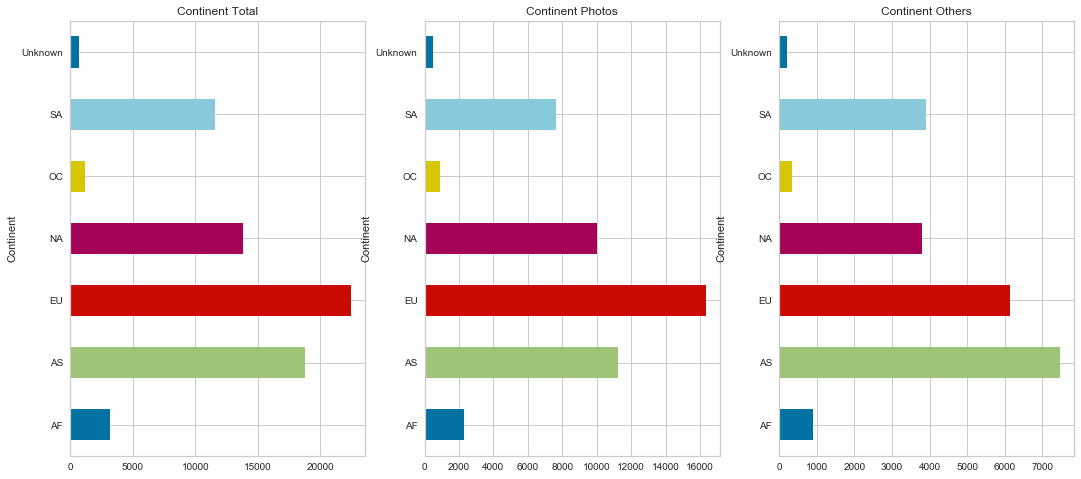

In [17]:
barplot(df, 'Continent')

#Photos users are mainly located in Europe, followed by Asia and North America whereas more users from Asia are using other photo apps. 

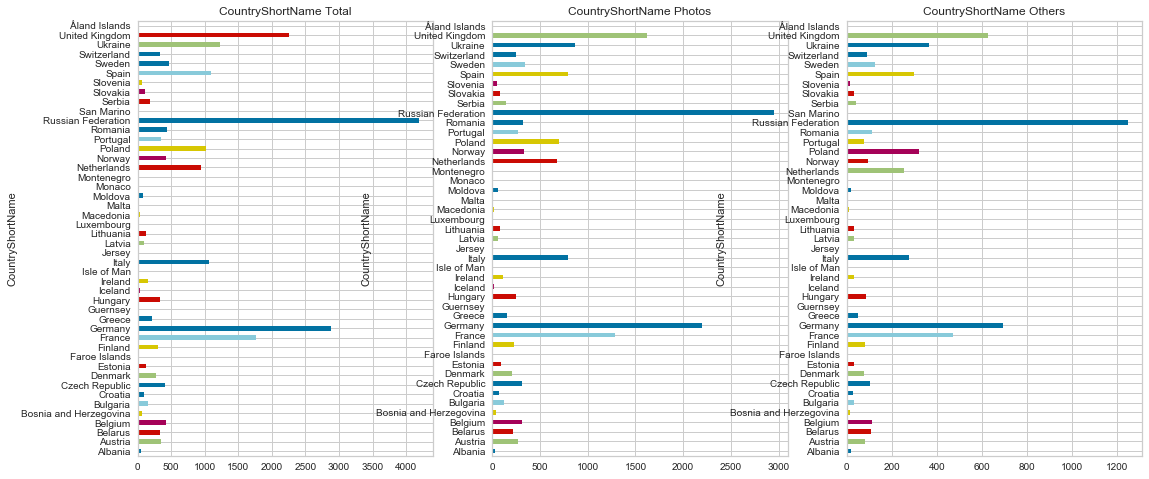

In [18]:
# Break-down: European countries
data = df[df['Continent']=='EU']
barplot(data, 'CountryShortName')

#Top Photos users in EU are located in Russia, Germany, UK, and France. Similar distributions are seen in other photo apps users. 

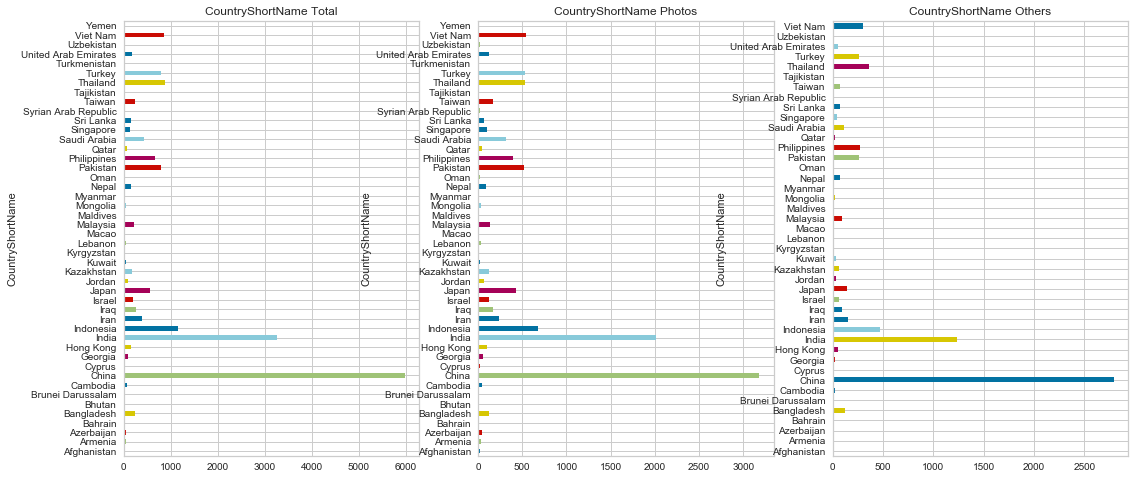

In [15]:
# Break-down: Asian countries
data = df[df['Continent']=='AS']
barplot(data, 'CountryShortName')

#Top Photos users in Asia are located in China, India, Indonesia, Pakistan, and South East Asia. Similar distributions are seen in other photo apps users. 

##### Get Longitude and Latitude

In [19]:
#function to get Longitude and Latitude
geolocator = Nominatim()

def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [17]:
user_freq['Geolocate'] = user_freq['CountryShortName'].apply(geolocate)

In [18]:
# split into longitude and latitude columns
split = user_freq['Geolocate'].astype(str).str.strip('()').str.split(', ', expand=True)
user_freq['Latitude'] =split[0].astype('float64')
user_freq['Longitude'] =split[1].astype('float64')

# remove na
data= user_freq
data = data[~data['Latitude'].isna()]

In [19]:
# Create a world map to show distributions of users 
#empty map
m= folium.Map(tiles="cartodbpositron")

marker_cluster = MarkerCluster().add_to(m)

for i in range(len(data)):
        lat = data.iloc[i]['Latitude']
        long = data.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    %of Users : {}<br>"""
        popup_text = popup_text.format(data.iloc[i]['CountryShortName'],
                                   data.iloc[i]['percent']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)

#show the map
m

##### Obtain Population Data

In [20]:
#to get population of each country
import datetime
import wbdata

# Bring population data (world bank data)
#set time to 2018 to get 2018 population numbers
data_dates = (datetime.datetime(2018,1,1), datetime.datetime(2018,1,1))
#indicator = total population
indicators={"SP.POP.TOTL":"totalpop"}

#get unique country names
unique_country = list(df['Country'].unique().tolist())

#loop through each country to get population
data = pd.DataFrame([])
for c in unique_country:
    try:
        wf = wbdata.get_dataframe(indicators,country=c,data_date=data_dates)
        wf.reset_index(inplace=True)
        wf['Country'] = c
        data = data.append(wf)
    except:
        pass

In [21]:
#check population data
data.head()

date      totalpop Country
0  2018  1.613560e+08      BD
0  2018  4.462252e+07      UA
0  2018  1.392730e+09      CN
0  2018  5.447011e+06      SK
0  2018  3.602914e+07      MA

In [22]:
#merge back to df
df = df.merge(data, on='Country', how='left')

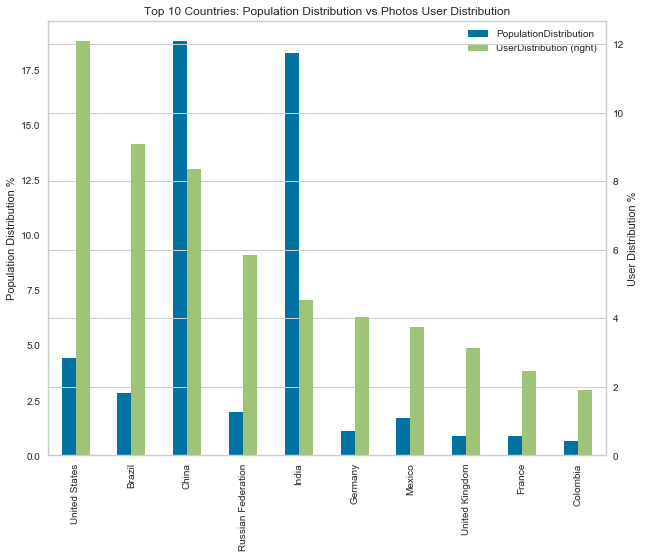

In [23]:
# Pie plots: User distribution vs. Population distribution
data_p= df.loc[df['PhotoApp']=='Photos']

freq_df = data_p.groupby(['CountryShortName']).agg({'totalpop': 'mean'})
freq_df['pop_percent'] = freq_df['totalpop']/(freq_df['totalpop'].sum()).round(2)*100

#merge with user_freq
freq_comp = user_freq.merge(freq_df, left_on='CountryShortName', right_on='CountryShortName')

#Top 20 Countries User distribution (bar plot)
top10 = freq_comp[['CountryShortName','pop_percent','percent']][0:10]
top10.columns = ['Country', 'PopulationDistribution','UserDistribution']

#show top 10 country user and population distributios
top10.plot(kind= 'bar' , secondary_y= 'UserDistribution' ,rot= 90,figsize=(10, 8))

ax1, ax2 = plt.gcf().get_axes() 

ax1.set_xticklabels(top10['Country'])
ax1.set_title('Top 10 Countries: Population Distribution vs Photos User Distribution')
ax1.set_ylabel('Population Distribution %')
ax2.set_ylabel('User Distribution %')
plt.show()

In [24]:
# AgeGroup
freq_count('AgeGroup')

#[25-35] AgeGroup is the largest user base;however, clsoe to 50% is missing.

AgeGroup  percent
0      NaN    49.84
1  [25-35)    15.22
2  [35-50)    12.77
3  [18-25)    12.38
4     >=50     6.68
5      <18     3.10

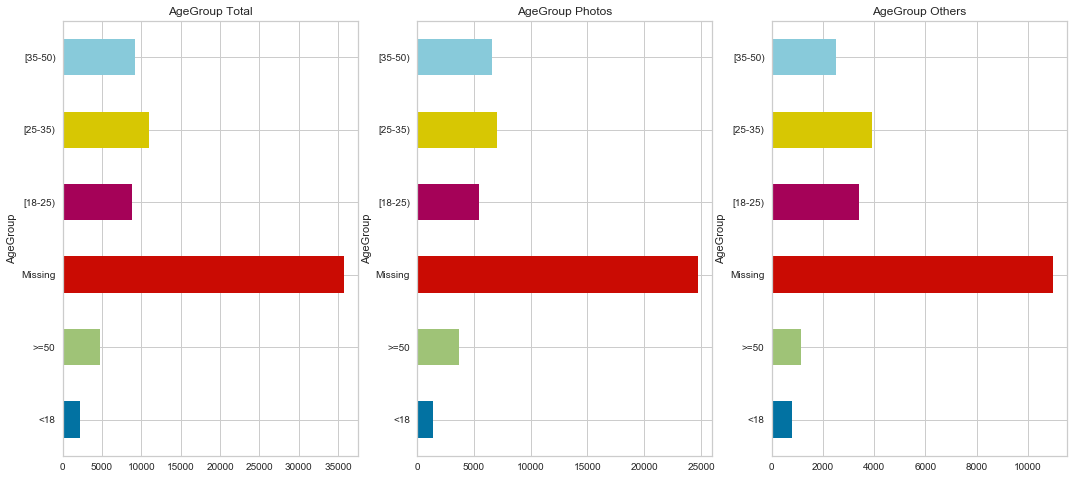

In [25]:
df['AgeGroup'].fillna('Missing', inplace=True)
barplot(df, 'AgeGroup')

#Looking at the distribution of AgeGroup, Photos app users are a bit older (more users in [35,50) bucket) than other photo app users. 
#However, since 50% of the data is missing, this finding is not conclusive. 

In [26]:
# Gender
freq_count('Gender')

#Female is grossly under-represented. We can infer that perhaps a large portion of missing gender is female. 

Gender  percent
0    NaN    54.16
1      M    40.55
2      F     5.29

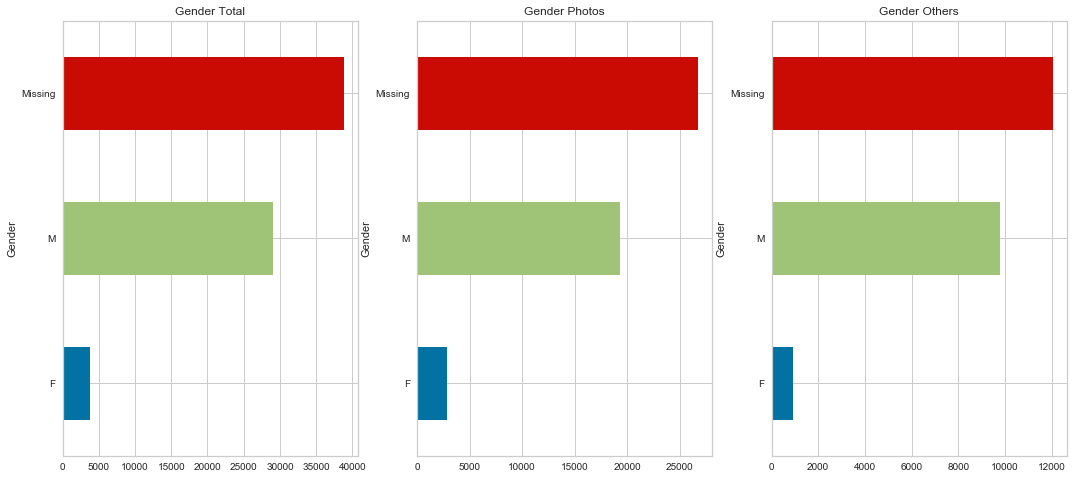

In [27]:
df['Gender'].fillna('Missing', inplace=True)
barplot(df, 'Gender')

#In both cases, Male population is dominating.

Text(0.5, 1.0, 'Gender and AgeGroup of Other Photo App Users')

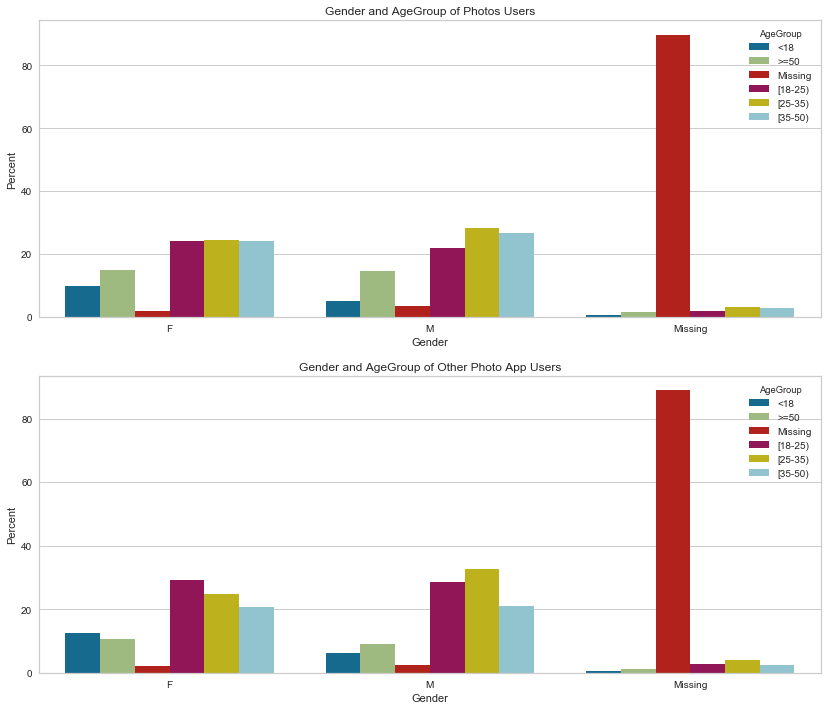

In [28]:
# Create cross-tabs (Gender and Age)

fig, ax = plt.subplots(2,1, figsize=(14, 12))
df_p = df[df['PhotoApp']=='Photos']
ct = pd.crosstab(df_p['Gender'],df_p['AgeGroup'], normalize='index').round(4)*100
stacked = ct.stack().reset_index().rename(columns={0:'Percent'})
sns.barplot(x=stacked.Gender, y=stacked.Percent, hue=stacked.AgeGroup, ax=ax[0])
ax[0].set_title("Gender and AgeGroup of Photos Users")

df_o = df[df['PhotoApp']=='Others']
ct = pd.crosstab(df_o['Gender'],df_o['AgeGroup'], normalize='index').round(4)*100
stacked = ct.stack().reset_index().rename(columns={0:'Percent'})
sns.barplot(x=stacked.Gender, y=stacked.Percent, hue=stacked.AgeGroup, ax=ax[1])
ax[1].set_title("Gender and AgeGroup of Other Photo App Users")

# When broken-down by Gender and AgeGroup, it is apparent both male and female users of Photos app is a bit older than other photo apps. 

In [29]:
# Check missing counts of Gender and AgeGroup by Continent
ct1 =pd.crosstab(index=df['Continent'], columns=[df['Gender'],df['AgeGroup']], normalize='index').round(4)*100 
ct1

#In both Photos and Other app users, female users are under represented in this data set.

Gender        F                                           M                \
AgeGroup    <18  >=50 Missing [18-25) [25-35) [35-50)   <18  >=50 Missing   
Continent                                                                   
AF         0.31  0.06    0.00    0.90    0.53    0.34  1.65  1.30    0.71   
AS         0.28  0.11    0.05    1.13    0.80    0.53  2.28  2.09    0.92   
EU         0.75  0.99    0.06    1.36    1.42    1.37  2.41  7.30    1.13   
NA         0.58  1.35    0.35    1.42    1.80    2.08  1.96  8.46    2.72   
OC         0.82  1.32    0.00    1.48    1.73    2.06  2.31  7.74    1.81   
SA         0.68  0.67    0.03    1.74    1.51    1.31  2.25  2.99    0.40   
Unknown    0.58  0.29    0.00    0.73    1.16    0.58  2.91  2.76    0.44   

Gender                            Missing                                \
AgeGroup  [18-25) [25-35) [35-50)     <18  >=50 Missing [18-25) [25-35)   
Continent                                                                 
AF           8.54    9.75    6.15    0.19  0.12   67.64    0.65    0.56   
AS          13.00   14.38    7.46    0.28  0.30   52.30    1.38    1.79   
EU           8.70   11.21   11.39    0.37  1.43   43.10    1.64    2.83   
NA           8.66   12.63   13.99    0.30  0.77   39.13    0.95    1.49   
OC           7.99   12.44   10.30    0.41  3.05   39.95    0.91    2.22   
SA           9.12    9.84    7.77    0.26  0.22   58.98    0.50    1.03   
Unknown      5.96    9.74   11.77    0.00  1.16   57.56    1.31    1.60   

Gender             
AgeGroup  [35-50)  
Continent          
AF           0.59  
AS           0.90  
EU           2.56  
NA           1.34  
OC           3.46  
SA           0.69  
Unknown      1.45

In [30]:
# Check missing counts of Gender and AgeGroup by Continent (Photos Users)
data = df[df['PhotoApp']=='Photos']
ct2 =pd.crosstab(index=data['Continent'], columns=[data['Gender'], data['AgeGroup']], normalize='index').round(4)*100 
ct2

Gender        F                                           M                \
AgeGroup    <18  >=50 Missing [18-25) [25-35) [35-50)   <18  >=50 Missing   
Continent                                                                   
AF         0.22  0.09    0.00    0.91    0.56    0.48  1.34  1.17    0.69   
AS         0.31  0.12    0.06    1.27    0.91    0.64  2.07  2.47    0.92   
EU         0.77  1.18    0.04    1.36    1.54    1.53  2.20  7.82    1.24   
NA         0.55  1.51    0.38    1.52    1.89    2.26  1.89  9.11    2.83   
OC         1.02  1.13    0.00    1.70    1.81    2.49  1.81  7.94    2.04   
SA         0.68  0.74    0.05    1.78    1.67    1.41  2.09  3.03    0.46   
Unknown    0.82  0.21    0.00    0.82    1.24    0.62  2.27  2.89    0.21   

Gender                            Missing                                \
AgeGroup  [18-25) [25-35) [35-50)     <18  >=50 Missing [18-25) [25-35)   
Continent                                                                 
AF           7.59    8.85    6.12    0.13  0.13   69.63    0.82    0.61   
AS          11.64   13.02    8.00    0.24  0.38   54.22    1.14    1.57   
EU           7.85   10.44   11.84    0.37  1.49   43.56    1.44    2.62   
NA           7.44   12.06   13.96    0.29  0.74   39.91    0.90    1.44   
OC           6.92   11.22   11.45    0.57  3.63   40.14    0.68    2.04   
SA           8.59    9.30    7.82    0.21  0.22   59.91    0.38    0.91   
Unknown      5.77    9.28   12.58    0.00  0.41   59.18    1.03    1.44   

Gender             
AgeGroup  [35-50)  
Continent          
AF           0.65  
AS           1.02  
EU           2.72  
NA           1.34  
OC           3.40  
SA           0.73  
Unknown      1.24

In [31]:
# Check missing counts of Gender and AgeGroup by Continent (Other App Users)
data = df[df['PhotoApp']=='Others']
ct3 =pd.crosstab(index=data['Continent'], columns=[data['Gender'],data['AgeGroup']], normalize='index').round(4)*100 
ct3

Gender        F                                           M                \
AgeGroup    <18  >=50 Missing [18-25) [25-35) [35-50)   <18  >=50 Missing   
Continent                                                                   
AF         0.55  0.00    0.00    0.87    0.44    0.00  2.40  1.64    0.77   
AS         0.24  0.09    0.03    0.92    0.64    0.36  2.61  1.51    0.94   
EU         0.69  0.49    0.10    1.34    1.09    0.93  2.97  5.91    0.85   
NA         0.66  0.95    0.29    1.16    1.56    1.61  2.16  6.75    2.43   
OC         0.30  1.81    0.00    0.90    1.51    0.90  3.61  7.23    1.20   
SA         0.69  0.51    0.00    1.66    1.20    1.13  2.56  2.92    0.28   
Unknown    0.00  0.49    0.00    0.49    0.99    0.49  4.43  2.46    0.99   

Gender                            Missing                                \
AgeGroup  [18-25) [25-35) [35-50)     <18  >=50 Missing [18-25) [25-35)   
Continent                                                                 
AF          10.93   12.02    6.23    0.33  0.11   62.62    0.22    0.44   
AS          15.04   16.43    6.66    0.33  0.19   49.42    1.74    2.11   
EU          10.97   13.25   10.20    0.38  1.27   41.85    2.17    3.38   
NA          11.90   14.14   14.06    0.34  0.87   37.06    1.08    1.64   
OC          10.84   15.66    7.23    0.00  1.51   39.46    1.51    2.71   
SA          10.14   10.89    7.66    0.36  0.23   57.15    0.74    1.26   
Unknown      6.40   10.84    9.85    0.00  2.96   53.69    1.97    1.97   

Gender             
AgeGroup  [35-50)  
Continent          
AF           0.44  
AS           0.72  
EU           2.15  
NA           1.35  
OC           3.61  
SA           0.61  
Unknown      1.97

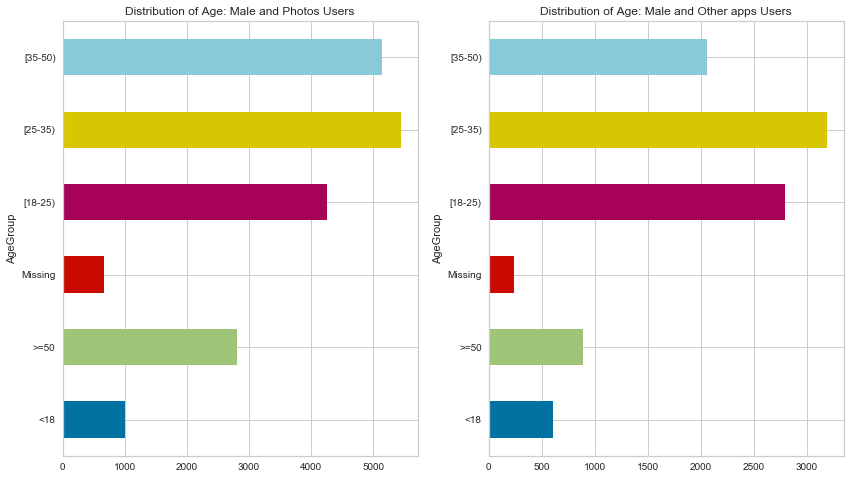

In [32]:
dt1 = df[(df['Gender']=='M') &(df['PhotoApp']=='Photos')] #& (df['AgeGroup'].isin(['<18','[18-25)']))]
dt2 = df[(df['Gender']=='M') &(df['PhotoApp']=='Others')] #& (df['AgeGroup'].isin(['<18','[18-25)']))]

fig, ax = plt.subplots(1,2, figsize=(14, 8))
dt1.groupby(['AgeGroup'])['AgeGroup'].count().plot(kind='barh', ax=ax[0], title= ('Distribution of Age: Male and Photos Users'))
dt2.groupby(['AgeGroup'])['AgeGroup'].count().plot(kind='barh',ax=ax[1],  title= ('Distribution of Age: Male and Other apps Users'))

#Regarding the male users, more number of users younger than 25 are presented for other photo apps which there are more number of users who are older than 

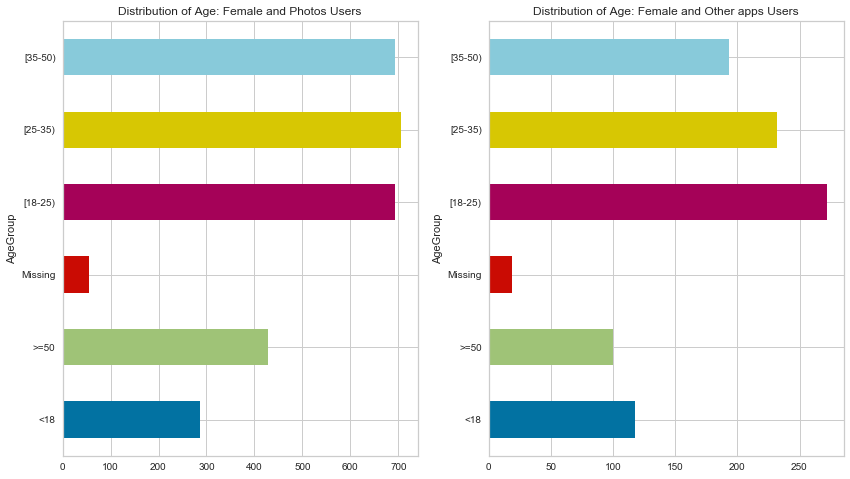

In [33]:
dt1 = df[(df['Gender']=='F') &(df['PhotoApp']=='Photos')] #& (df['AgeGroup'].isin(['<18','[18-25)']))]
dt2 = df[(df['Gender']=='F') &(df['PhotoApp']=='Others')] #& (df['AgeGroup'].isin(['<18','[18-25)']))]

fig, ax = plt.subplots(1,2, figsize=(14, 8))
dt1.groupby(['AgeGroup'])['AgeGroup'].count().plot(kind='barh', ax=ax[0], title= ('Distribution of Age: Female and Photos Users'))
dt2.groupby(['AgeGroup'])['AgeGroup'].count().plot(kind='barh',ax=ax[1],  title= ('Distribution of Age: Female and Other apps Users'))

#Regarding the male users, more number of users younger than 25 are presented for other photo apps which there are more number of users who are older than 

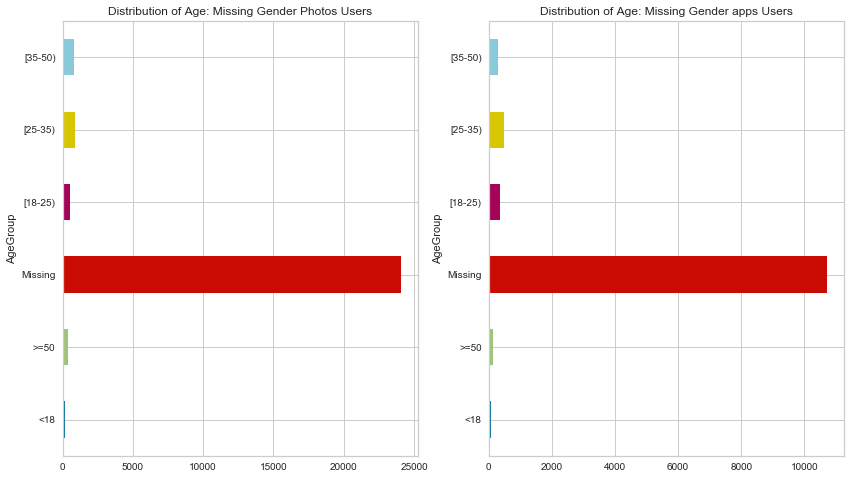

In [34]:
dt1 = df[(df['Gender']=='Missing') &(df['PhotoApp']=='Photos')] #& (df['AgeGroup'].isin(['<18','[18-25)']))]
dt2 = df[(df['Gender']=='Missing') &(df['PhotoApp']=='Others')] #& (df['AgeGroup'].isin(['<18','[18-25)']))]

fig, ax = plt.subplots(1,2, figsize=(14, 8))
dt1.groupby(['AgeGroup'])['AgeGroup'].count().plot(kind='barh', ax=ax[0], title= ('Distribution of Age: Missing Gender Photos Users'))
dt2.groupby(['AgeGroup'])['AgeGroup'].count().plot(kind='barh',ax=ax[1],  title= ('Distribution of Age: Missing Gender apps Users'))

#Users whose gender is not identified, most of them also don't have age information. 

In [35]:
# Create combined demographics variables 
df['Continent_Gender'] = df['Continent'] + '_' + df['Gender']
df['Continent_AgeGroup'] = df['Continent'] + '_'+ df['AgeGroup']
df['Gender_AgeGroup'] = df['Gender'] + '_'+ df['AgeGroup']
df['Continent_AgeGroup_Gender'] =df['Continent']+ '_' + df['Gender'] + '_' + df['AgeGroup']

#### EDA - Device Info (IsTouchEnabled, FormFactor)

In [36]:
# IsTouchEnabled  
freq_count('IsTouchEnabled')

IsTouchEnabled  percent
0           False    91.22
1            True     8.78

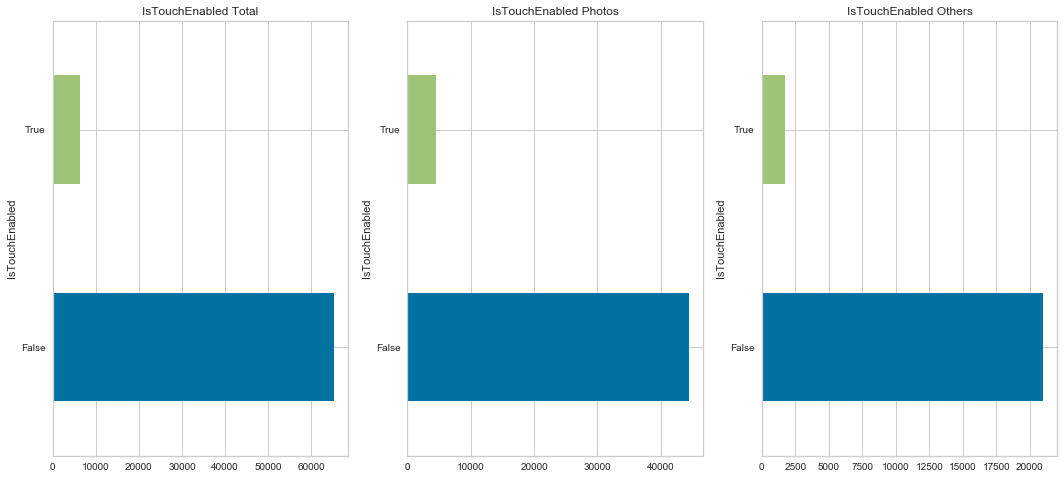

In [37]:
barplot(df,'IsTouchEnabled')

In [38]:
# FormFactor
freq_count('FormFactor')

FormFactor  percent
0     Notebook    53.70
1      Desktop    38.99
2        Other     2.58
3  LargeTablet     2.41
4     AllInOne     1.25
5          NaN     0.90
6  SmallTablet     0.18

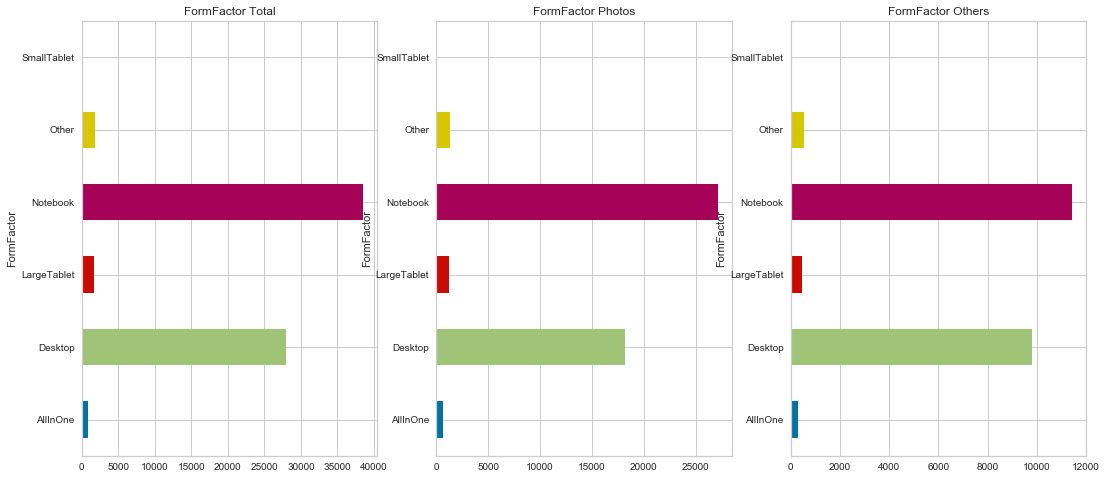

In [39]:
barplot(df, 'FormFactor')

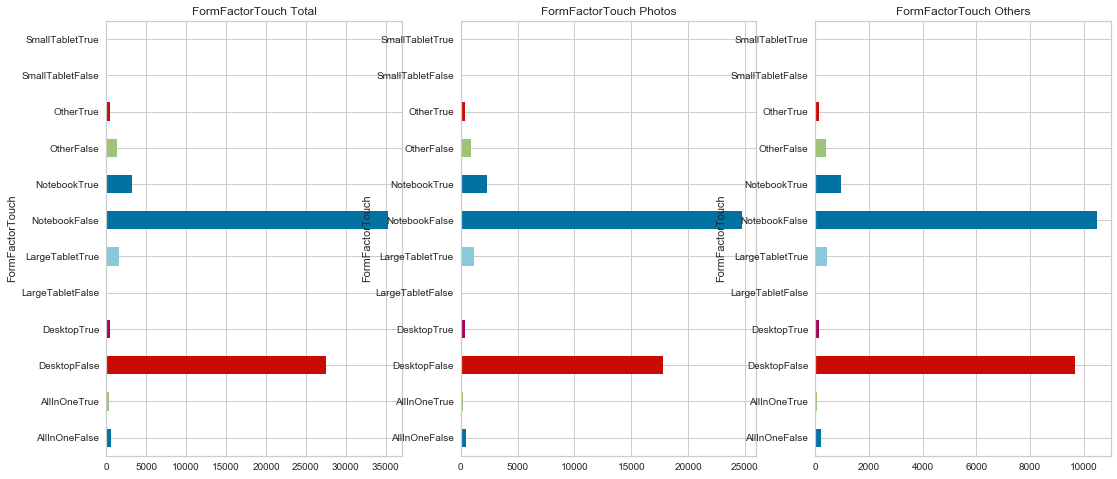

In [40]:
#create a combined variable
df['FormFactorTouch']= df['FormFactor'] + df['IsTouchEnabled'].astype(str)
barplot(df, 'FormFactorTouch')

Text(0.5, 1.0, 'TouchEnabled and FormFacto of Other Photo App Users')

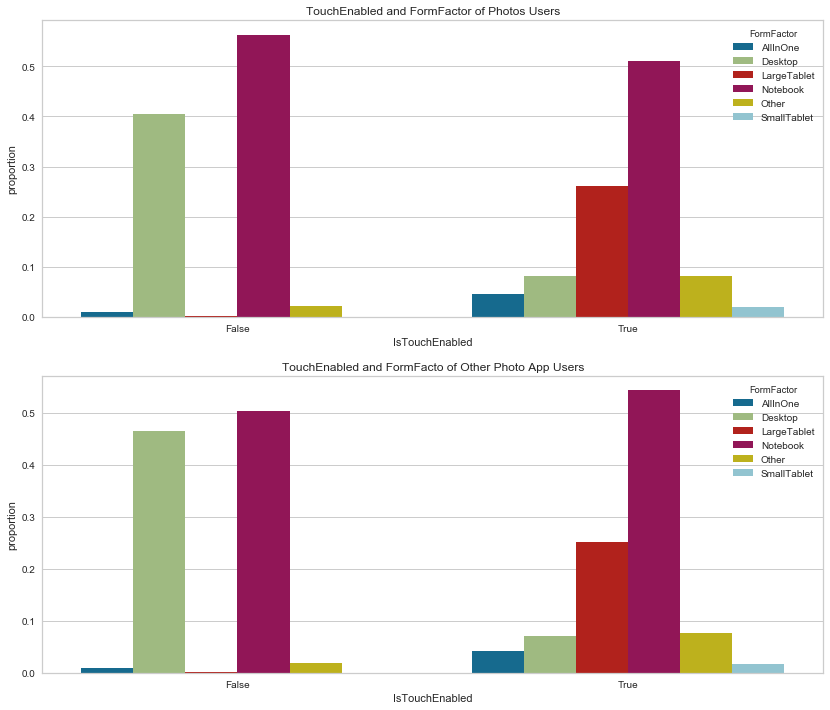

In [41]:
# Create cross-tabs (TouchEnabled and FormFactor)

fig, ax = plt.subplots(2,1, figsize=(14, 12))
df_p = df[df['PhotoApp']=='Photos']
ct = pd.crosstab(df_p['IsTouchEnabled'],df_p['FormFactor'], normalize='index')
stacked = ct.stack().reset_index().rename(columns={0:'proportion'})
sns.barplot(x=stacked.IsTouchEnabled, y=stacked.proportion, hue=stacked.FormFactor, ax=ax[0])
ax[0].set_title("TouchEnabled and FormFactor of Photos Users")

df_o= df[df['PhotoApp']=='Others']
ct = pd.crosstab(df_o['IsTouchEnabled'],df_o['FormFactor'], normalize='index')
stacked = ct.stack().reset_index().rename(columns={0:'proportion'})
sns.barplot(x=stacked.IsTouchEnabled, y=stacked.proportion, hue=stacked.FormFactor, ax=ax[1])
ax[1].set_title("TouchEnabled and FormFacto of Other Photo App Users")

# Notebook is used more widely when touch is not enabled for Photos user. In general, both user bases utilize devices and touchenabled functionality similiarly. 

#### EDA -Launch Channel

In [42]:
def hisplot(col):

    #do this for only float and integer variables
    if df[col].dtype in ['float64','int64']:
        
        fig, ax = plt.subplots(1, 3, figsize=(18,4))
        vals =  df[col].values
        splot=sns.distplot(vals, ax=ax[0], color='g', norm_hist =True, bins=50)
        #splot.set(xscale="log")
        ax[0].set_title('Total ' +col, fontsize=14)
        ax[0].set_xlim([min(vals), max(vals)])
        ax[0].text(vals.max()*0.7, 1/1.0e4, 'Mean: {:.2f}'.format(vals.mean()))  #1/1.0e3
 
        vals = df.loc[df['PhotoApp'] == 'Photos'][col].values
        splot=sns.distplot(vals, ax=ax[1], color='r', norm_hist =True, bins=50)
        ax[1].set_title('Photos ' +col, fontsize=14)
        ax[1].set_xlim([min(vals), max(vals)])
        ax[1].text(vals.max()*0.7,1/1.0e4, 'Mean: {:.2f}'.format(vals.mean()))

        vals = df.loc[df['PhotoApp'] == 'Others'][col].values
        splot=sns.distplot(vals, ax=ax[2], color='b', norm_hist =True, bins=50)
        ax[2].set_title('Others ' +col, fontsize=14)
        ax[2].set_xlim([min(vals), max(vals)])
        ax[2].text(vals.max()*0.7, 1/1.0e4, 'Mean: {:.2f}'.format(vals.mean()))

    return plt.show()

In [43]:
# NumberOfActiveDaysInPhotosApp
freq_count('NumberOfActiveDaysInPhotosApp')

NumberOfActiveDaysInPhotosApp  percent
0                               1    27.51
1                               2    17.71
2                               3    12.09
3                               4     8.58
4                               5     6.46
5                               6     5.05
6                               7     3.87
7                               8     3.03
8                               9     2.54
9                              10     2.09
10                             11     1.73
11                             12     1.56
12                             13     1.30
13                             14     0.96
14                             15     0.85
15                             16     0.71
16                             17     0.66
17                             18     0.55
18                             19     0.45
19                             20     0.39
20                             21     0.37
21                             22     0.30
22                             23     0.27
23                             24     0.21
24                             25     0.20
25                             26     0.16
26                             27     0.14
27                             28     0.11
28                             30     0.08
29                             29     0.07

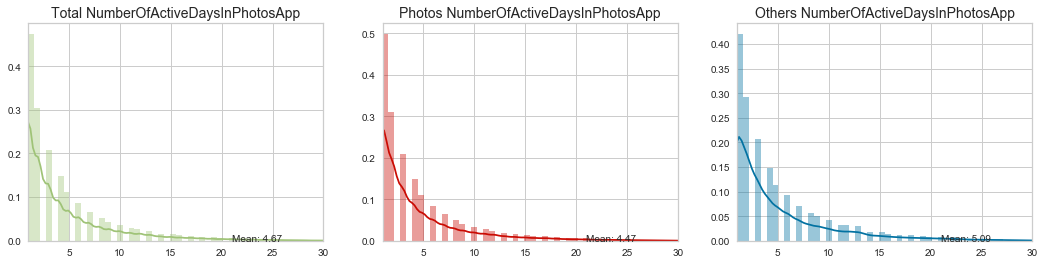

In [44]:
hisplot('NumberOfActiveDaysInPhotosApp')

In [45]:
# Launch related variables 
launch_cols = [a for a in df.columns if 'Launch' in a]
launch_df = df[launch_cols]
launch_df.describe().transpose()

count       mean        std  min  25%  50%  \
TotalLaunchCount            71696.0  20.553141  43.970784  0.0  3.0  8.0   
LaunchViaCropPicker         71696.0   0.014087   0.539089  0.0  0.0  0.0   
LaunchViaWindowsCameraRoll  71696.0   0.060980   1.188499  0.0  0.0  0.0   
LaunchViaLumiaCameraRoll    71696.0   0.000000   0.000000  0.0  0.0  0.0   
LaunchViaStorageSense       71696.0   0.005788   0.114783  0.0  0.0  0.0   
LaunchViaDrmViewer          71696.0   0.000000   0.000000  0.0  0.0  0.0   
LaunchByImportProtocol      71696.0   0.000279   0.017515  0.0  0.0  0.0   
LaunchByImportContent       71696.0   0.001186   0.073270  0.0  0.0  0.0   
LaunchByTileAndTaskBar      71696.0   3.111861   8.220209  0.0  0.0  0.0   
LaunchBySearch              71696.0   0.000000   0.000000  0.0  0.0  0.0   
LaunchByFile                71696.0  17.147428  41.958126  0.0  2.0  5.0   
LaunchByProtocol            71696.0   0.103813   1.824454  0.0  0.0  0.0   
LaunchByFileOpenPicker      71696.0   0.015203   0.579606  0.0  0.0  0.0   
LaunchByDevice              71696.0   0.072054   1.837873  0.0  0.0  0.0   
LaunchByProtocolResults     71696.0   0.001716   0.080516  0.0  0.0  0.0   

                             75%     max  
TotalLaunchCount            22.0  3344.0  
LaunchViaCropPicker          0.0    73.0  
LaunchViaWindowsCameraRoll   0.0   196.0  
LaunchViaLumiaCameraRoll     0.0     0.0  
LaunchViaStorageSense        0.0     8.0  
LaunchViaDrmViewer           0.0     0.0  
LaunchByImportProtocol       0.0     2.0  
LaunchByImportContent        0.0     9.0  
LaunchByTileAndTaskBar       2.0   420.0  
LaunchBySearch               0.0     0.0  
LaunchByFile                17.0  3343.0  
LaunchByProtocol             0.0   290.0  
LaunchByFileOpenPicker       0.0   148.0  
LaunchByDevice               0.0   383.0  
LaunchByProtocolResults      0.0    11.0

In [46]:
#Create LaunchOther variable and Create Percentage variables
df['LaunchByOther'] = df['TotalLaunchCount'] - df['LaunchByFile'] - df['LaunchByTileAndTaskBar']
df['LaunchByFilePercent'] =df['LaunchByFile'] /df['TotalLaunchCount']
df['LaunchByTileAndTaskBarPercent'] =df['LaunchByTileAndTaskBar'] /df['TotalLaunchCount']
df['LaunchByOtherPercent'] =df['LaunchByOther'] /df['TotalLaunchCount']

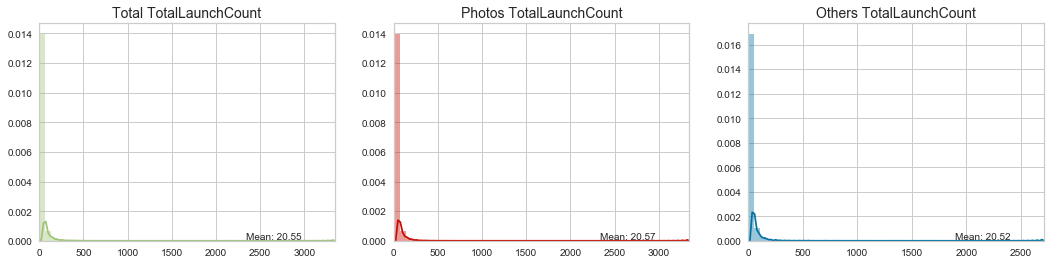

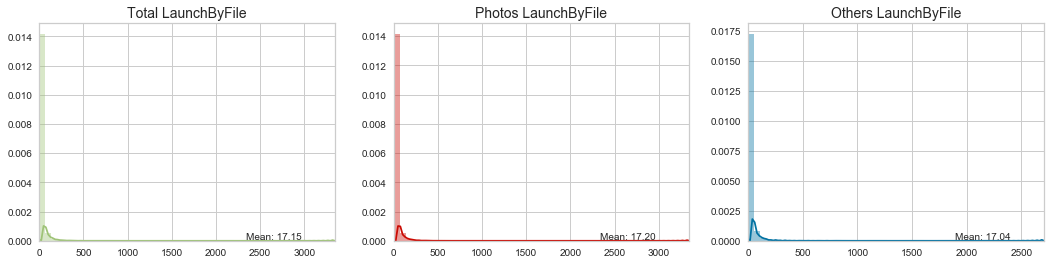

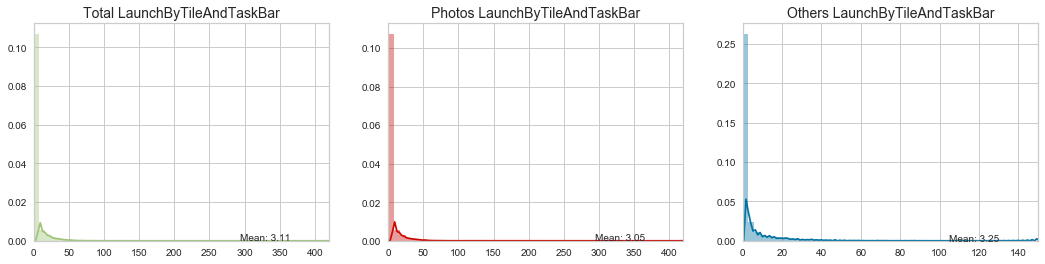

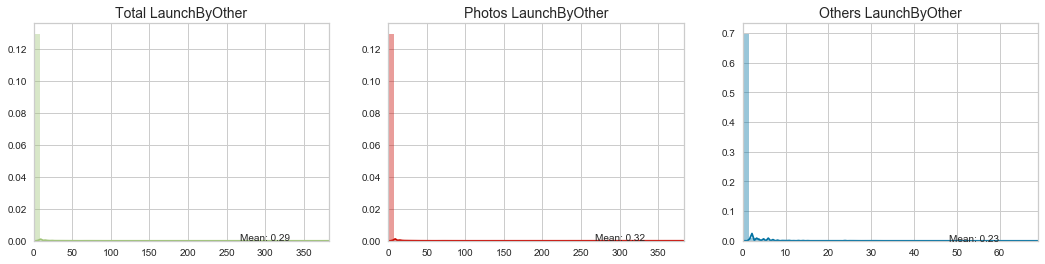

In [47]:
# Select top 4 launch variables
launch_cols = ['TotalLaunchCount', 'LaunchByFile', 'LaunchByTileAndTaskBar', 'LaunchByOther']

for l in launch_cols:
    hisplot(l)
#Looking at histograms below, a majority of total launch is from File, followed by Tile and Taskbar.

#### EDA - User Actions

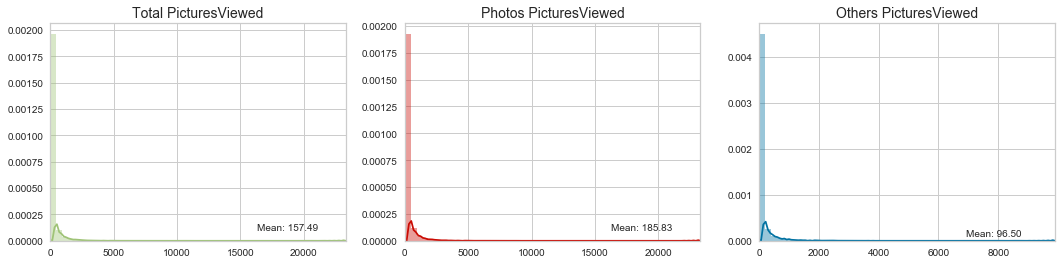

In [48]:
# 3. Pictures Viewed
hisplot('PicturesViewed')

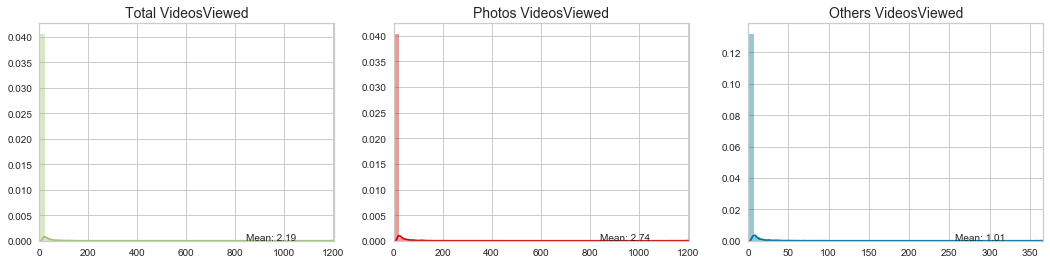

In [49]:
# 4. Videos Viewed
hisplot('VideosViewed')

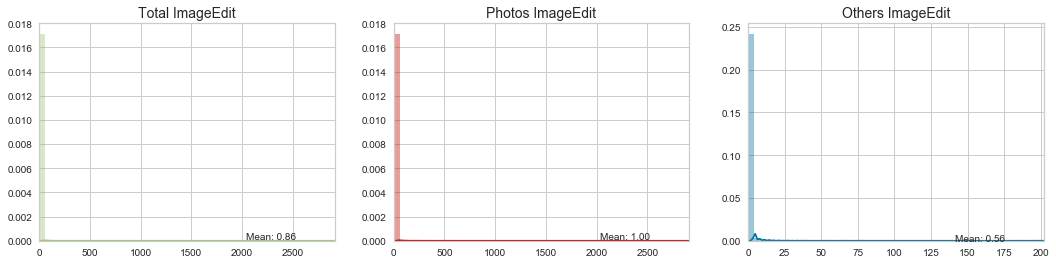

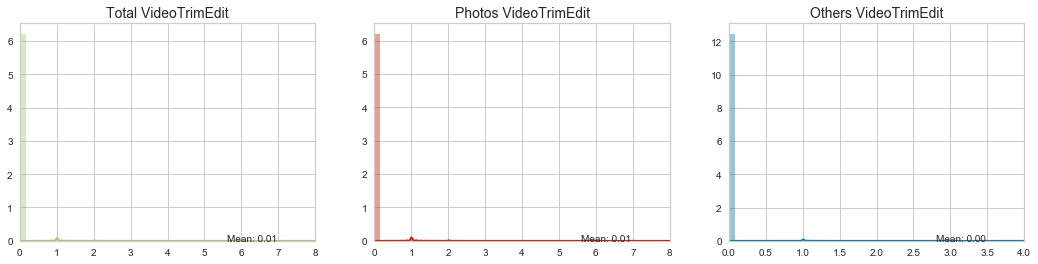

In [50]:
# 5. User actions beyond: ImageEdit, VideoTrimEdit
hisplot('ImageEdit')
hisplot('VideoTrimEdit')

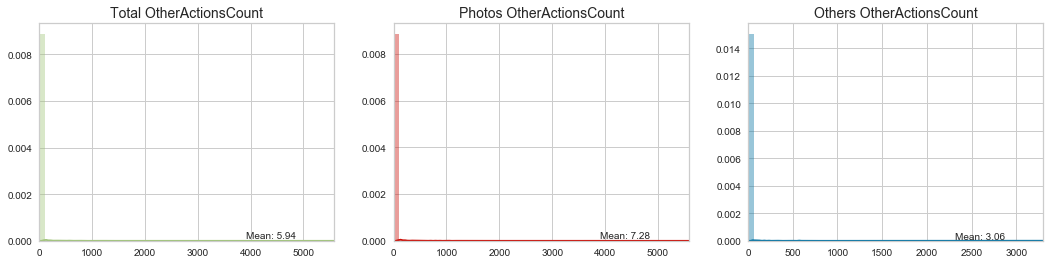

In [51]:
# More User Actions: 
#SlideshowStarted, ImportSessionStarted, ShareSessions, PrintSessions, ItemsShared, ItemsDelete, ItemsCopied, ItemsImported
user_action_cols = ['SlideShowStarted', 'ImportSessionStarted', 'ShareSessions',\
                    'PrintSessions', 'ItemsShared', 'ItemsDelete', 'ItemsCopied', 'ItemsImported']

#From descriptive statistics, above user actions counts are small. I choose to combine these counts and create "ActionCount"
df['OtherActionsCount'] = df.loc[:,user_action_cols].sum(axis=1)

hisplot('OtherActionsCount')

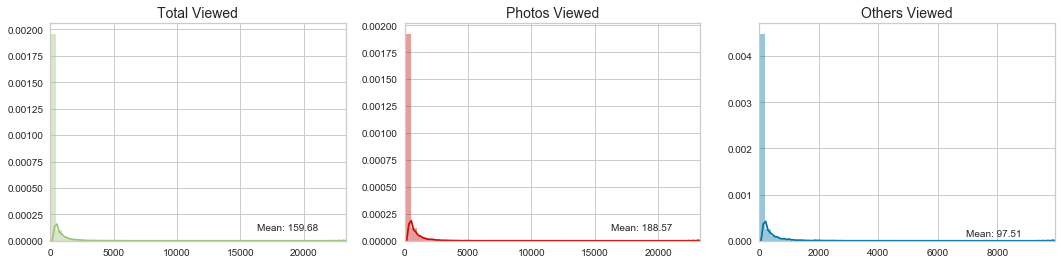

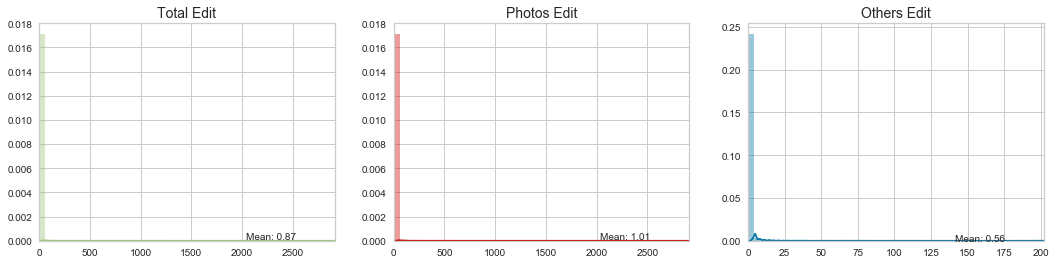

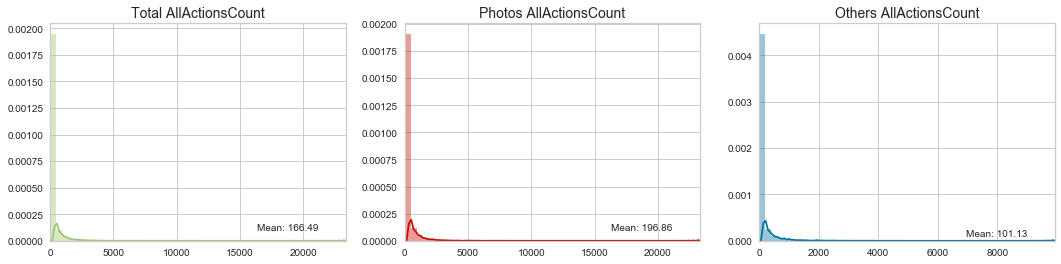

In [52]:
# Create Viewed, Edited, Others
df['Viewed'] = df['PicturesViewed'] +df['VideosViewed']
df['Edit'] = df['ImageEdit'] + df['VideoTrimEdit'] 
df['AllActionsCount'] = df['Viewed']+df['Edit'] + df['OtherActionsCount']

hisplot('Viewed')
hisplot('Edit')
hisplot('AllActionsCount')

#### EDA - System Settings

In [53]:
# FinalOneDriveSettingState, FinalDuplicateSettingState, FinalEnhanceSettingState
#default = EnableOneDrive
df['FinalOneDriveSettingState']=df['FinalOneDriveSettingState'].fillna('EnableOneDrive')

freq_count('FinalOneDriveSettingState')

FinalOneDriveSettingState  percent
0            EnableOneDrive    99.58
1           DisableOneDrive     0.42

In [54]:
#default = EnableHideDuplicatedItems
df['FinalDuplicateSettingState']=df['FinalDuplicateSettingState'].fillna('EnableHideDuplicatedItems')
freq_count('FinalDuplicateSettingState')

FinalDuplicateSettingState  percent
0   EnableHideDuplicatedItems    99.82
1  DisableHideDuplicatedItems     0.18

In [55]:
#default = EnableAutoEnhance
df['FinalEnhanceSettingState']=df['FinalEnhanceSettingState'].fillna('EnableAutoEnhance')
freq_count('FinalEnhanceSettingState')

FinalEnhanceSettingState  percent
0        EnableAutoEnhance    99.67
1       DisableAutoEnhance     0.33

#### EDA - File Storage

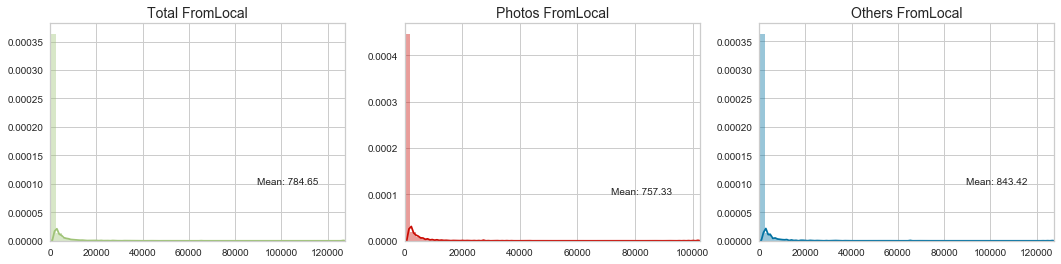

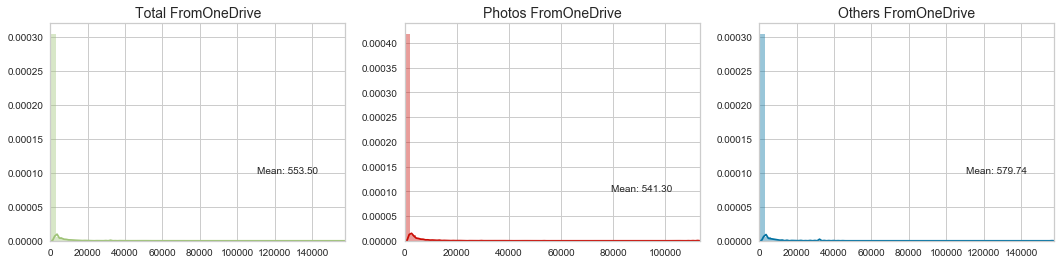

In [56]:
# File Storage Info: FromLocal, FromOneDrive
hisplot('FromLocal')
hisplot('FromOneDrive')

In [57]:
#create percent of files from local and onedrive to total files 
df['FromLocalPercent'] = df['FromLocal']/df['TotalFilesInCollection']
df.groupby('PhotoApp')['FromLocalPercent'].describe().transpose()

PhotoApp        Others        Photos
count     21849.000000  46867.000000
mean          0.790491      0.770711
std           0.362202      0.379105
min           0.000000      0.000000
25%           0.705882      0.558935
50%           1.000000      1.000000
75%           1.000000      1.000000
max           1.000000      1.000000

In [58]:
df['FromOneDrivePercent'] = df['FromOneDrive']/df['TotalFilesInCollection']
df.groupby('PhotoApp')['FromOneDrivePercent'].describe().transpose()

#Photos app users store a higher percentage of files in OneDrive. This is not surprising since OneDrive is Microsoft's offering. 

PhotoApp        Others        Photos
count     21849.000000  46867.000000
mean          0.187764      0.210030
std           0.344118      0.365199
min           0.000000      0.000000
25%           0.000000      0.000000
50%           0.000000      0.000000
75%           0.166667      0.285852
max           1.000000      1.000000

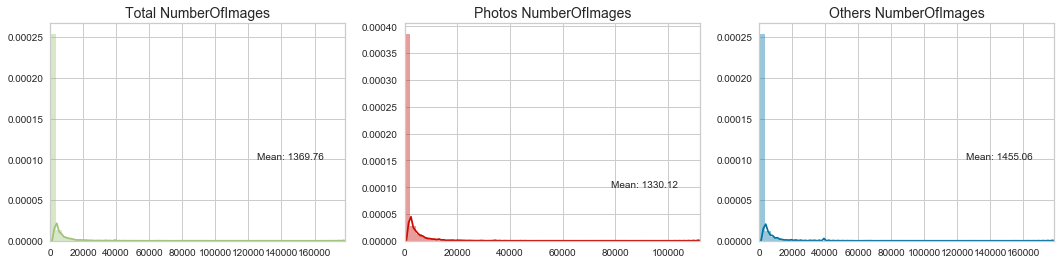

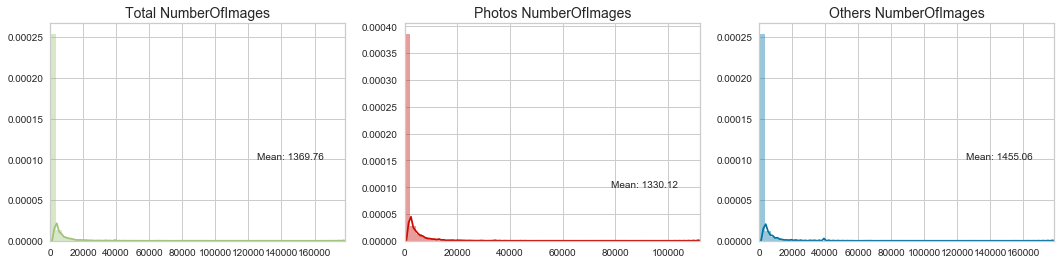

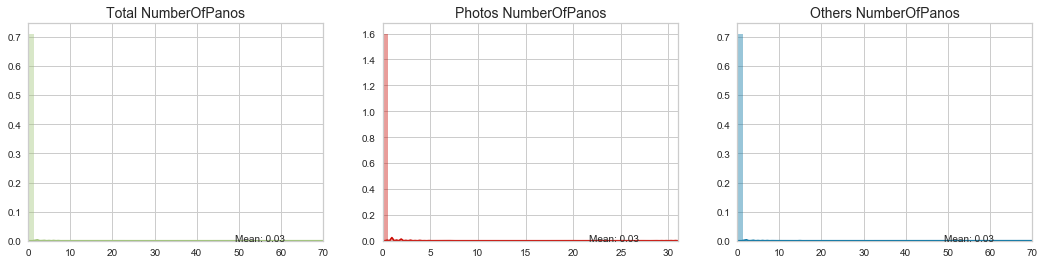

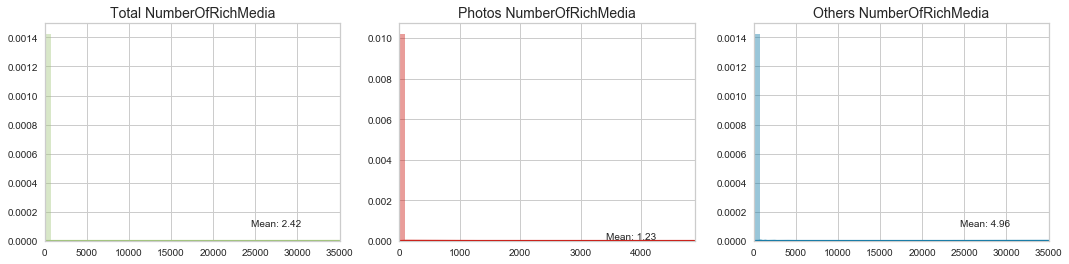

In [59]:
# Number of Images, Videos, and Others
hisplot('NumberOfImages')
hisplot('NumberOfImages')
hisplot('NumberOfPanos')
hisplot('NumberOfRichMedia')

In [60]:
# Derive percent of images/videos/others files
df['NumberofOtherFiles'] = df['NumberOfPanos'] +df['NumberOfRichMedia']
df['PercentImages'] = df['NumberOfImages']/df['TotalFilesInCollection']
df['PercentVideos'] = df['NumberOfVideos']/df['TotalFilesInCollection']
df['PercentOthers']= (df['NumberofOtherFiles'])/df['TotalFilesInCollection']

#### Time Metrics and Derived KPIs

In [61]:
# Create daily and other time spent measures

#1.Daily time spent on app apps on user device
df['DailyTimeSpentonDeviceInMins'] = df['TotalTimeInAllAppsInMins']/df['NumberOfActiveDaysInOS']

#2. Daily time spent on all photo apps
df['DailyTimeInAllPhotosAppsInMins'] = df['TotalTimeInAllPhotosAppsInMins']/df['NumberOfActiveDaysInOS']

#3.Daily time spent on 'Photos' apps (different denominators)
df['DailyTimeInPhotosAppInMins'] = df['TotalTimeInPhotosAppInMins']/df['NumberOfActiveDaysInOS']

#4. Percent Active Days using 'Photos' Apps
df['PercentActiveDaysinPhotos'] = df['NumberOfActiveDaysInPhotosApp']/df['NumberOfActiveDaysInOS']

#5. Avg Session Duration per day in Photos
df['AvgSessionDurationPhotosAppinMins'] = df['TotalTimeInPhotosAppInMins']/df['NumberOfActiveDaysInPhotosApp']

#6. Average Session Duration per Launch
df['AvgSessionDurationPerLaunch'] = np.where(df['TotalLaunchCount'] !=0, df['TotalTimeInPhotosAppInMins']/df['TotalLaunchCount'],0)

#7. Number of Daily Launches 
df['DailyLaunchCntsPhotosApp'] = df['TotalLaunchCount']/df['NumberOfActiveDaysInPhotosApp']

#8. Daily time spent on other photo apps
df['TotalTimeInOtherPhotosAppsInMins']=df['TotalTimeInOtherPhotosAppsInMins'].fillna(0)
df['DailyTimeInOtherPhotosAppsInMins'] = df['TotalTimeInOtherPhotosAppsInMins']/df['NumberOfActiveDaysInOS']

#9. Users spent more time on Photos app vs. other photo apps
df['TotalTimePhotosMinusOthers'] = df['TotalTimeInPhotosAppInMins'] - df['TotalTimeInOtherPhotosAppsInMins']

#10. Avg number of User actions per active days in Photos
df['AvgUserActionPerActiveDay']=df['AllActionsCount']/df['NumberOfActiveDaysInPhotosApp']

#11. Avg Time Spent on All photo apps per User Action: df['PicturesViewed'] +df['VideosViewed']+df['ImageEdit']+df['VideoTrimEdit'] + df['ActionCount']
df['AvgTimeAllPhotoAppsPerUserAction'] = np.where(df['AllActionsCount'] !=0, df['TotalTimeInAllPhotosAppsInMins']/df['AllActionsCount'],0)

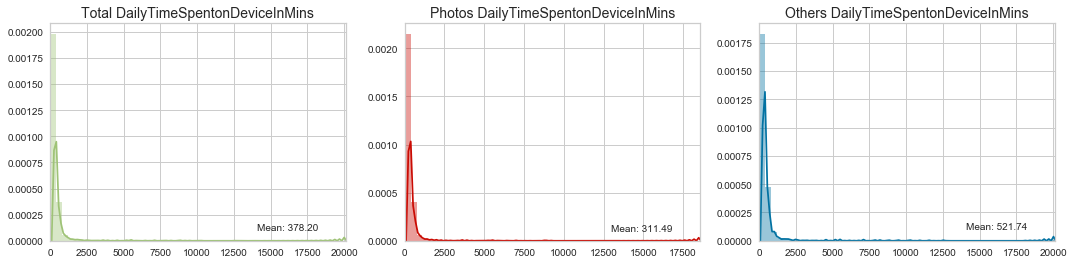

In [62]:
#1. Examine Daily Time Spent on Device
#df['DailyTimeSpentonDeviceInMins'] = df['TotalTimeInAllAppsInMins']/df['NumberOfActiveDaysInOS']

hisplot('DailyTimeSpentonDeviceInMins')

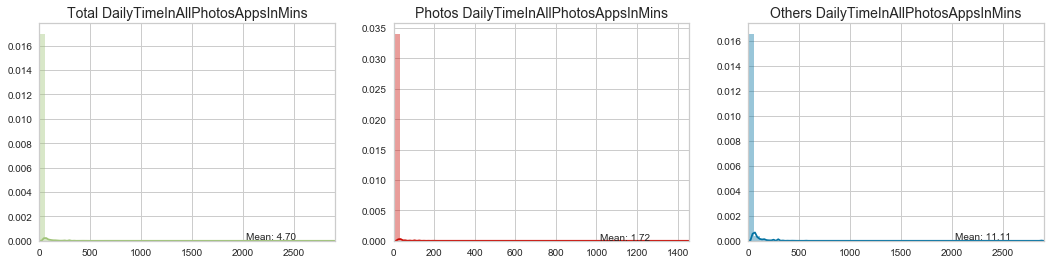

In [63]:
#2. Examine Daily time spent on all photo apps
#df['DailyTimeInAllPhotosAppsInMins'] = df['TotalTimeInAllPhotosAppsInMins']/df['NumberOfActiveDaysInOS']

hisplot('DailyTimeInAllPhotosAppsInMins')

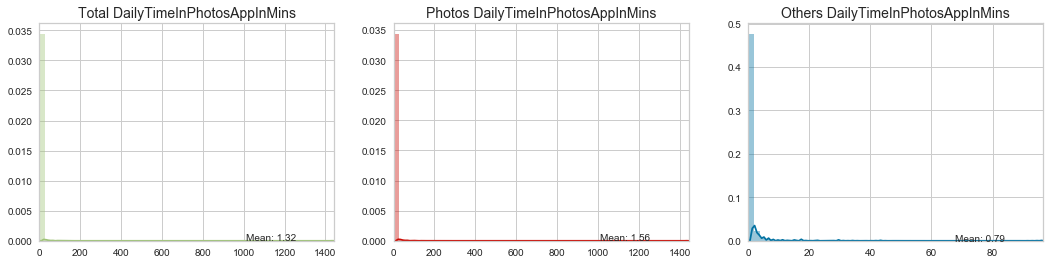

In [64]:
#3. Examine Daily time spent on 'Photos' apps
#df['DailyTimeInPhotosAppInMins'] = df['TotalTimeInPhotosAppInMins']/df['NumberOfActiveDaysInOS']

hisplot('DailyTimeInPhotosAppInMins')

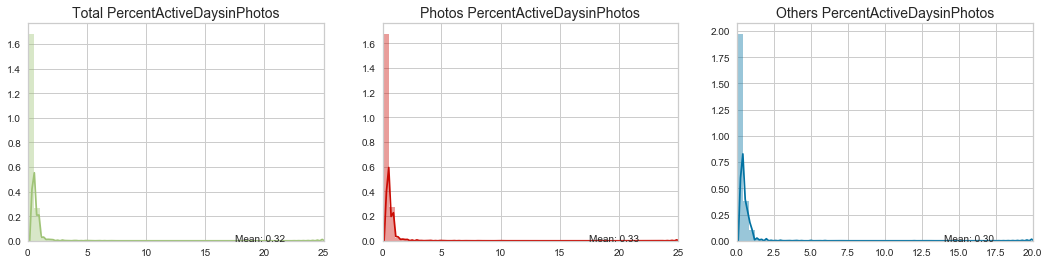

In [65]:
#4. Examine Percent Active Days using 'Photos' Apps
#df['PercentActiveDaysinPhotos'] = df['NumberOfActiveDaysInPhotosApp']/df['NumberOfActiveDaysInOS']

hisplot('PercentActiveDaysinPhotos')

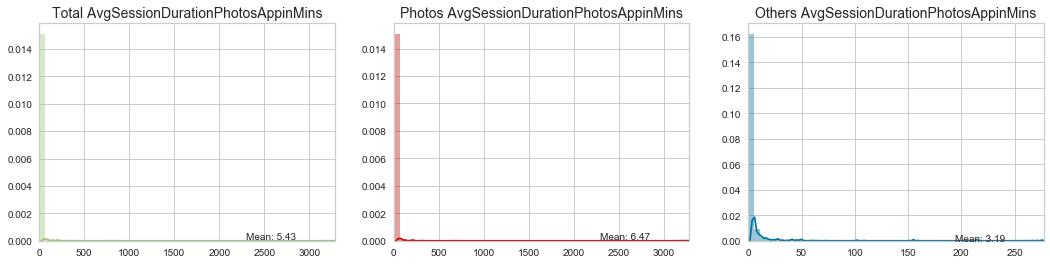

In [66]:
#5. Examine Avg Session Duration in Photos
#df['AvgSessionDurationPhotosAppinMins'] = df['TotalTimeInPhotosAppInMins']/df['NumberOfActiveDaysInPhotosApp']

hisplot('AvgSessionDurationPhotosAppinMins')

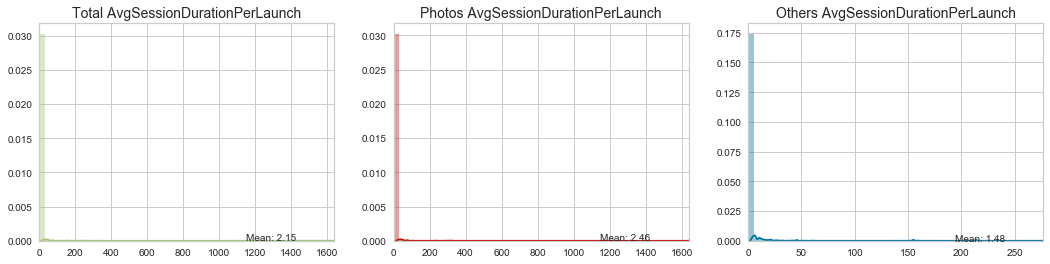

In [67]:
#6. Examine Average Session Duration in Photos per Launch
#df['AvgSessionDurationPerLaunch'] = np.where(df['TotalLaunchCount'] !=0, df['TotalTimeInPhotosAppInMins']/df['TotalLaunchCount'],0)

hisplot('AvgSessionDurationPerLaunch')

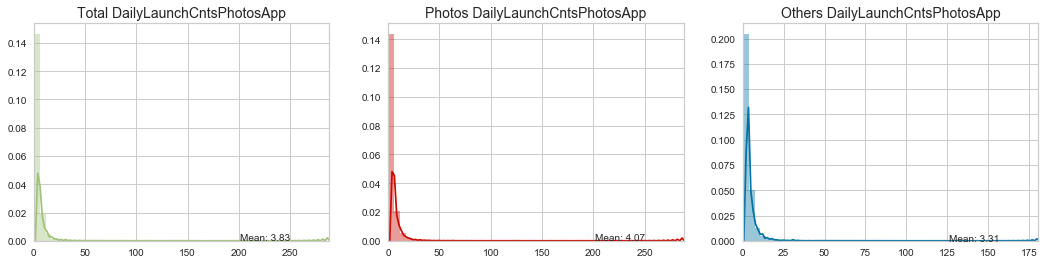

In [68]:
#7. Examine Number of Daily Launches 
#df['DailyLaunchCntsPhotosApp'] = df['TotalLaunchCount']/df['NumberOfActiveDaysInPhotosApp']

hisplot('DailyLaunchCntsPhotosApp')

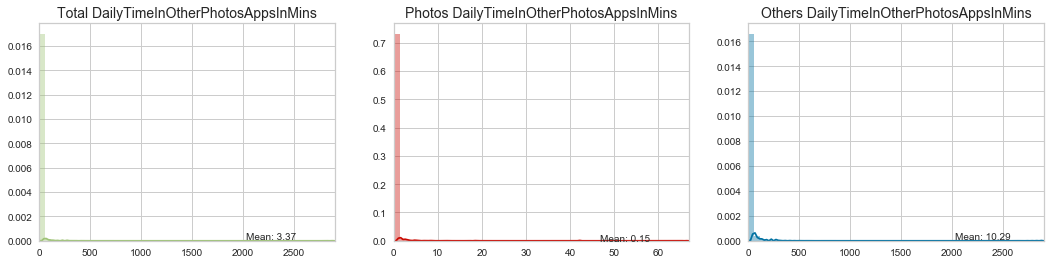

In [69]:
#8. Exmaine Daily time spent on other photo apps
#df['DailyTimeInOtherPhotosAppsInMins'] = df['TotalTimeInOtherPhotosAppsInMins']/df['NumberOfActiveDaysInOS']

hisplot('DailyTimeInOtherPhotosAppsInMins')

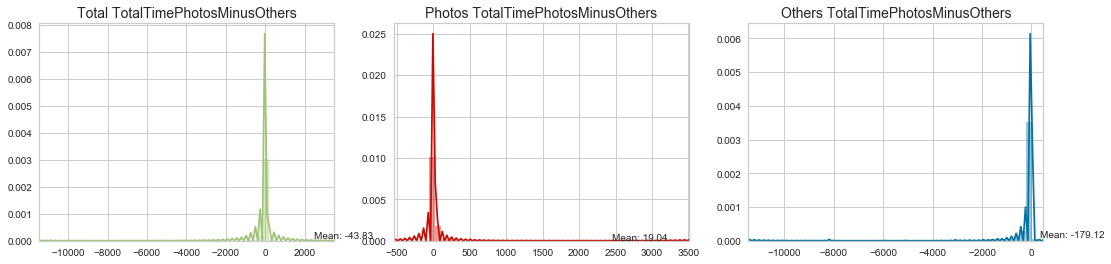

In [70]:
#9. Exmaine (Total Time Spent in Photos App - Total Time Spent in Other photo apps)
df['TotalTimePhotosMinusOthers'] = df['TotalTimeInPhotosAppInMins'] - df['TotalTimeInOtherPhotosAppsInMins']

hisplot('TotalTimePhotosMinusOthers')

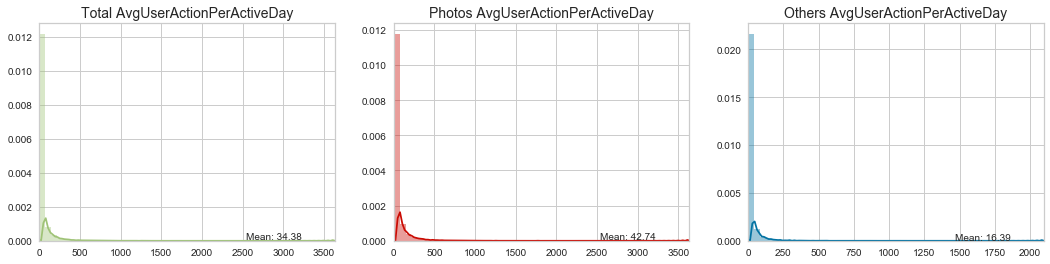

In [71]:
#10. Exmaine Avg number of User actions per active days in Photos
#df['AvgUserActionPerActiveDay']=df['AllActionCount']/df['NumberOfActiveDaysInPhotosApp']

hisplot('AvgUserActionPerActiveDay')

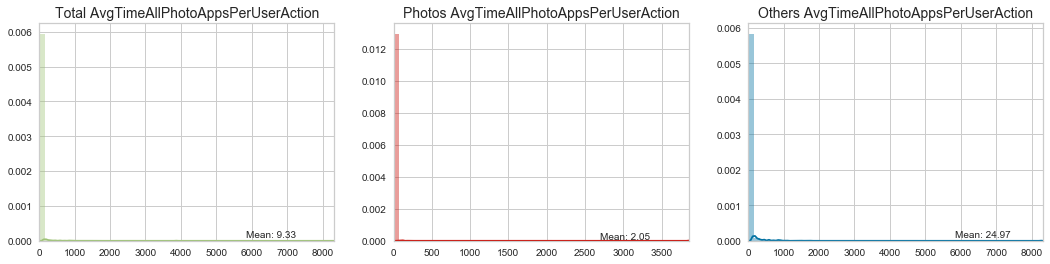

In [72]:
#11. Exmaine Avg Time Spent per User Action ALL Photo Apps
#df['AvgTimeAllPhotoAppsPerUserAction'] = np.where(df['AllActionCount'] !=0, df['TotalTimeInAllPhotosAppsInMins']/df['AllActionCount'],0)

hisplot('AvgTimeAllPhotoAppsPerUserAction')

#### Further Visualization w.r.t. KPIs

In [73]:
def kpi_barplot(col):
    fig, ax = plt.subplots(11,1, figsize=(15, 40))
    fig.tight_layout(pad=2.0)
    
    sns.barplot(x=col, y='DailyTimeSpentonDeviceInMins', hue='PhotoApp', data=df, ax=ax[0], palette=["#69BE28", "#00a2ed"])
    ax[0].set_title('Daily Time Spent on All Apps on Device: ' + col, fontsize=13)
    ax[0].set_xticklabels("")
    ax[0].set_xlabel("")
    ax[0].set_ylabel('DailyTimeSpentonDeviceInMins', fontsize=12)
    
    sns.barplot(x=col, y='DailyTimeInAllPhotosAppsInMins', hue='PhotoApp', data=df, ax=ax[1],palette=["#69BE28", "#00a2ed"])
    ax[1].set_title('Daily Time Spent on All Photo Apps: ' + col, fontsize=13)
    ax[1].set_xticklabels("")
    ax[1].set_xlabel("")
    ax[1].set_ylabel('DailyTimeInAllPhotosAppsInMins', fontsize=12)

    sns.barplot(x=col, y='DailyTimeInPhotosAppInMins', hue='PhotoApp', data=df, ax=ax[2],palette=["#69BE28", "#00a2ed"])
    ax[2].set_title('Daily Time Spent on Photos Apps: ' + col, fontsize=13)
    ax[2].set_xticklabels("")
    ax[2].set_xticklabels(ax[2].get_xticklabels(),rotation=70,fontsize=10)
    ax[2].set_ylabel('DailyTimeInPhotosAppInMins', fontsize=12)
    
    sns.barplot(x=col, y='DailyTimeInOtherPhotosAppsInMins', hue='PhotoApp', data=df, ax=ax[3],palette=["#69BE28", "#00a2ed"])
    ax[3].set_title('Daily Time Spent on Other Photo Apps: ' + col, fontsize=13)
    ax[3].set_xticklabels("")
    ax[3].set_xlabel("")
    ax[3].set_ylabel('DailyTimeInOtherPhotosAppsInMins', fontsize=12)
    
    sns.barplot(x=col, y='PercentActiveDaysinPhotos', hue='PhotoApp', data=df, ax=ax[4],palette=["#69BE28", "#00a2ed"])
    ax[4].set_title('Percent Active Days using Photos: ' + col, fontsize=13)
    ax[4].set_xticklabels("")
    ax[4].set_xlabel("")
    ax[4].set_ylabel('PercentActiveDaysinPhotos', fontsize=12)
    
    sns.barplot(x=col, y='AvgSessionDurationPhotosAppinMins', hue='PhotoApp', data=df, ax=ax[5],palette=["#69BE28", "#00a2ed"])
    ax[5].set_title('Avg Session Duration using Photos(mins): ' + col, fontsize=13)
    ax[5].set_xticklabels("")
    ax[5].set_xlabel("")
    ax[5].set_ylabel('AvgSessionDurationPhotosAppinMins', fontsize=12)

    sns.barplot(x=col, y='AvgSessionDurationPerLaunch', hue='PhotoApp', data=df, ax=ax[6],palette=["#69BE28", "#00a2ed"])
    ax[6].set_title('Avg Session Duration per Launch(mins): ' + col, fontsize=13)
    ax[6].set_xticklabels(ax[6].get_xticklabels(),rotation=70,fontsize=10)
    ax[6].set_ylabel('AvgSessionDurationPerLaunch', fontsize=12)
    
    sns.barplot(x=col, y='DailyLaunchCntsPhotosApp', hue='PhotoApp', data=df, ax=ax[7],palette=["#69BE28", "#00a2ed"])
    ax[7].set_title('Daily Launch Counts ' + col, fontsize=13)
    ax[7].set_xticklabels("")
    ax[7].set_xlabel("")
    ax[7].set_ylabel('DailyLaunchCntsPhotosApp', fontsize=12)
    
    sns.barplot(x=col, y='TotalTimePhotosMinusOthers', hue='PhotoApp', data=df, ax=ax[8],palette=["#69BE28", "#00a2ed"])
    ax[8].set_title('(Total Time Spent on Photos - Total Time Spent on Other Photo Apps): ' + col, fontsize=13)
    ax[8].set_xticklabels("")
    ax[8].set_xlabel("")
    ax[8].set_ylabel('TotalTimePhotosMinusOthers', fontsize=12)
    
    sns.barplot(x=col, y='AvgUserActionPerActiveDay', hue='PhotoApp', data=df, ax=ax[9],palette=["#69BE28", "#00a2ed"])
    ax[9].set_title('Avg # of User Actions per Day: ' + col, fontsize=13)
    ax[9].set_xticklabels("")
    ax[9].set_xlabel("")
    ax[9].set_ylabel('AvgUserActionPerActiveDay', fontsize=12)
    
    sns.barplot(x=col, y='AvgTimeAllPhotoAppsPerUserAction', hue='PhotoApp', data=df, ax=ax[10],palette=["#69BE28", "#00a2ed"])
    ax[10].set_title('Avg TimeSpent per User Action: ' + col, fontsize=13)
    ax[10].set_xticklabels(ax[10].get_xticklabels(),rotation=70,fontsize=10)
    ax[10].set_ylabel('AvgTimeAllPhotoAppsPerUserAction', fontsize=12)
    
    plt.show()

In [74]:
#Comments: Refer to the attached document for more detailed discussions on KPIs and findings

Categorical Variables

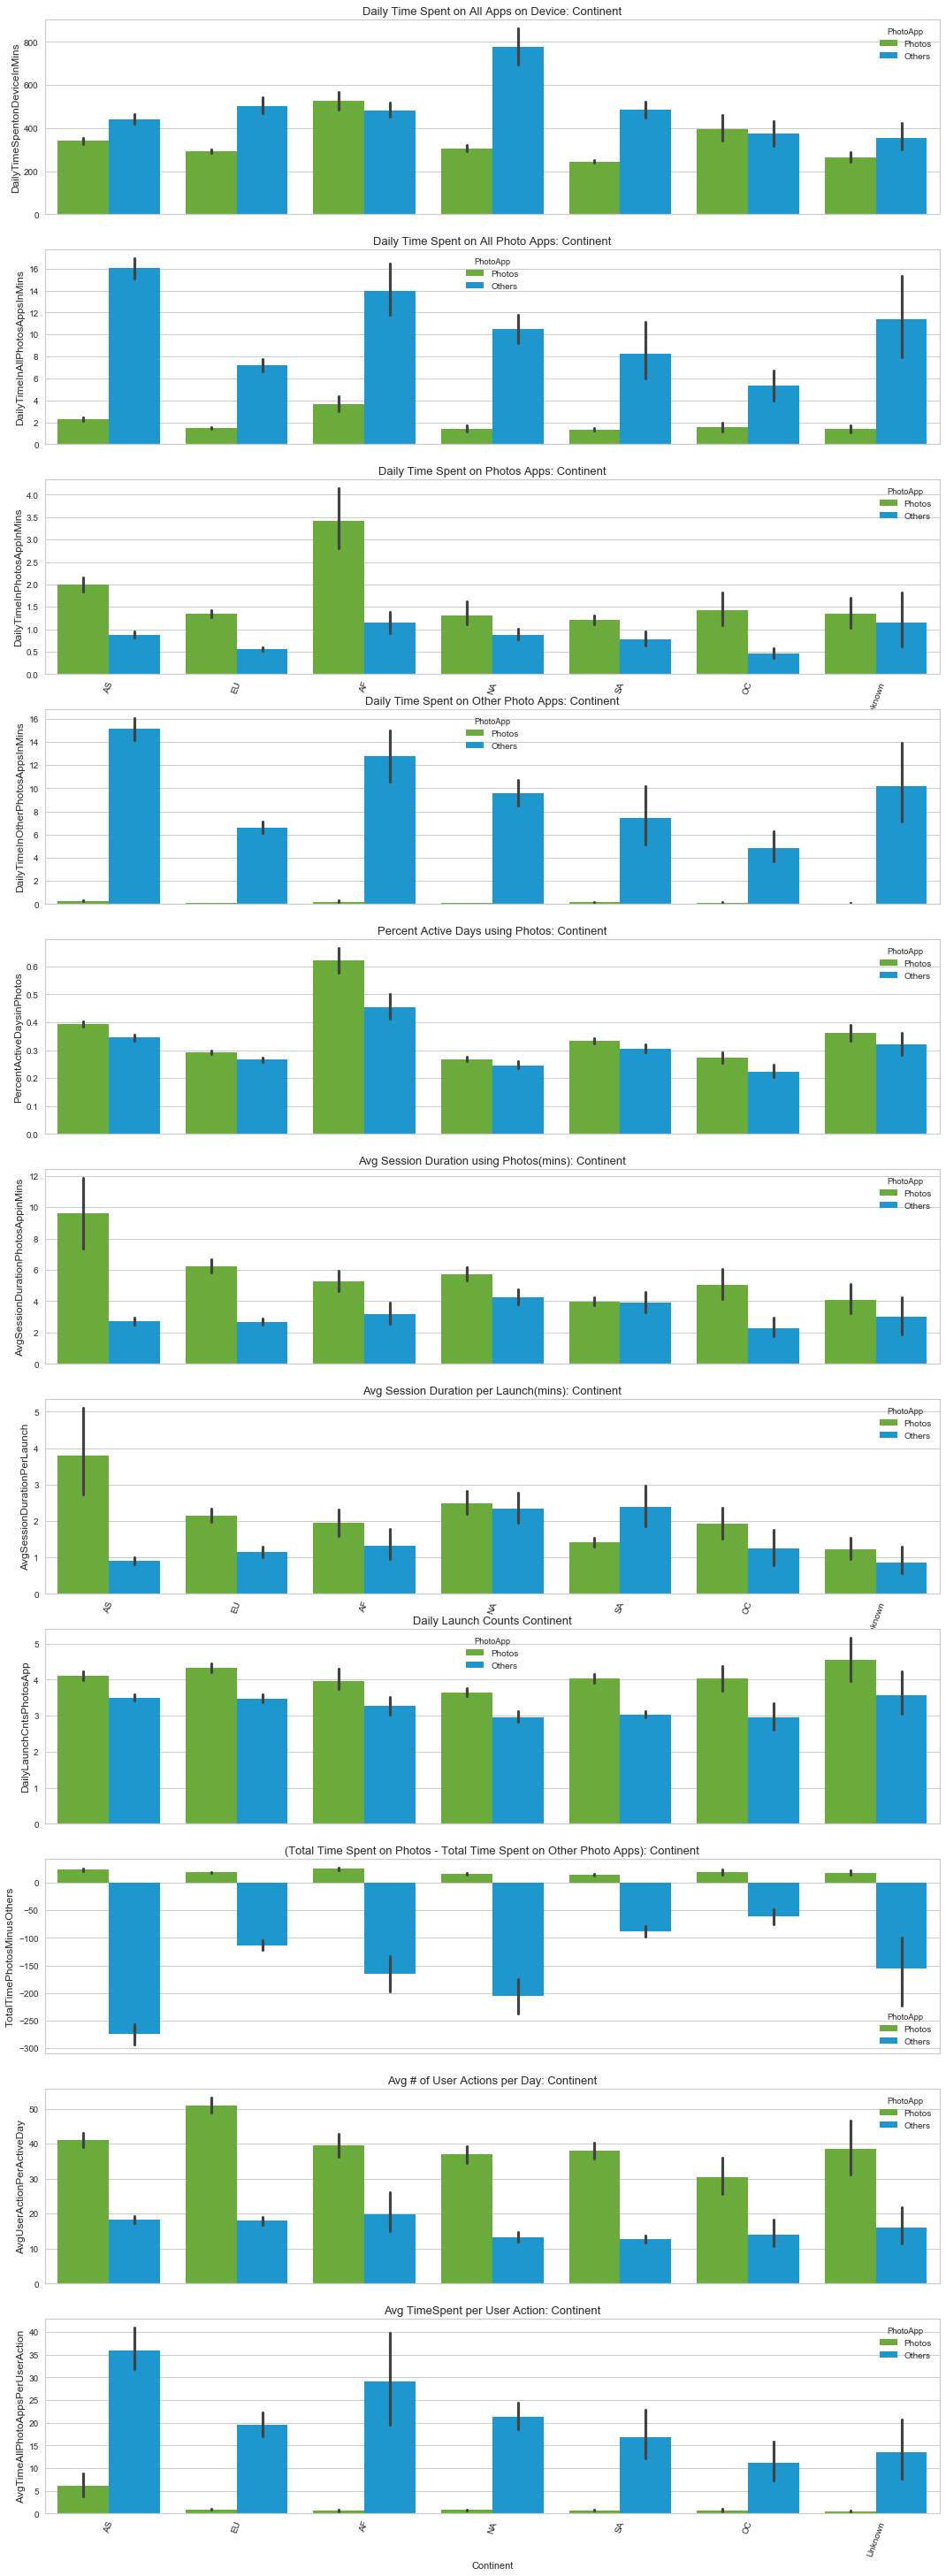

In [75]:
kpi_barplot('Continent')

In [76]:
#Grouping by user actions
df.groupby(['Continent', 'PhotoApp'])['PicturesViewed','VideosViewed', 'Viewed', 'Edit', 'OtherActionsCount'].agg(["mean", "median"]).round(2)

PicturesViewed        VideosViewed         Viewed         \
                             mean median         mean median    mean median   
Continent PhotoApp                                                            
AF        Others           136.38     13         2.13      0  138.51     13   
          Photos           280.34     46         5.22      0  285.56     48   
AS        Others           116.66     13         1.01      0  117.66     14   
          Photos           216.03     25         2.61      0  218.64     26   
EU        Others            94.87     10         1.02      0   95.88     10   
          Photos           194.40     19         2.82      0  197.22     20   
NA        Others            65.55      8         0.77      0   66.32      8   
          Photos           128.65     10         2.41      0  131.06     11   
OC        Others            77.55      7         1.51      0   79.05      7   
          Photos           106.36     11         1.21      0  107.57     11   
SA        Others            82.84     10         0.92      0   83.76     10   
          Photos           176.34     23         2.67      0  179.01     23   
Unknown   Others            95.60     13         0.65      0   96.25     13   
          Photos           222.60     23         2.26      0  224.86     23   

                    Edit        OtherActionsCount         
                    mean median              mean median  
Continent PhotoApp                                        
AF        Others    0.63      0              0.95      0  
          Photos    1.07      0              4.33      0  
AS        Others    0.60      0              4.54      0  
          Photos    0.96      0              4.80      0  
EU        Others    0.50      0              2.77      0  
          Photos    0.99      0              8.82      0  
NA        Others    0.54      0              2.74      0  
          Photos    0.87      0             10.77      0  
OC        Others    1.30      0              2.36      0  
          Photos    1.75      0              4.72      0  
SA        Others    0.53      0              1.66      0  
          Photos    1.14      0              4.63      0  
Unknown   Others    0.68      0              0.82      0  
          Photos    1.79      0              1.71      0

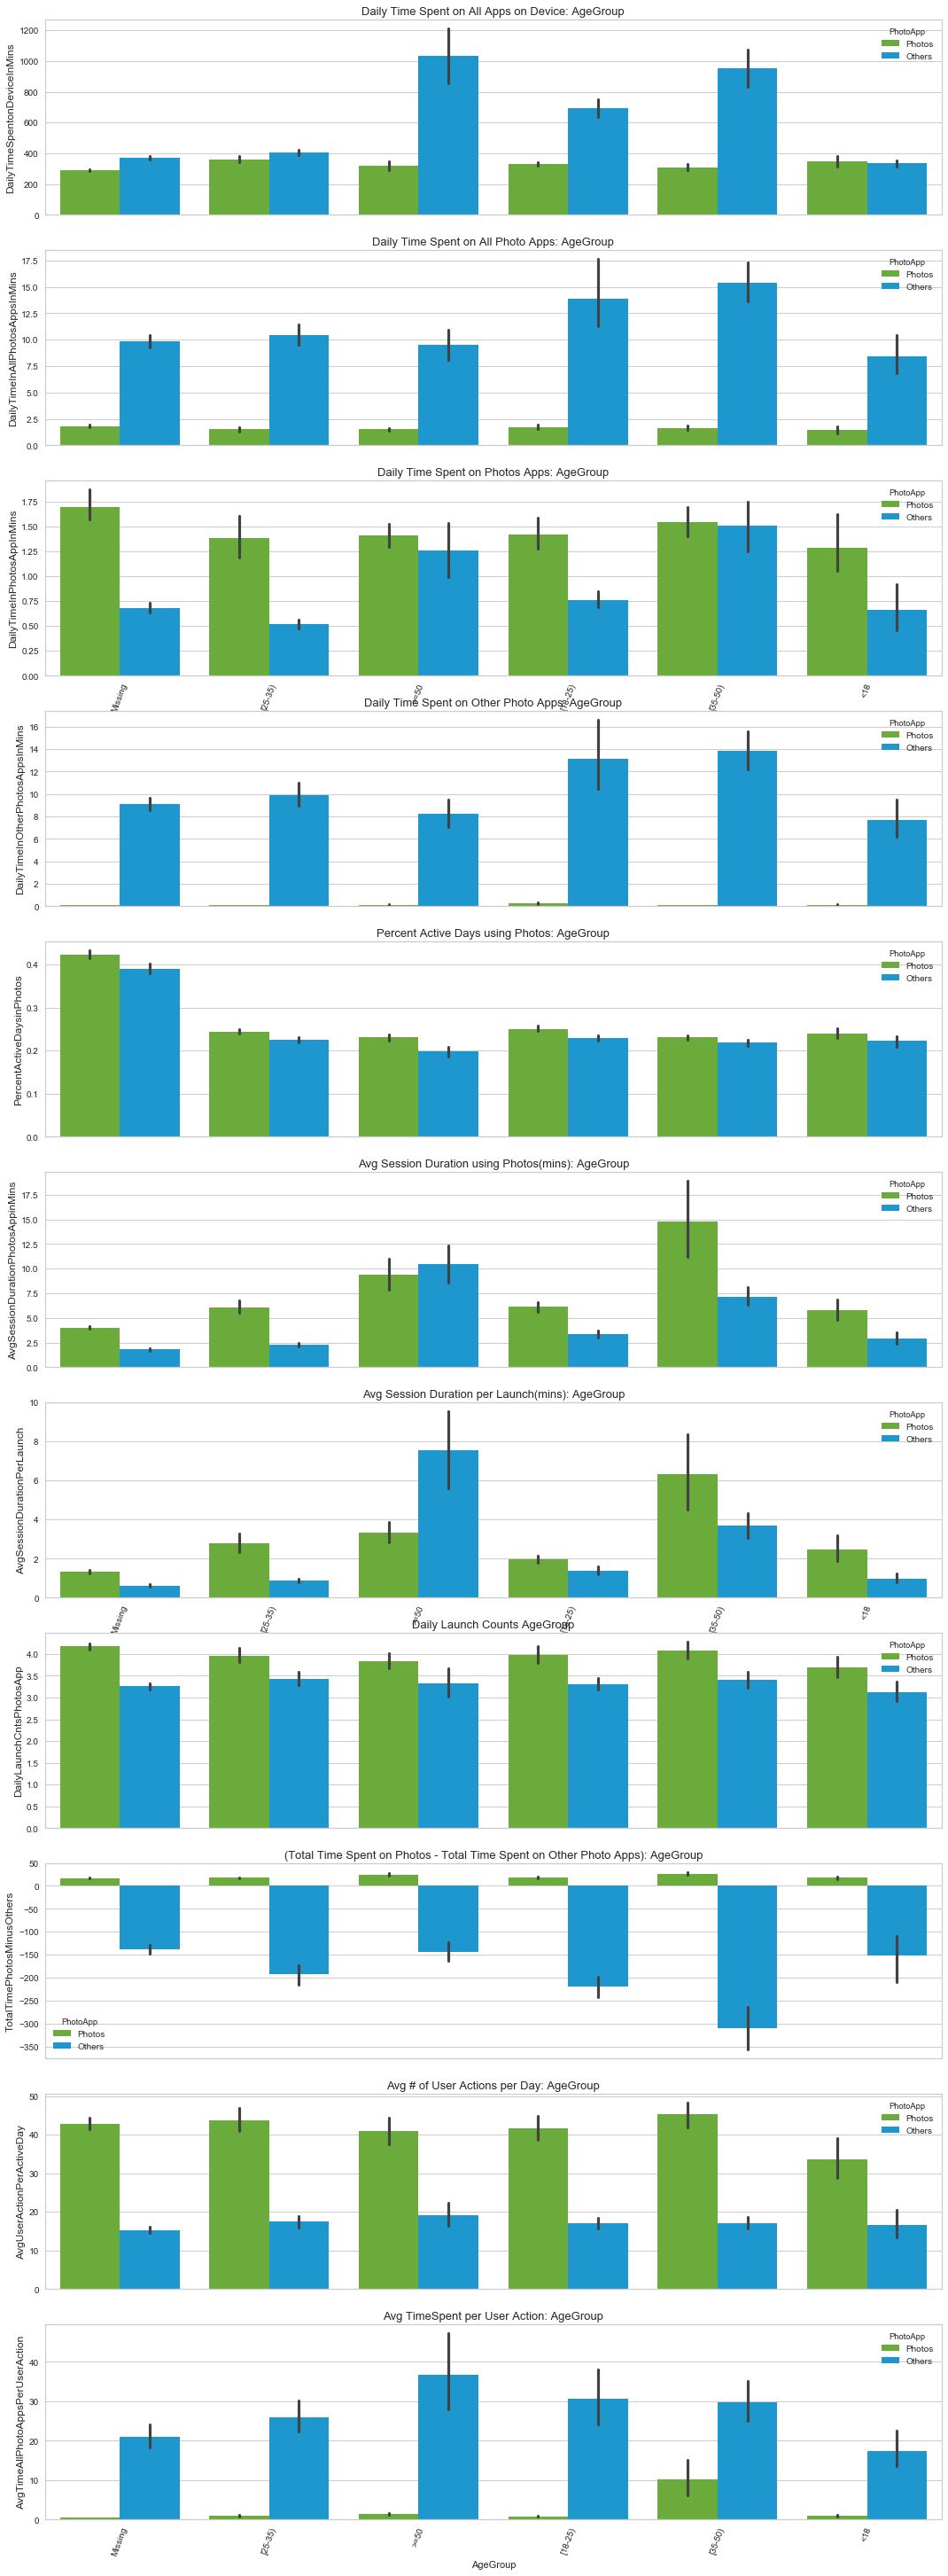

In [77]:
kpi_barplot('AgeGroup')

In [78]:
#Grouping by user actions
df.groupby(['AgeGroup', 'PhotoApp'])['PicturesViewed','VideosViewed', 'Viewed', 'Edit', 'OtherActionsCount'].agg(["mean", "median"]).round(2)

PicturesViewed        VideosViewed         Viewed         \
                            mean median         mean median    mean median   
AgeGroup PhotoApp                                                            
<18      Others            87.14      9         0.86      0   88.01      9   
         Photos           140.74     14         2.11      0  142.85     15   
>=50     Others            81.64      8         1.21      0   82.84      8   
         Photos           145.32     14         2.00      0  147.32     14   
Missing  Others           101.79     11         1.18      0  102.97     11   
         Photos           216.76     24         3.26      0  220.01     24   
[18-25)  Others           103.30     12         0.79      0  104.09     12   
         Photos           168.17     18         1.92      0  170.09     18   
[25-35)  Others            89.34     11         0.71      0   90.05     11   
         Photos           163.49     15         2.00      0  165.49     15   
[35-50)  Others            85.08     10         0.96      0   86.04     10   
         Photos           140.47     13         2.82      0  143.29     13   

                   Edit        OtherActionsCount         
                   mean median              mean median  
AgeGroup PhotoApp                                        
<18      Others    0.65      0              1.59      0  
         Photos    0.93      0              1.85      0  
>=50     Others    0.76      0              2.41      0  
         Photos    1.14      0             17.75      0  
Missing  Others    0.59      0              1.65      0  
         Photos    1.12      0              5.17      0  
[18-25)  Others    0.52      0              2.82      0  
         Photos    1.25      0              6.10      0  
[25-35)  Others    0.47      0              6.38      0  
         Photos    0.73      0              6.59      0  
[35-50)  Others    0.54      0              5.08      0  
         Photos    0.64      0             12.26      0

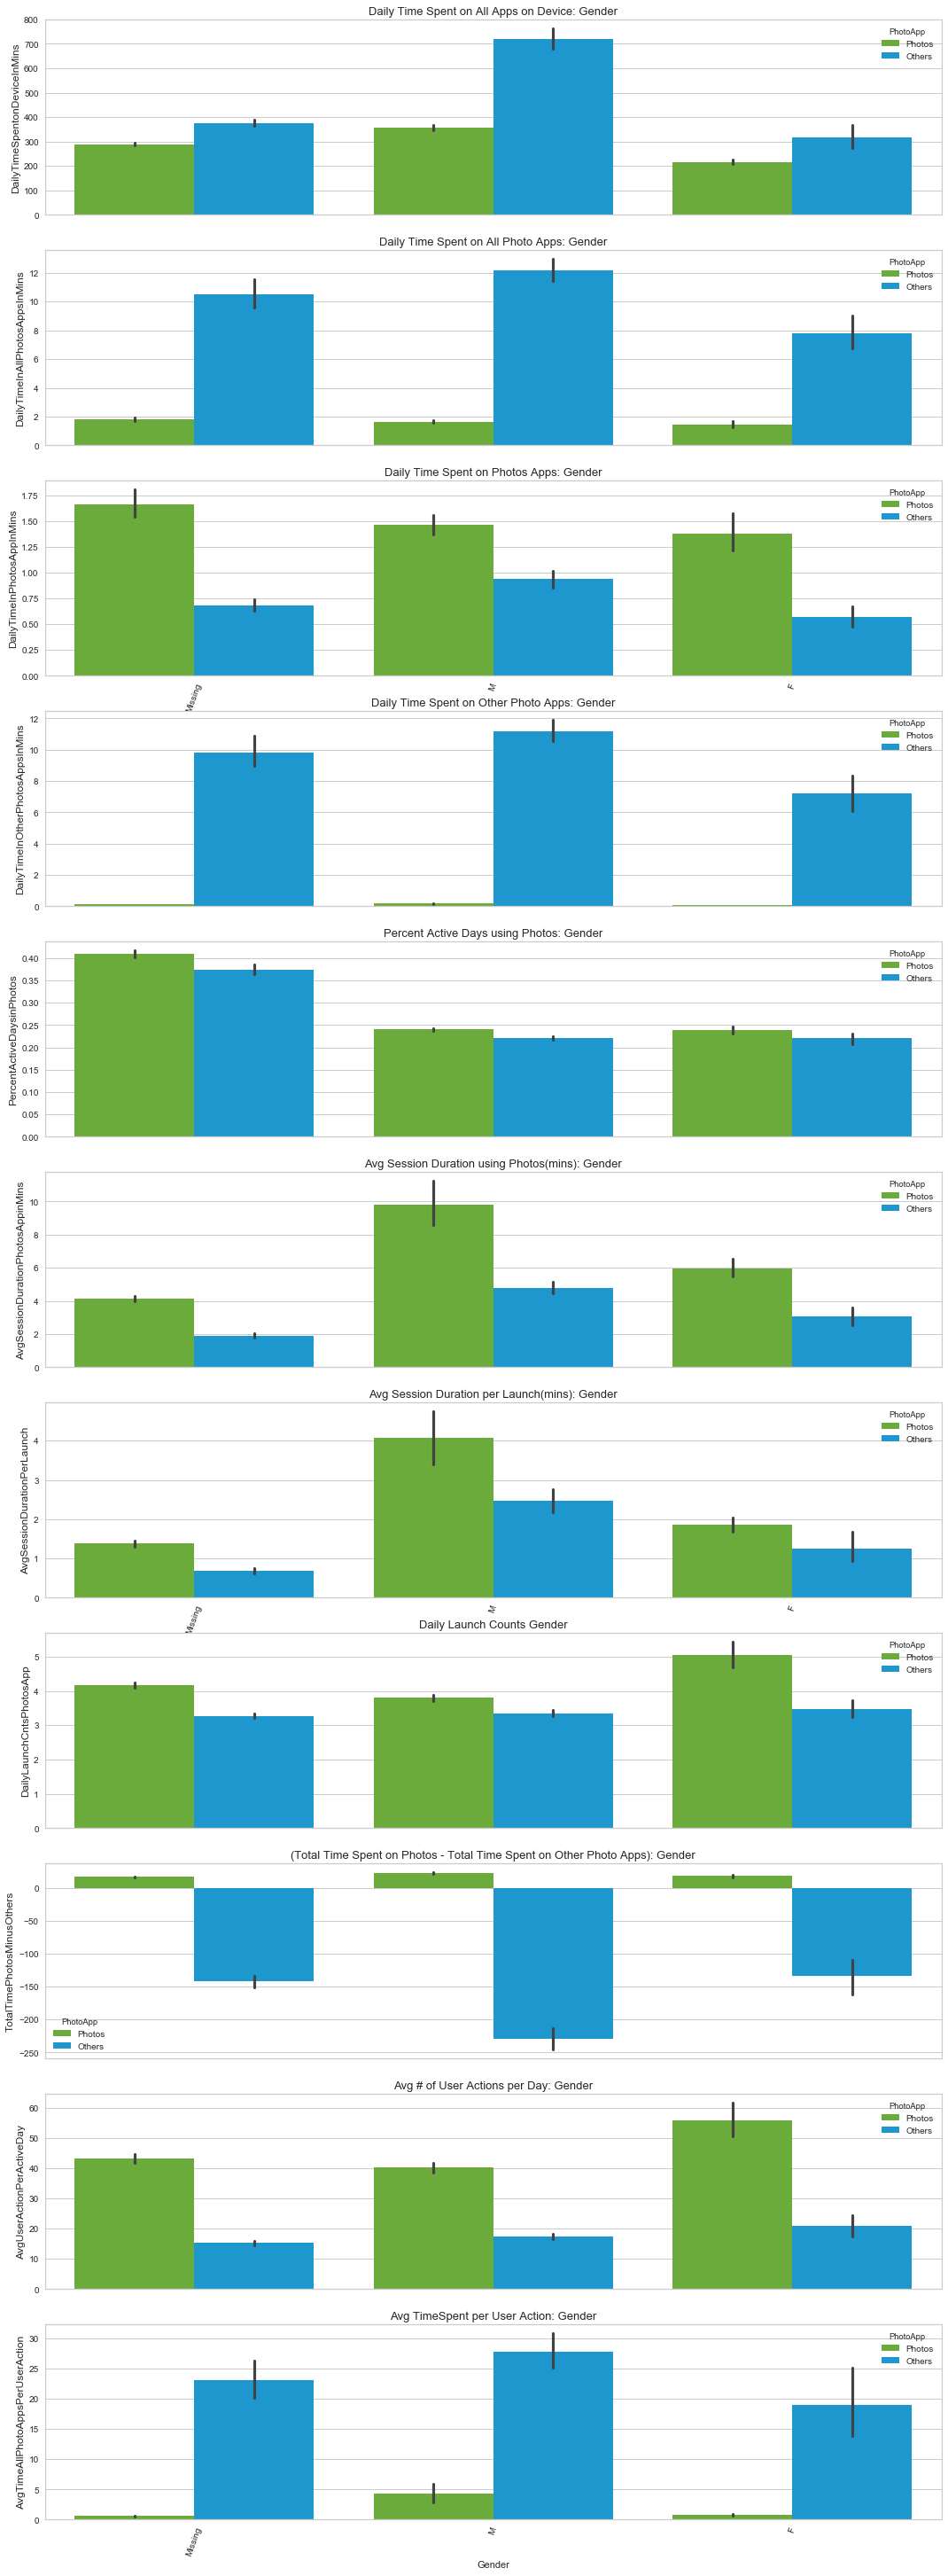

In [79]:
kpi_barplot('Gender')

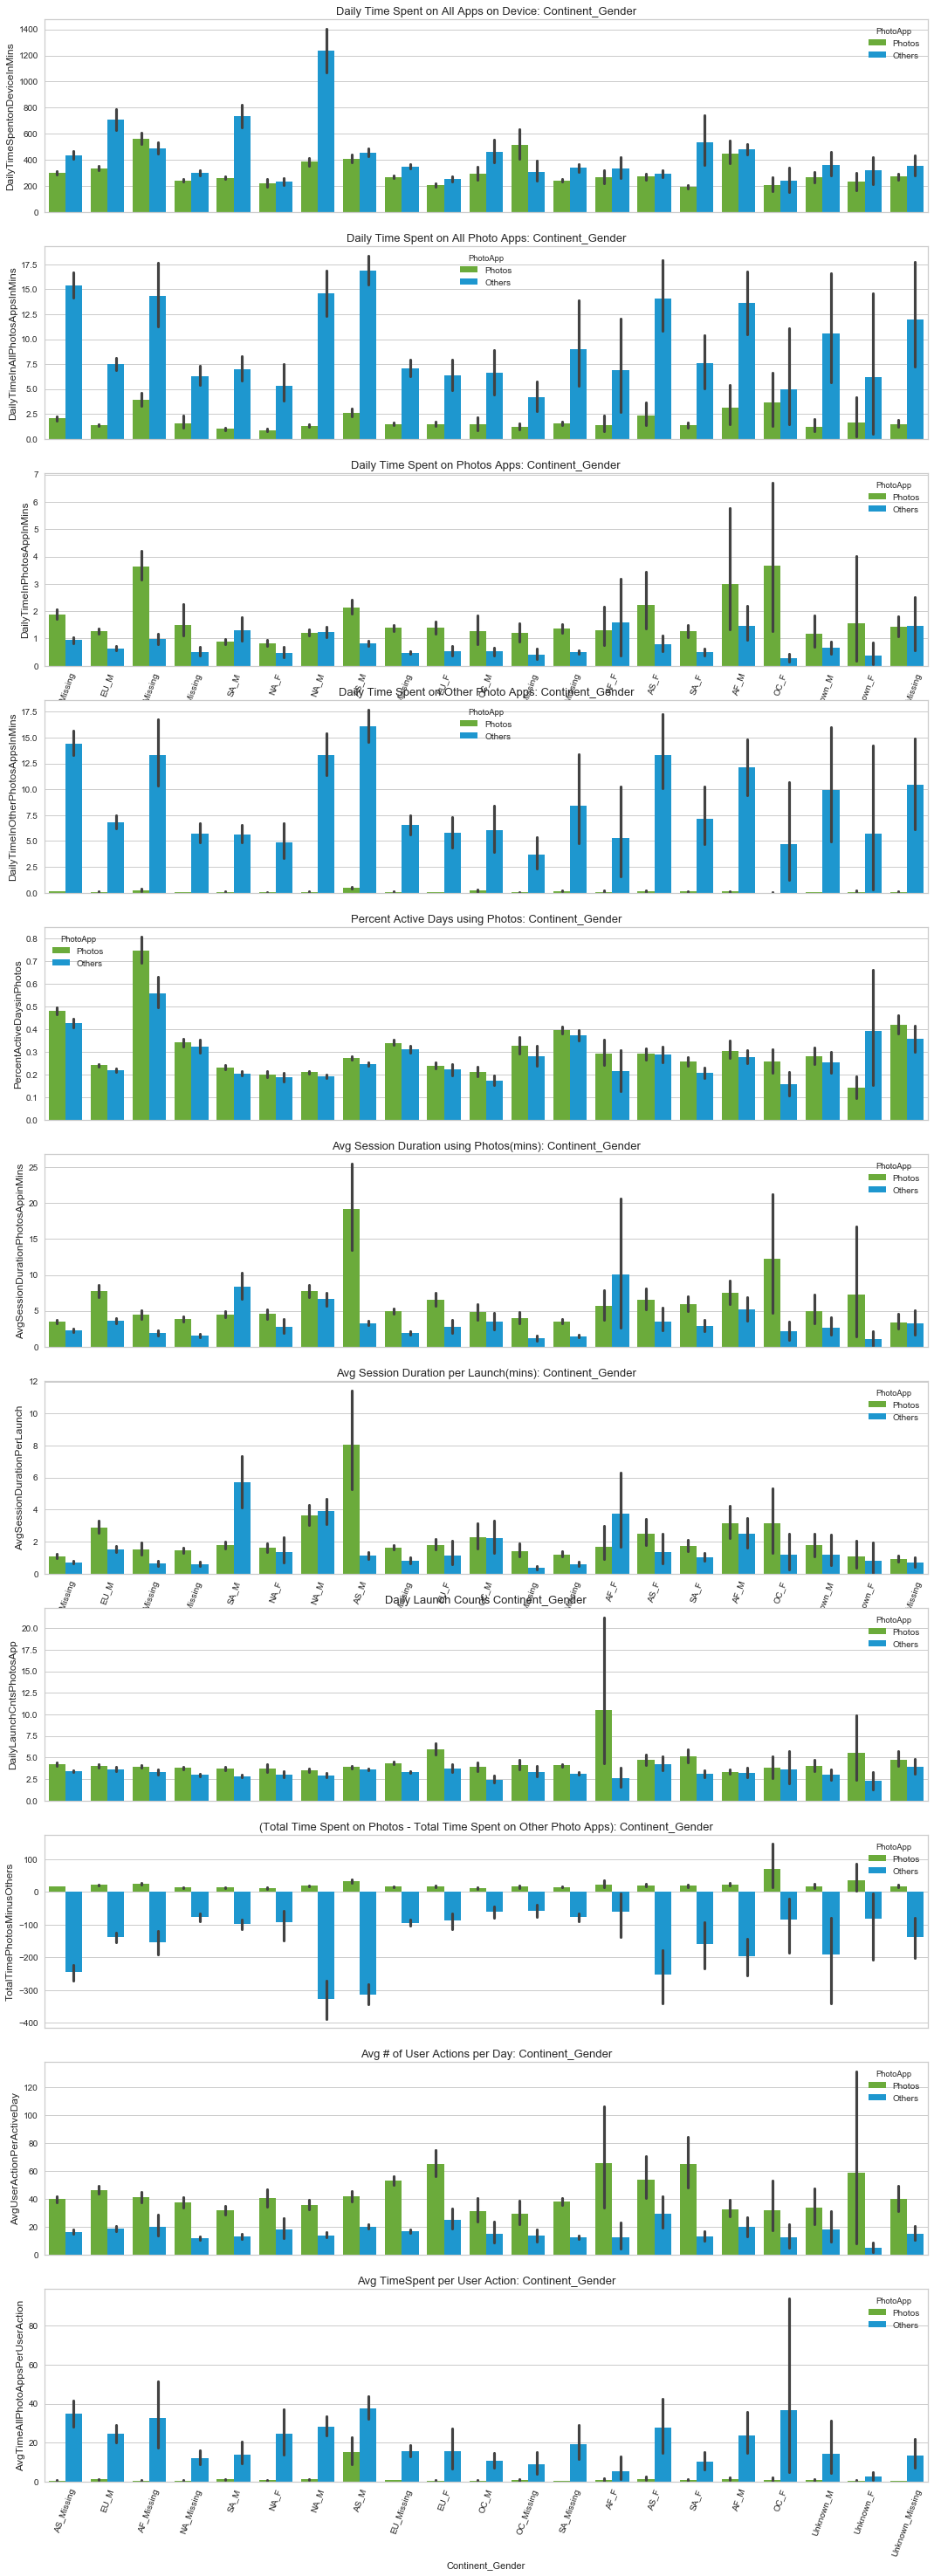

In [80]:
kpi_barplot('Continent_Gender')

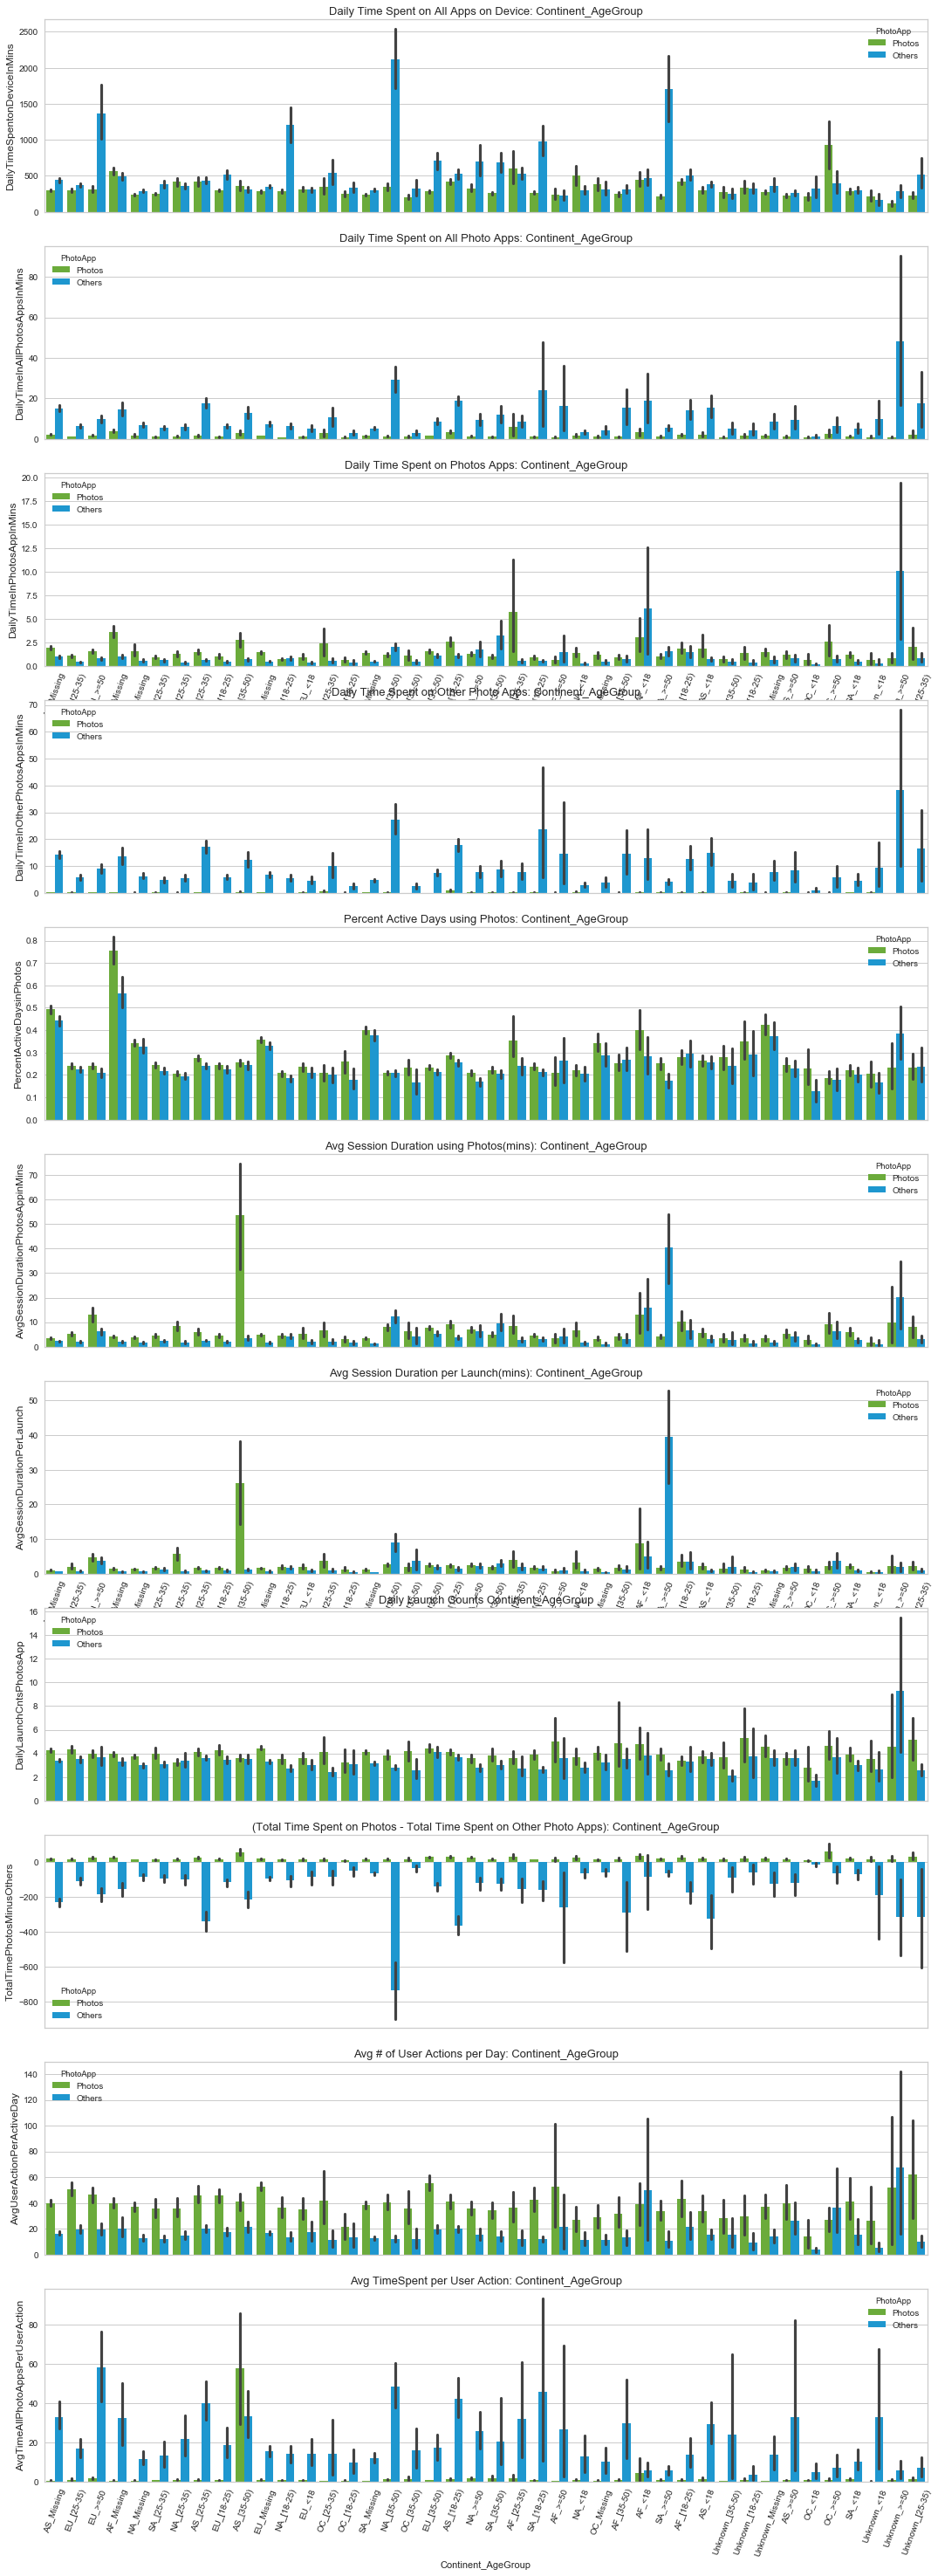

In [81]:
kpi_barplot('Continent_AgeGroup')

In [82]:
#Grouping by user actions
x = df[df['Continent_AgeGroup']=='NA_[35-50)']
x.groupby(x['PhotoApp'])['TotalTimePhotosMinusOthers'].agg(["mean", "median"]).round(2)

mean  median
PhotoApp                
Others   -736.34   -18.0
Photos     16.28     3.0

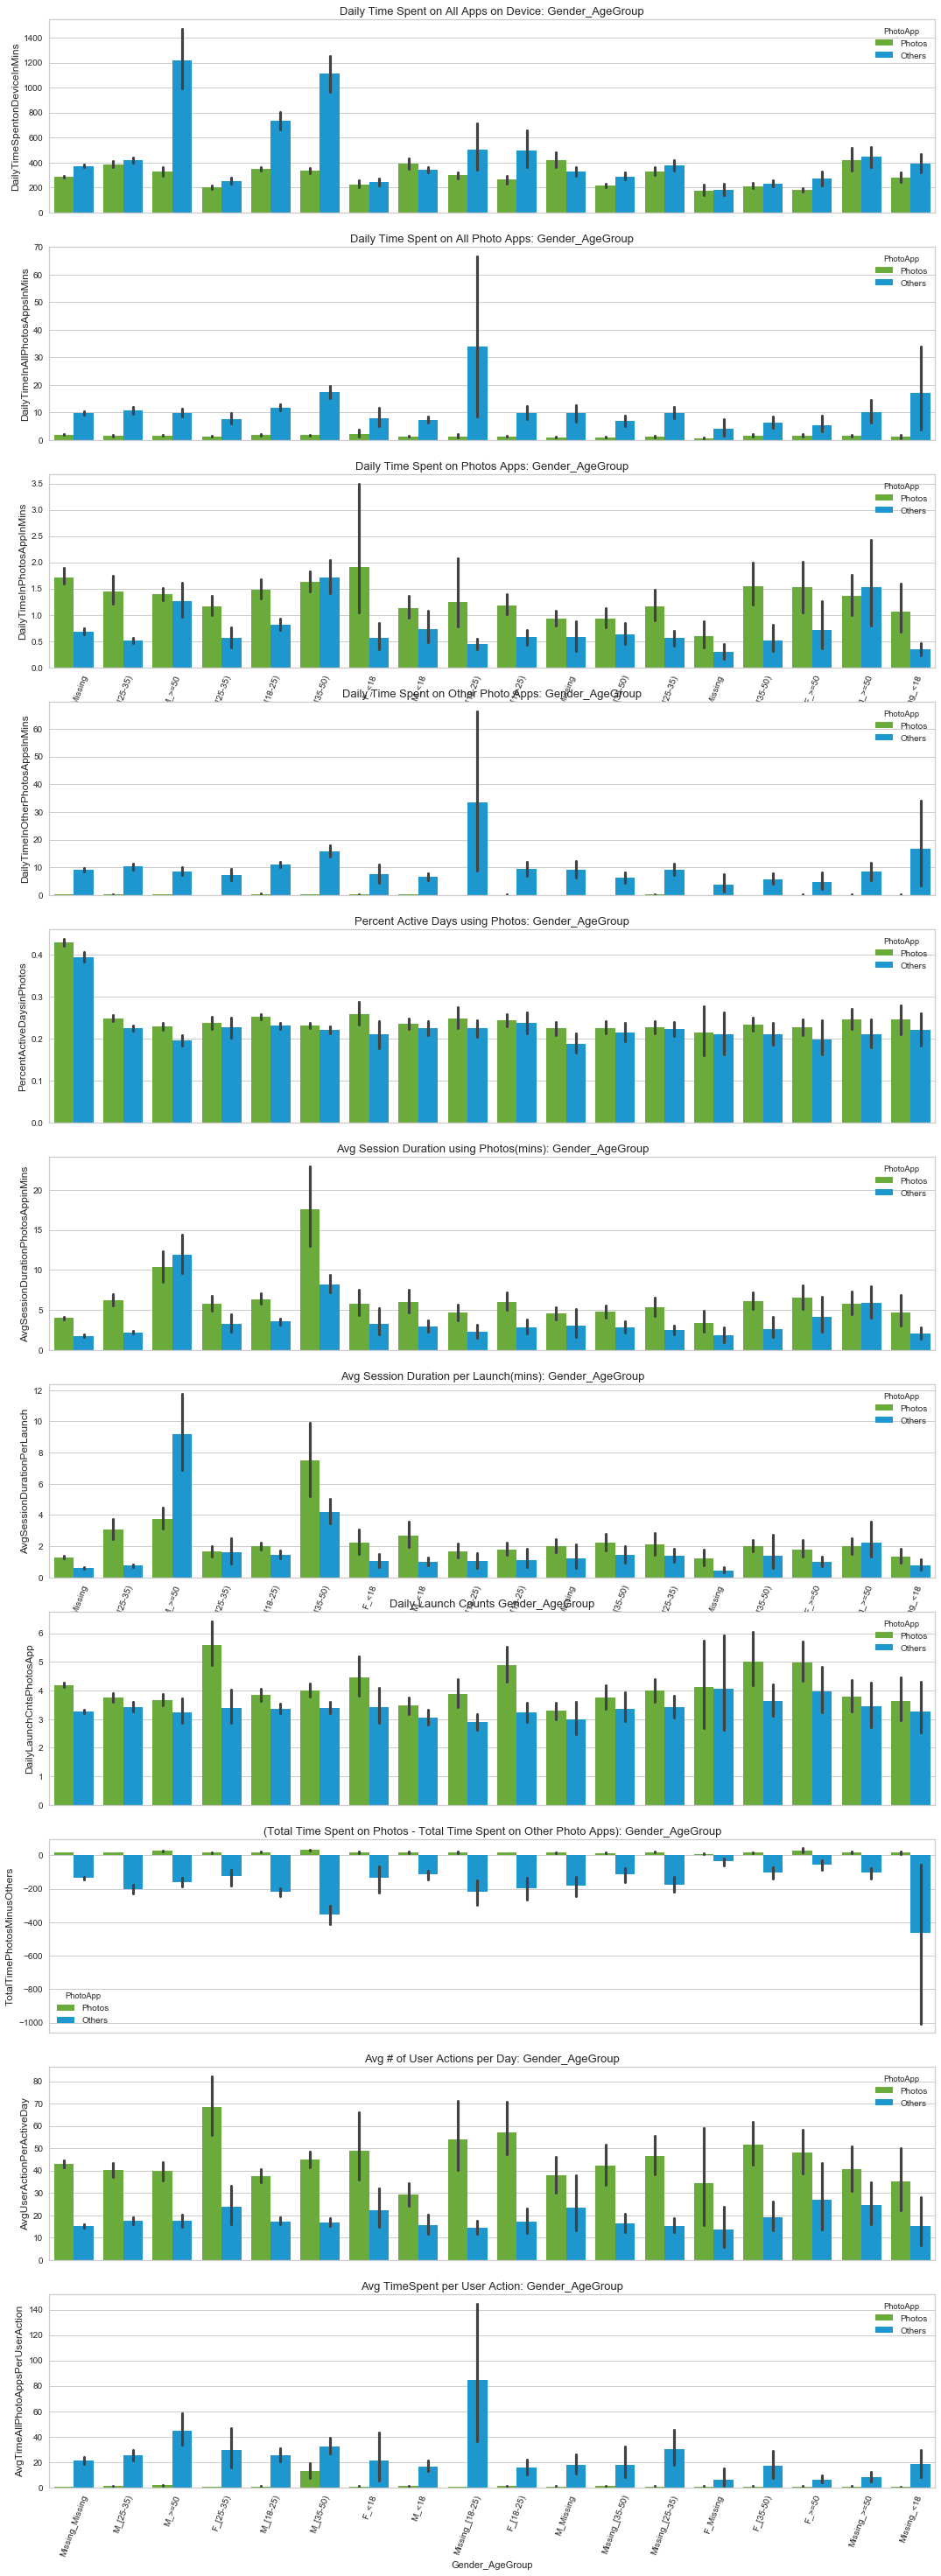

In [83]:
kpi_barplot('Gender_AgeGroup')

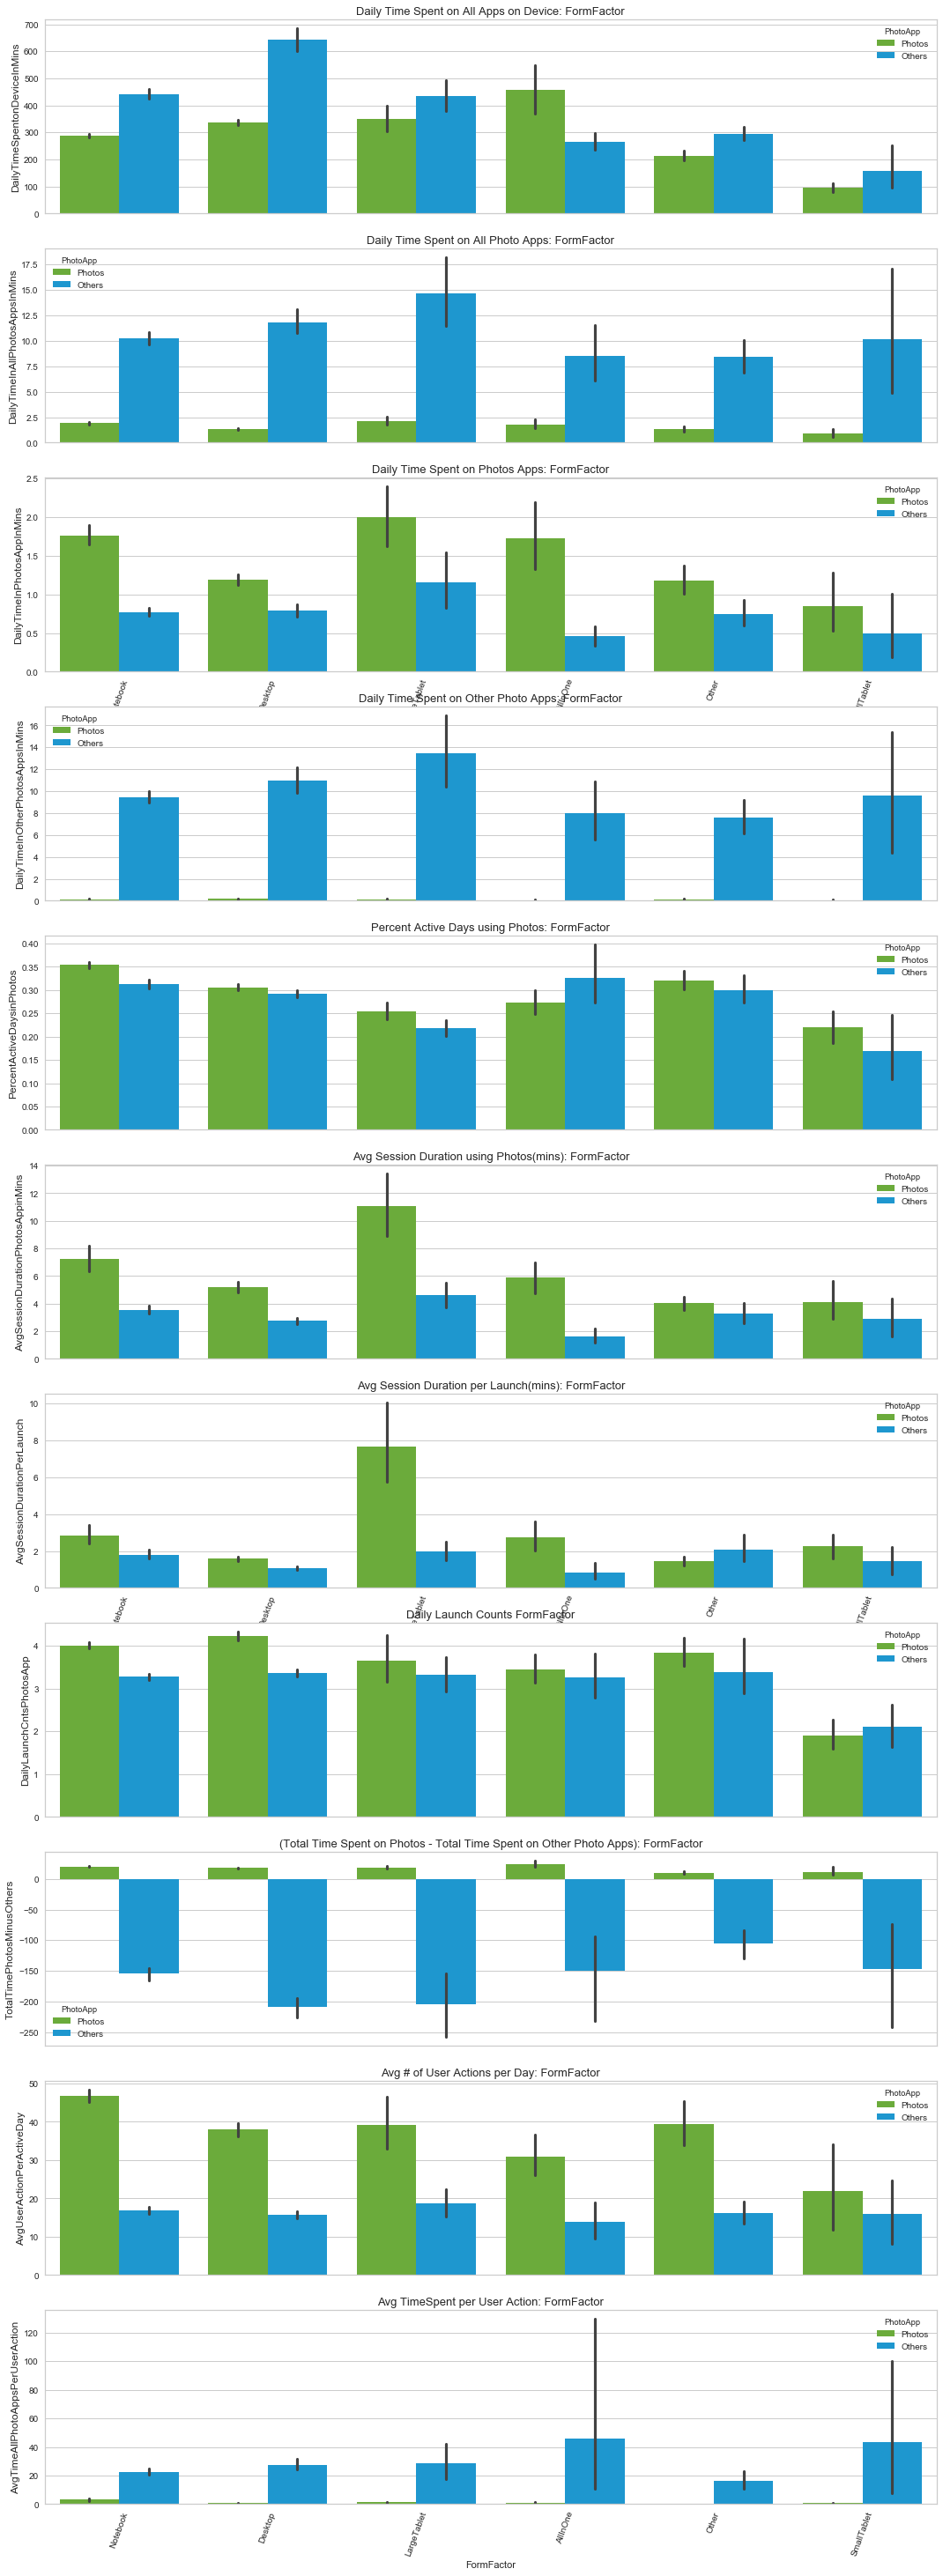

In [84]:
kpi_barplot('FormFactor')

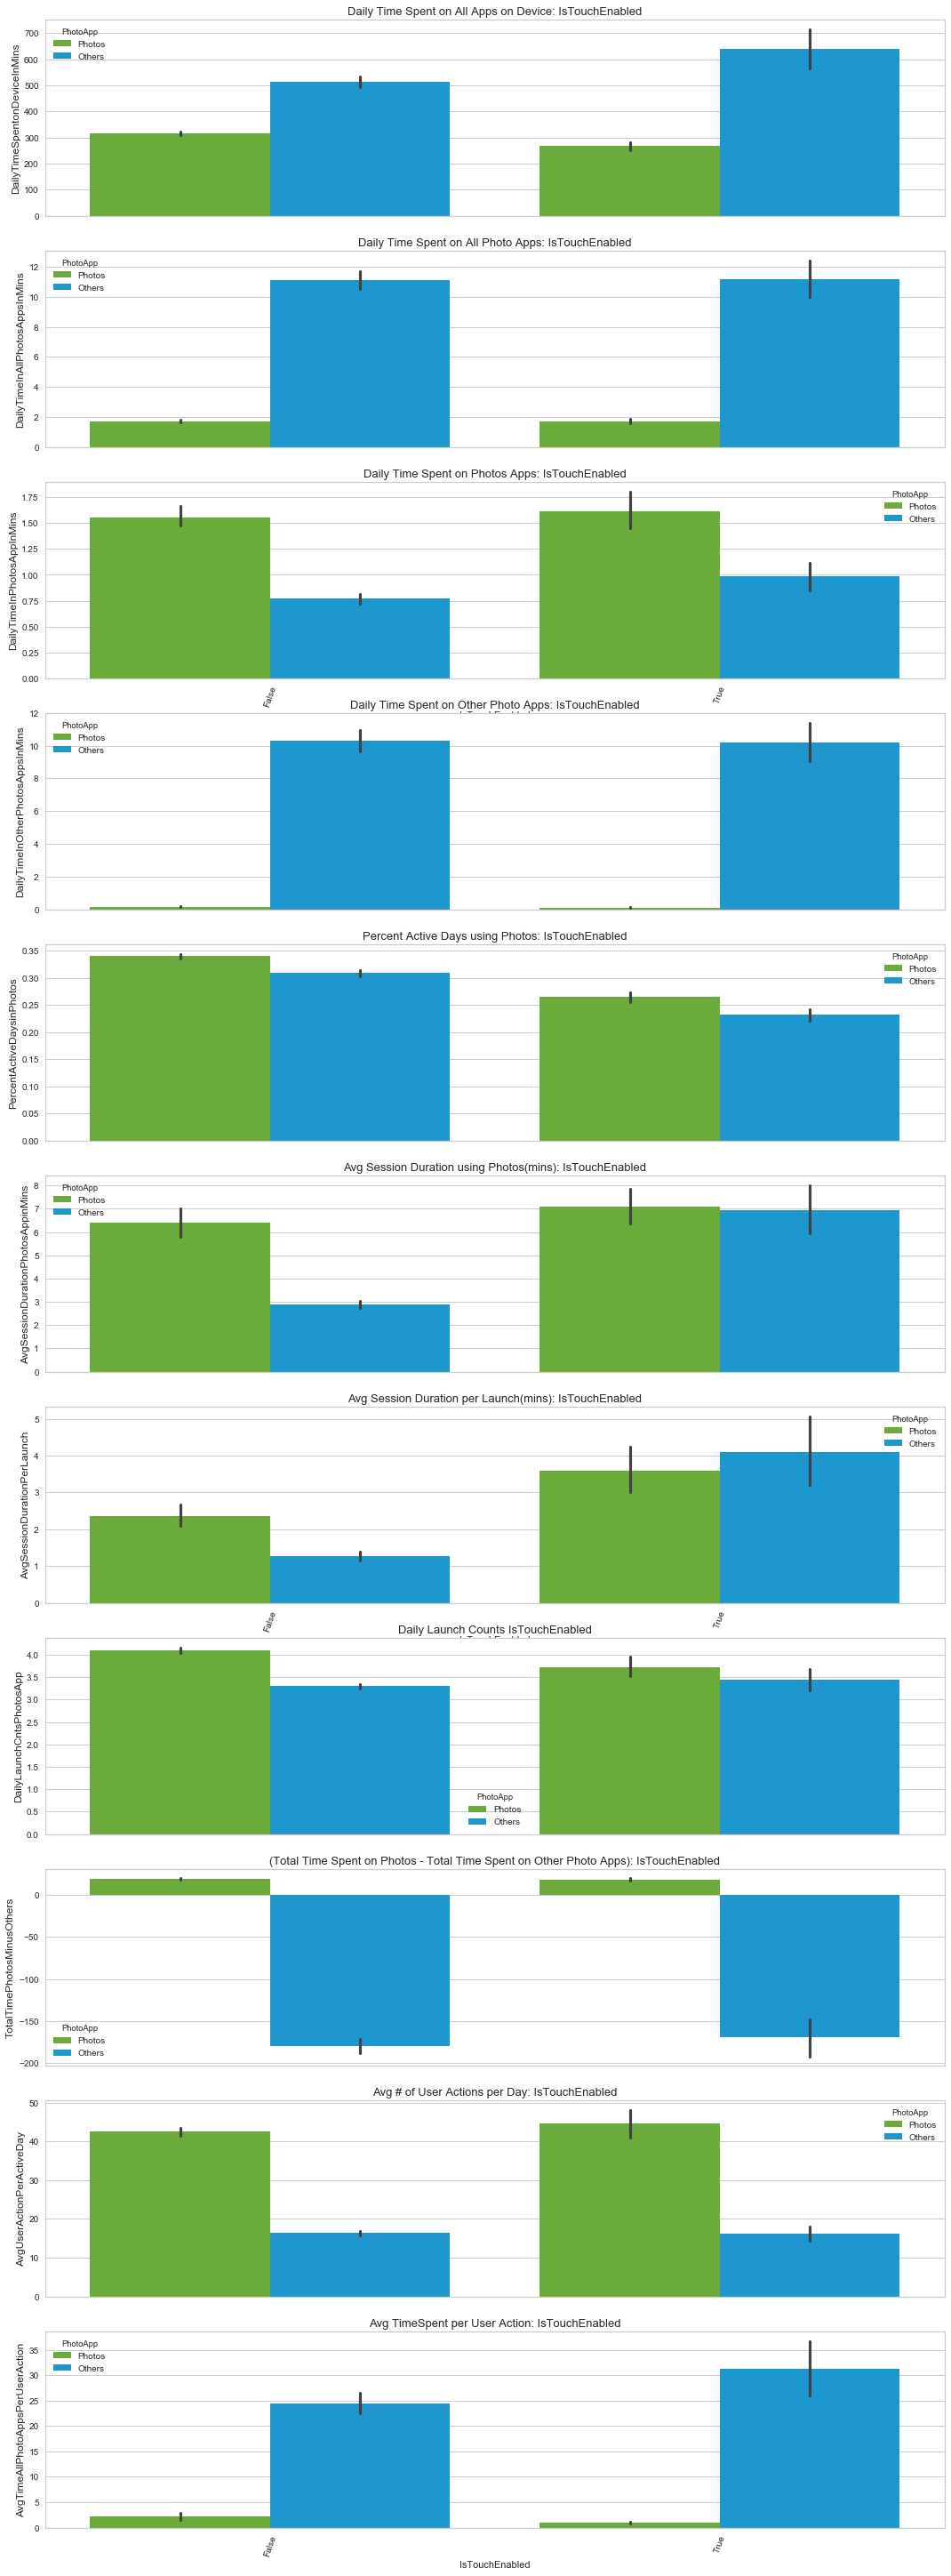

In [85]:
kpi_barplot('IsTouchEnabled')

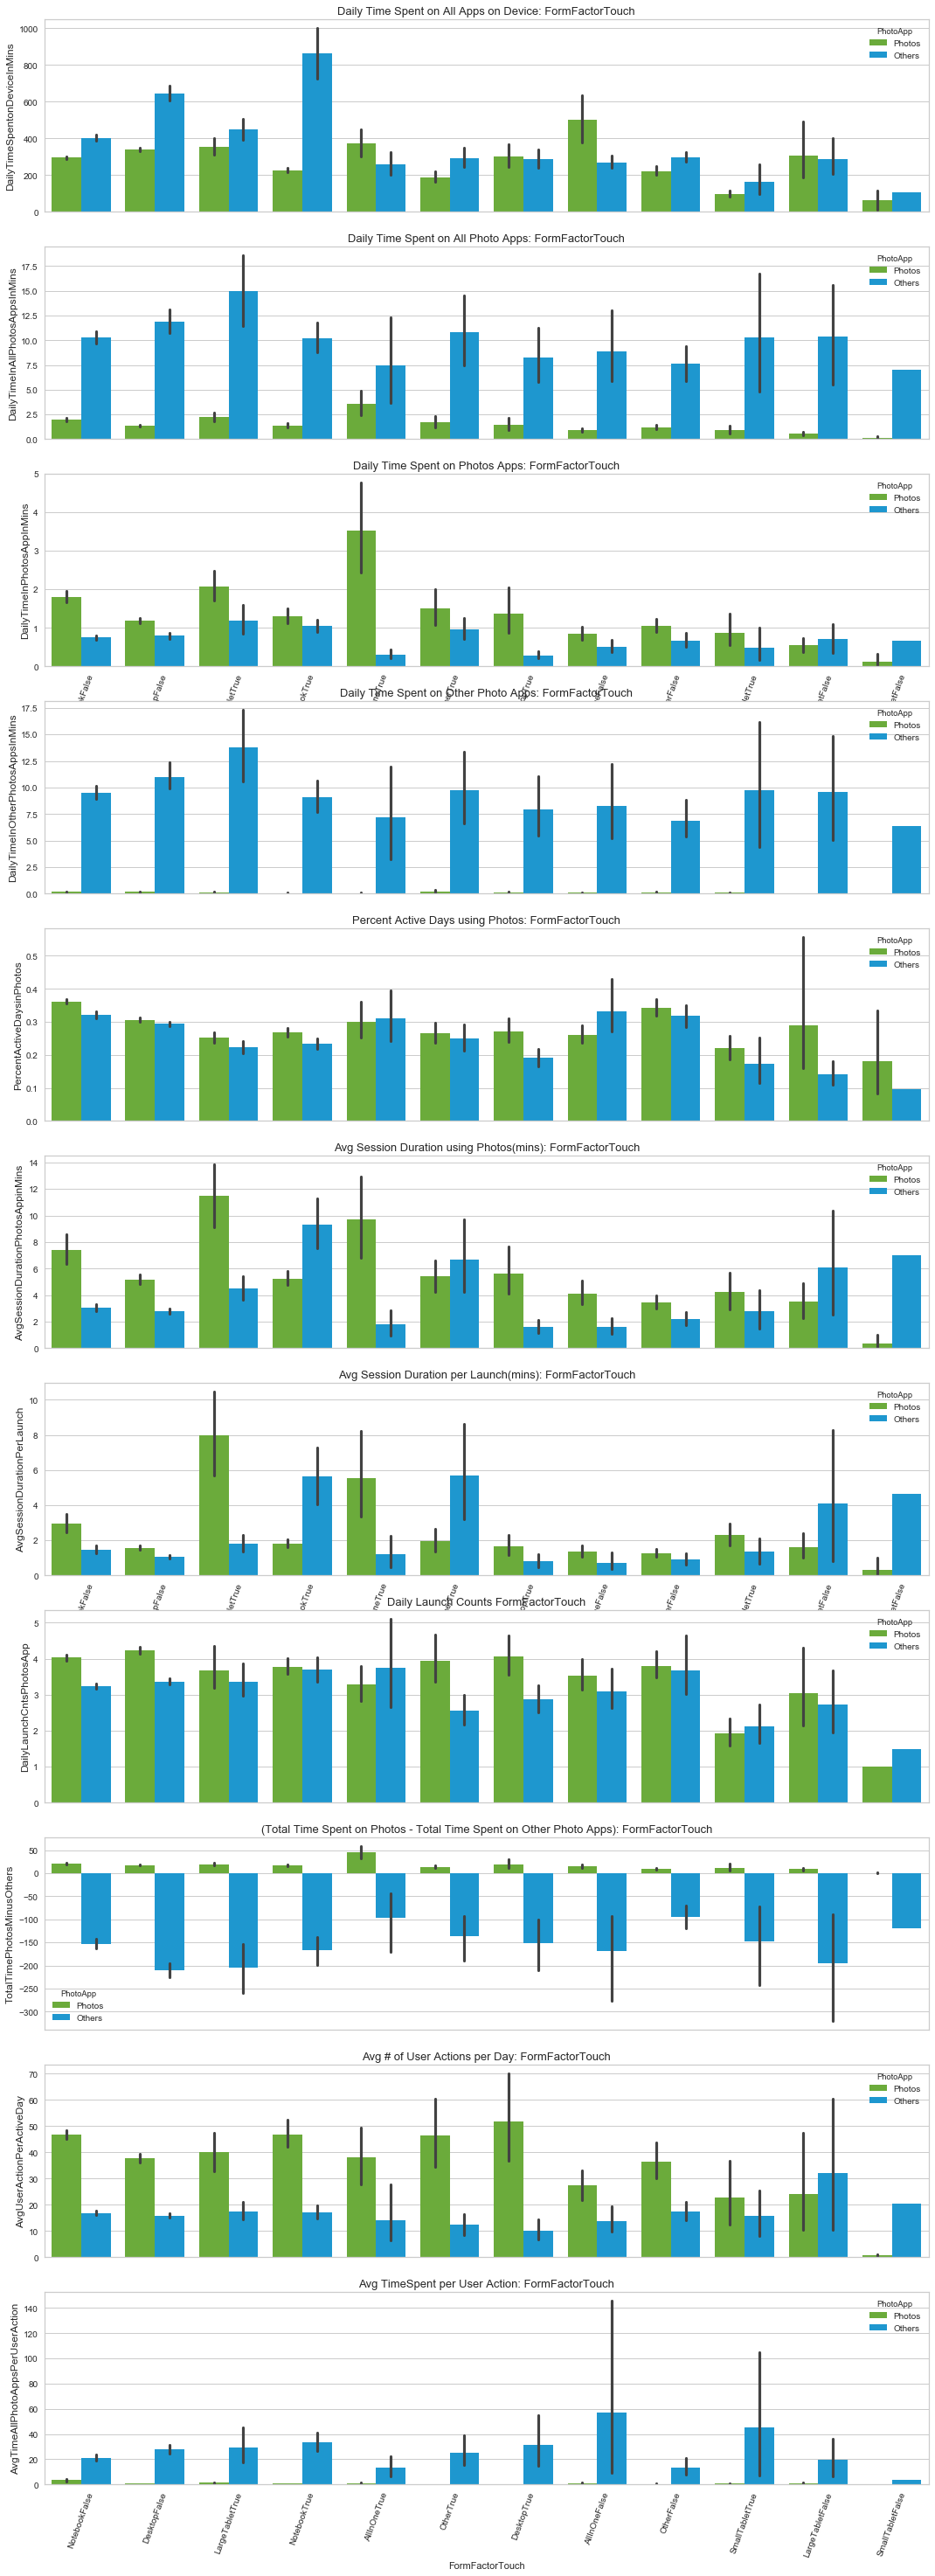

In [86]:
kpi_barplot('FormFactorTouch')

In [87]:
#Grouping by user actions
(df.groupby(['FormFactorTouch', 'PhotoApp'])['AvgSessionDurationPhotosAppinMins'].agg(["mean", "std"]).round(2))

mean    std
FormFactorTouch  PhotoApp              
AllInOneFalse    Others     1.58   4.30
                 Photos     4.08   9.79
AllInOneTrue     Others     1.81   4.02
                 Photos     9.68  22.71
DesktopFalse     Others     2.76  10.36
                 Photos     5.19  26.31
DesktopTrue      Others     1.60   3.00
                 Photos     5.60  17.65
LargeTabletFalse Others     6.06  12.71
                 Photos     3.49   5.33
LargeTabletTrue  Others     4.50   9.55
                 Photos    11.47  42.71
NotebookFalse    Others     3.03  13.57
                 Photos     7.42  84.95
NotebookTrue     Others     9.30  28.50
                 Photos     5.23  12.84
OtherFalse       Others     2.17   5.19
                 Photos     3.46   7.84
OtherTrue        Others     6.68  15.90
                 Photos     5.44  11.81
SmallTabletFalse Others     7.00    NaN
                 Photos     0.33   0.58
SmallTabletTrue  Others     2.77   4.12
                 Photos     4.26   6.99

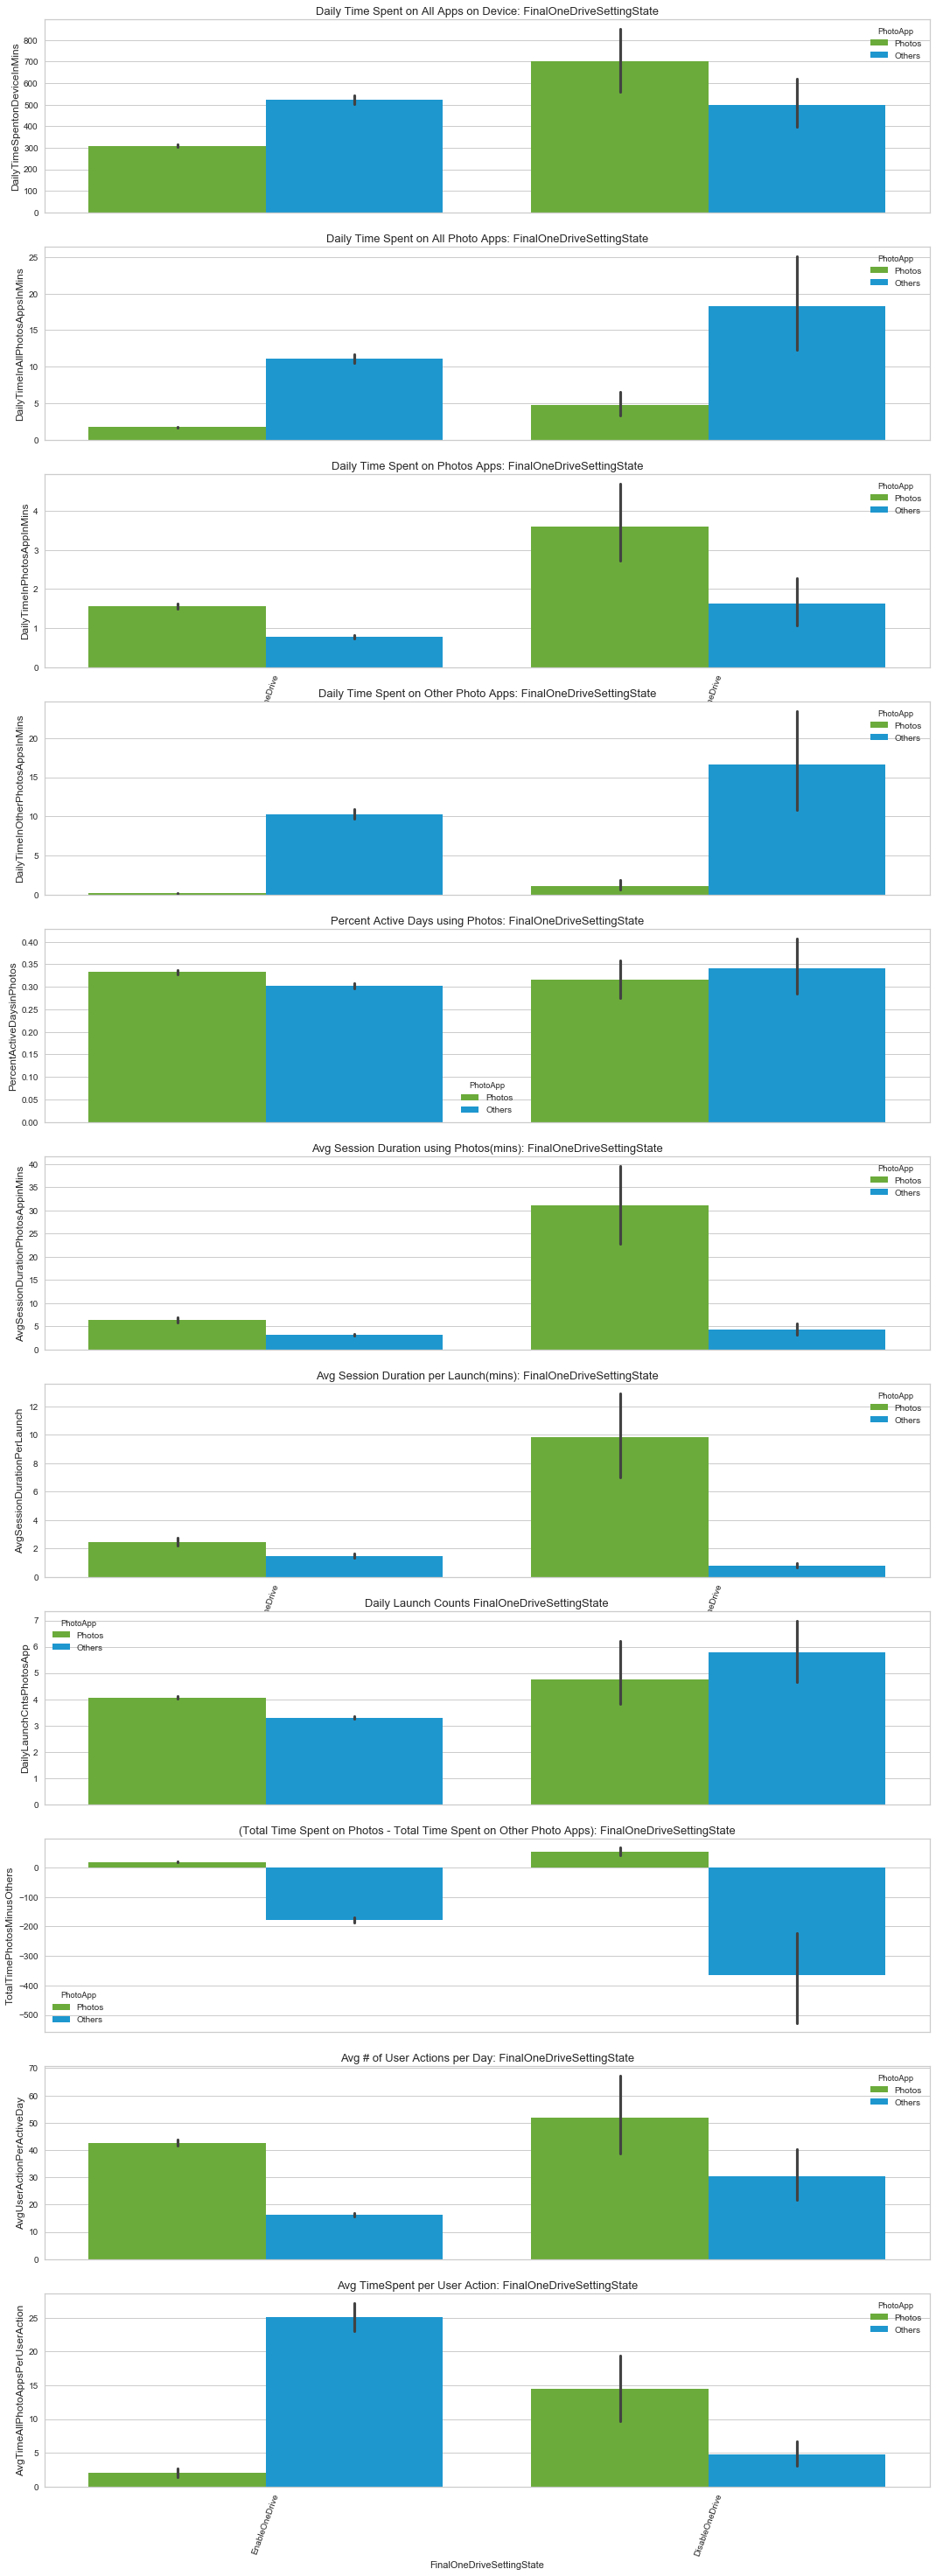

In [88]:
kpi_barplot('FinalOneDriveSettingState')

In [89]:
(df.groupby(['FinalOneDriveSettingState', 'PhotoApp'])['FromLocal','FromOneDrive'].agg(["mean", "std"]).round(2))

FromLocal          FromOneDrive          
                                        mean      std         mean       std
FinalOneDriveSettingState PhotoApp                                          
DisableOneDrive           Others     1207.97  3431.75      3038.46  13534.78
                          Photos     1733.39  4043.79       955.90   4117.70
EnableOneDrive            Others      842.30  3658.78       572.15   3585.34
                          Photos      752.74  2826.85       539.35   3043.19

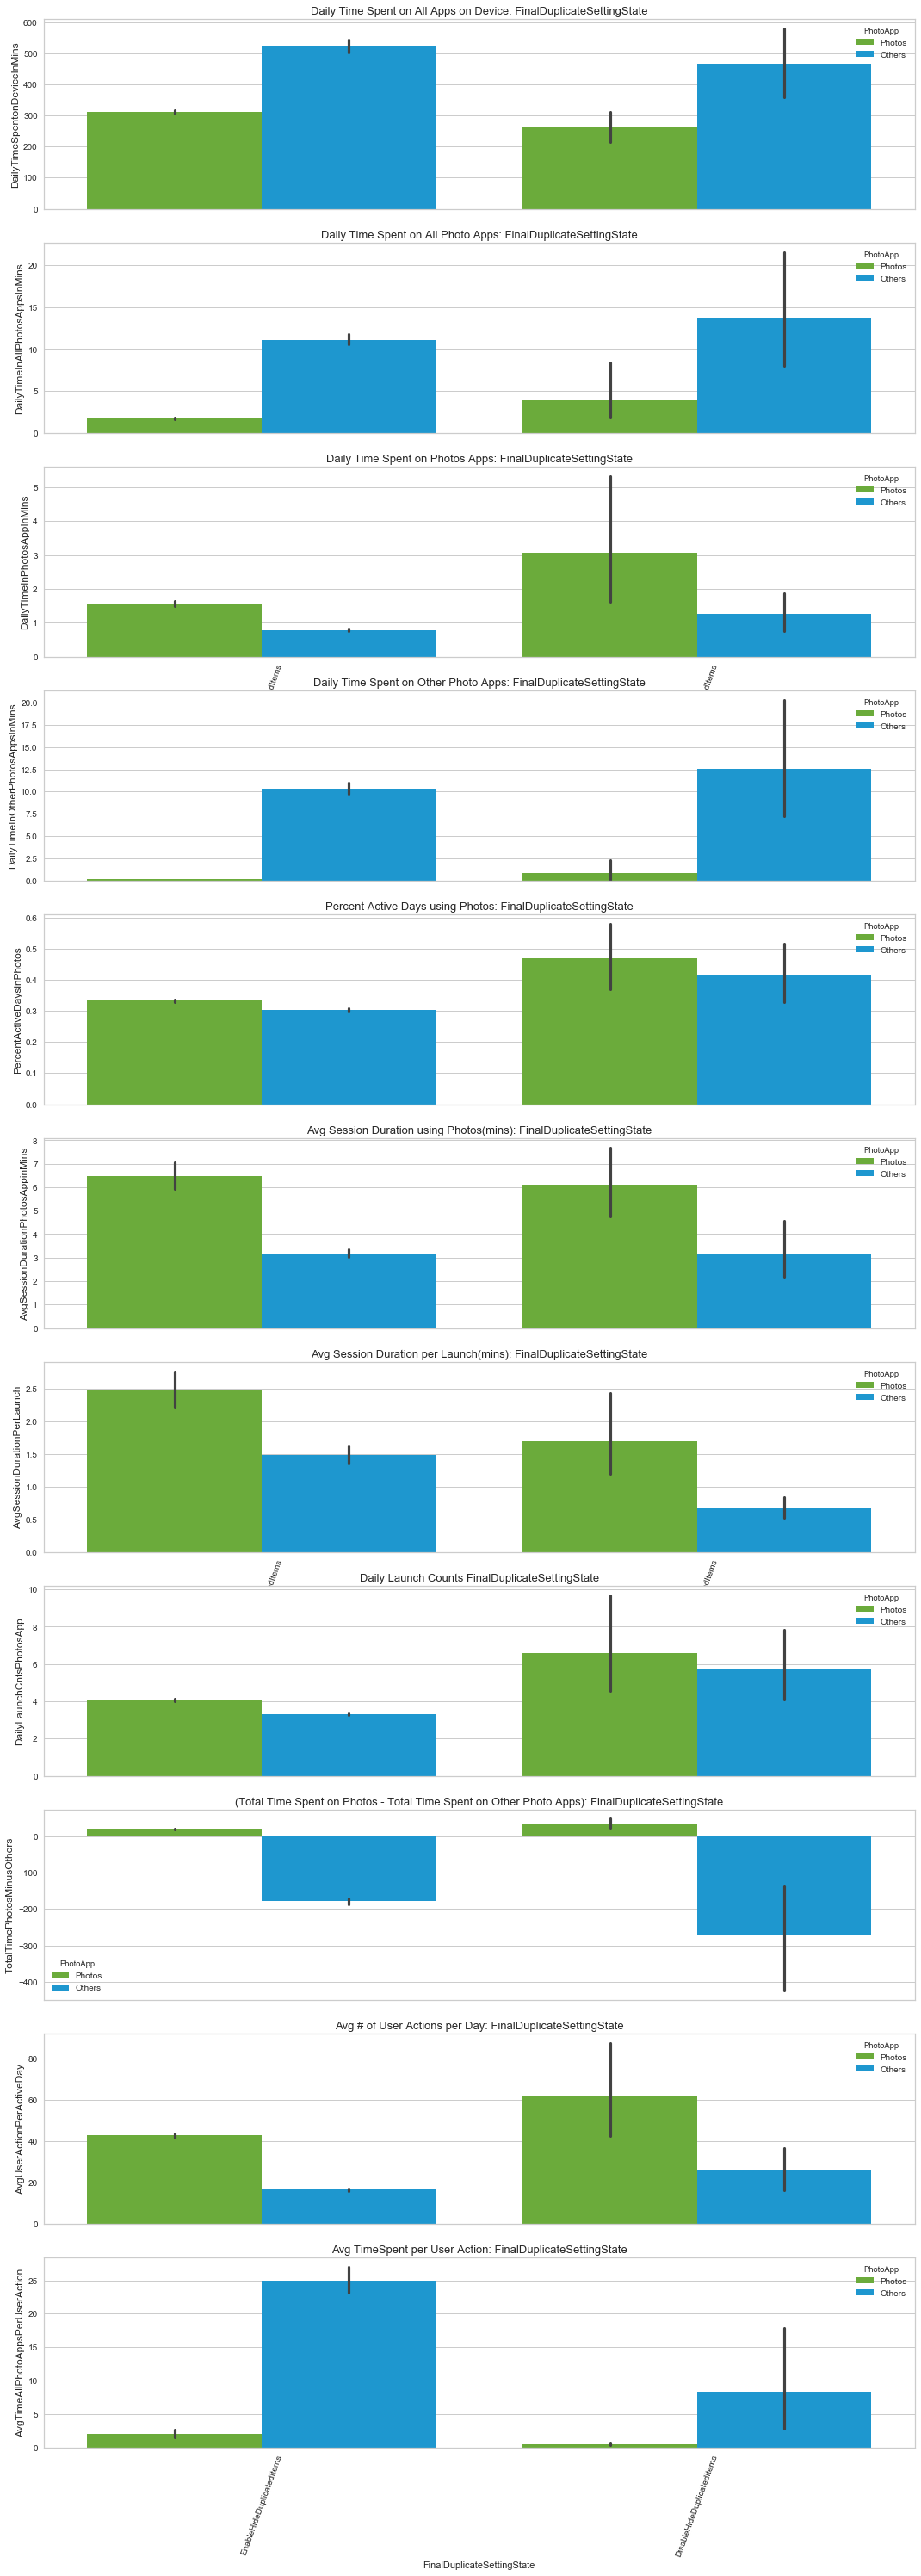

In [90]:
kpi_barplot('FinalDuplicateSettingState')

In [91]:
(df.groupby(['FinalDuplicateSettingState', 'PhotoApp'])['FromLocal','FromOneDrive'].agg(["mean", "std"]).round(2))

FromLocal          FromOneDrive         
                                         mean      std         mean      std
FinalDuplicateSettingState PhotoApp                                         
DisableHideDuplicatedItems Others     1982.92  7645.26       328.92   901.28
                           Photos      616.86  2037.29       827.69  5044.92
EnableHideDuplicatedItems  Others      841.47  3647.54       580.17  3662.10
                           Photos      757.60  2835.80       540.75  3044.18

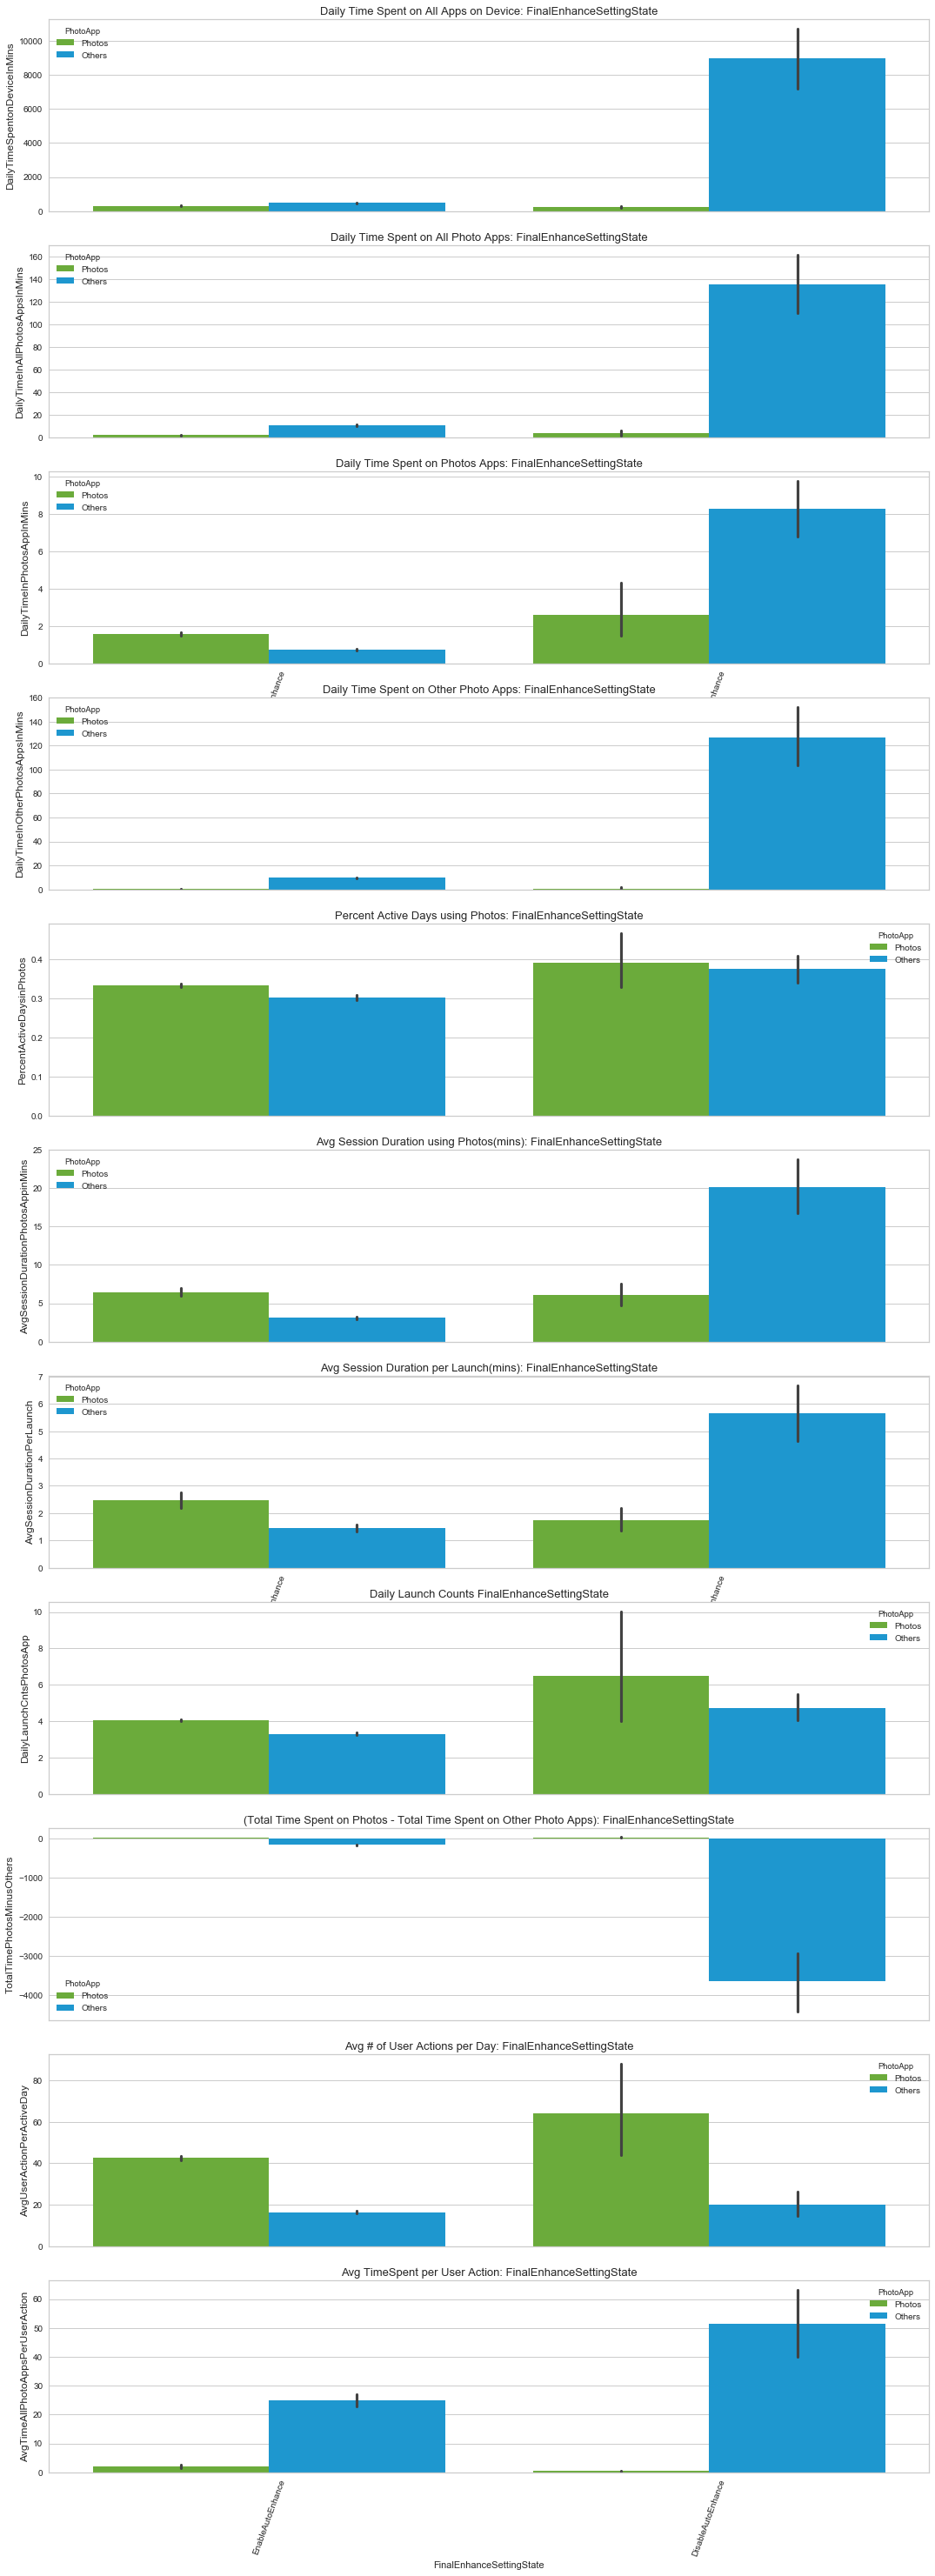

In [92]:
kpi_barplot('FinalEnhanceSettingState')

Numerical Variables

In [93]:
# Instead of looking at each numerical variables, I will use a heatmap to quickly exmaine correlation with respect to KPIs. 
# Heatmap with sized markers (Source: https://www.kaggle.com/drazen/heatmap-with-sized-markers)

def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )

In [94]:
#create a dataset with numeric variables
#cols = df.select_dtypes([np.number]).columns
numeric_features = ['TotalLaunchCount','LaunchByFile', 'LaunchByTileAndTaskBar', 'LaunchByOther', 
'AllActionsCount','PicturesViewed', 'VideosViewed', 'Viewed', 'Edit', 'OtherActionsCount',
'FromLocal','FromOneDrive', 'NumberOfImages', 'NumberOfVideos','NumberofOtherFiles', 'TotalFilesInCollection', 
'PercentImages','PercentVideos', 'PercentOthers',
'NumberOfActiveDaysInOS','TotalTimeInAllAppsInMins','NumberOfActiveDaysInPhotosApp',
'TotalTimeInAllPhotosAppsInMins','TotalTimeInPhotosAppInMins', 'TotalTimeInOtherPhotosAppsInMins',
'DailyTimeSpentonDeviceInMins','DailyTimeInAllPhotosAppsInMins', 'DailyTimeInPhotosAppInMins',
'AvgSessionDurationPhotosAppinMins','AvgSessionDurationPerLaunch', 'DailyLaunchCntsPhotosApp',
'DailyTimeInOtherPhotosAppsInMins', 'TotalTimePhotosMinusOthers',
'AvgUserActionPerActiveDay', 'AvgTimeAllPhotoAppsPerUserAction']              
                    
df['NumberofOtherFiles'] = df['NumberOfPanos'] +df['NumberOfRichMedia']
df['PercentImages'] = df['NumberOfImages']/df['TotalFilesInCollection']
df['PercentVideos'] = df['NumberOfVideos']/df['TotalFilesInCollection']
df['PercentOthers']= (df['NumberOfPanos']+df['NumberOfRichMedia'])/df['TotalFilesInCollection']
    
df_p = df[df['PhotoApp']=='Photos']
df_p_num = df_p[numeric_features]

df_o = df[df['PhotoApp']=='Others']
df_o_num = df_o[numeric_features]

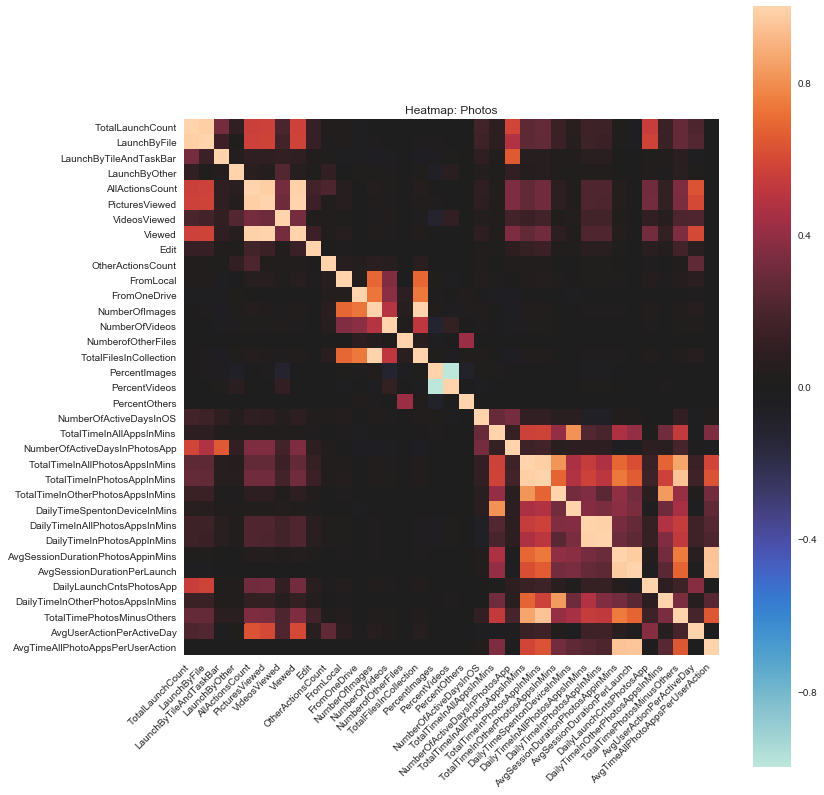

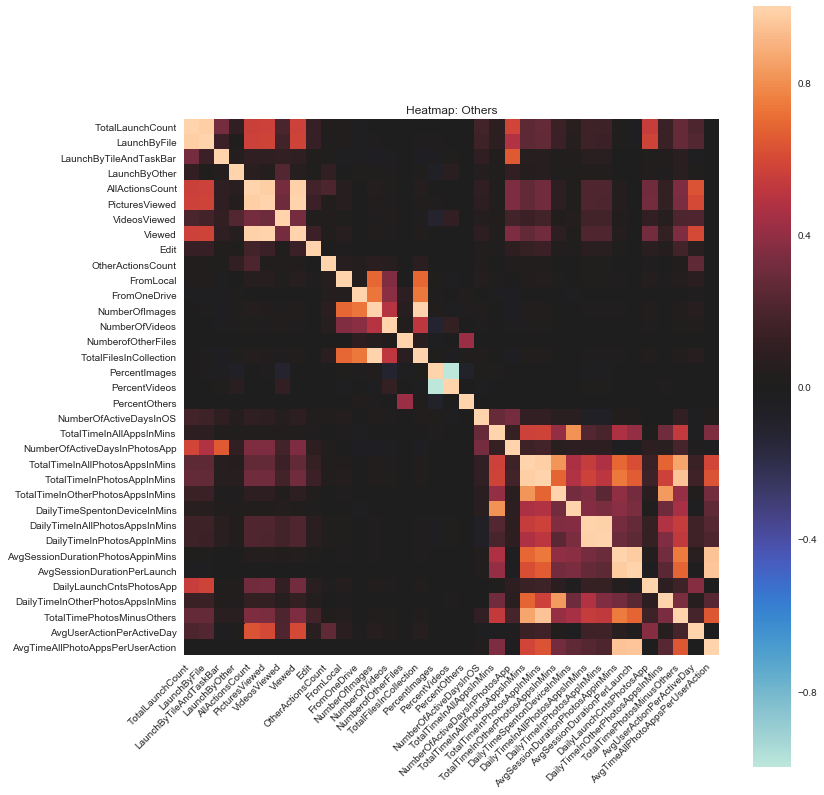

In [95]:
# Heatmap: Photos
corr = df_p_num.corr()

plt.figure(figsize=(12, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title('Heatmap: Photos');


corr = df_p_num.corr()

plt.figure(figsize=(12, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title('Heatmap: Others');

In [96]:
# correlations among numerical features are not overly different between Photos vs. Others.

#### A/B Testing 1.  Asian males >=25 vs. European males >=25

In [97]:
#pick control and experiment groups
control = df[(df['Gender'] =='M')  & (df['Continent']=='AS') &  (df['AgeGroup'].isin(['[25-35)','[35-50)', '>=50']))]
test = df[(df['Gender'] =='M') & (df['Continent']=='EU') &  (df['AgeGroup'].isin(['[25-35)','[35-50)', '>=50']))]  

In [98]:
#choose metrics to compare
cont_df = control[['NumberOfActiveDaysInOS', 'AllActionsCount','AvgSessionDurationPhotosAppinMins','AvgSessionDurationPerLaunch']]
test_df = test[['NumberOfActiveDaysInOS', 'AllActionsCount', 'AvgSessionDurationPhotosAppinMins','AvgSessionDurationPerLaunch']]

In [99]:
cont_df.describe()

NumberOfActiveDaysInOS  AllActionsCount  \
count             4483.000000      4483.000000   
mean                19.525764       150.407317   
std                  8.949132       411.765440   
min                  1.000000         0.000000   
25%                 12.000000         3.000000   
50%                 21.000000        18.000000   
75%                 27.000000       107.500000   
max                 31.000000      6583.000000   

       AvgSessionDurationPhotosAppinMins  AvgSessionDurationPerLaunch  
count                        4483.000000                  4483.000000  
mean                           16.162760                     7.279175  
std                           196.259946                    97.790274  
min                             0.000000                     0.000000  
25%                             0.000000                     0.000000  
50%                             1.000000                     0.375000  
75%                             3.928261                     1.107577  
max                          3279.000000                  1639.500000

In [100]:
test_df.describe()
#two invariant variables show similar means while the other evaluation metrics show differnt means/std.

NumberOfActiveDaysInOS  AllActionsCount  \
count             6719.000000      6719.000000   
mean                18.847894       157.058937   
std                  9.251413       470.651013   
min                  1.000000         0.000000   
25%                 11.000000         3.000000   
50%                 20.000000        17.000000   
75%                 27.000000       109.000000   
max                 31.000000     11083.000000   

       AvgSessionDurationPhotosAppinMins  AvgSessionDurationPerLaunch  
count                        6719.000000                  6719.000000  
mean                            7.696644                     2.871799  
std                            37.561690                    16.574355  
min                             0.000000                     0.000000  
25%                             0.166667                     0.058824  
50%                             1.333333                     0.500000  
75%                             5.000000                     1.500000  
max                           831.000000                   831.000000

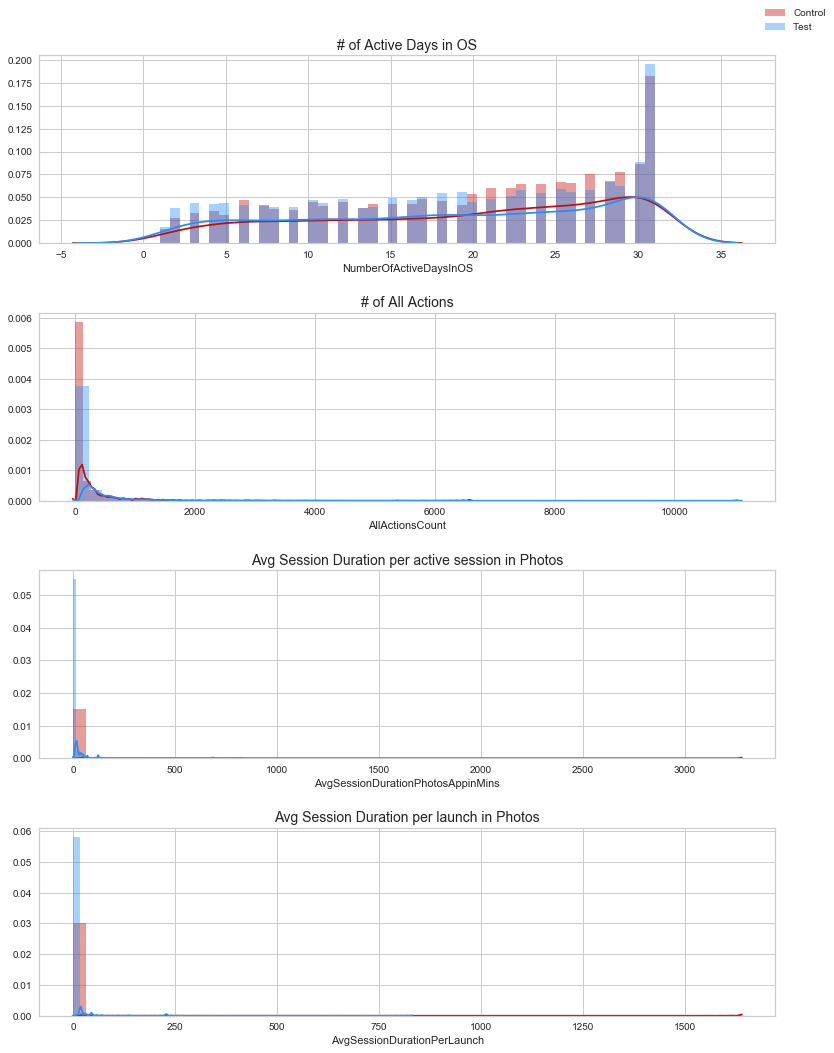

In [101]:
#histograms of these chosen variables
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(12,15))
fig.tight_layout(pad=5.0)

sns.distplot(cont_df['NumberOfActiveDaysInOS'],  ax= ax1, color='r',bins=50)
sns.distplot(test_df['NumberOfActiveDaysInOS'], ax= ax1, color='dodgerblue',  bins=50)
ax1.set_title("# of Active Days in OS", fontsize=14)

sns.distplot(cont_df['AllActionsCount'],  ax= ax2, color='r',bins=50)
sns.distplot(test_df['AllActionsCount'], ax= ax2, color='dodgerblue',  bins=50)
ax2.set_title("# of All Actions", fontsize=14)

sns.distplot(cont_df['AvgSessionDurationPhotosAppinMins'],  ax= ax3, color='r',bins=50)
sns.distplot(test_df['AvgSessionDurationPhotosAppinMins'], ax= ax3, color='dodgerblue',  bins=50)
ax3.set_title("Avg Session Duration per active session in Photos", fontsize=14)

sns.distplot(cont_df['AvgSessionDurationPerLaunch'],  ax= ax4, color='r',bins=50)
sns.distplot(test_df['AvgSessionDurationPerLaunch'], ax= ax4, color='dodgerblue',  bins=50)
ax4.set_title("Avg Session Duration per launch in Photos", fontsize=14)

fig.legend(labels=['Control','Test'], loc= 'best')
plt.show()

In [102]:
def two_sample_test(control, test):
    dmin = round(test.mean() - control.mean(),4)
    print("observed difference in mean:", dmin)
    
    ttest,pval = ttest_ind(control,test)
    print("p-value from t-test is:",pval)
    
    lower_ci, upper_ci = stests.zconfint(control,test,value=0, alternative='two-sided')
    print("lower_ci:",lower_ci, "  upper_ci:", upper_ci)
    
    ztest ,pval1 = stests.ztest(control,test,value=0, alternative='two-sided')
    print("p-value from z-test is:",pval1)
    
    if pval1<0.05:
        print("reject the null hypothesis")
    else:
        print("fail to reject the null hypothesis")

In [103]:
#DailyTimeInPhotosAppInMins
two_sample_test(cont_df['AvgSessionDurationPhotosAppinMins'], test_df['AvgSessionDurationPhotosAppinMins'])

observed difference in mean: -8.4661
p-value from t-test is: 0.0005778894003821815
lower_ci: 3.6463712461970346   upper_ci: 13.285860136898233
p-value from z-test is: 0.0005757842476165235
reject the null hypothesis


In [104]:
#AvgSessionDurationPerLaunch
two_sample_test(cont_df['AvgSessionDurationPerLaunch'], test_df['AvgSessionDurationPerLaunch'])

observed difference in mean: -4.4074
p-value from t-test is: 0.00029892704827867055
lower_ci: 2.019367384262473   upper_ci: 6.795384900637494
p-value from z-test is: 0.000297617854104033
reject the null hypothesis


In [105]:
#Invariant Metrics: number of active days in OS
NumberOfActiveDaysInOS_cont=cont_df['NumberOfActiveDaysInOS'].sum()
NumberOfActiveDaysInOS_test=test_df['NumberOfActiveDaysInOS'].sum()
NumberOfActiveDaysInOS_total=NumberOfActiveDaysInOS_cont+NumberOfActiveDaysInOS_test
print ("number of active days in os in control:", NumberOfActiveDaysInOS_cont)
print ("number of active days in os in experiment:" ,NumberOfActiveDaysInOS_test)
print ("ratio of control to total:" ,NumberOfActiveDaysInOS_cont/(NumberOfActiveDaysInOS_total))

number of active days in os in control: 87534
number of active days in os in experiment: 126639
ratio of control to total: 0.40870697987141236


In [106]:
#Invariant Metrics: Count of all user actions
AllActionsCount_cont=cont_df['AllActionsCount'].sum()
AllActionsCount_test=test_df['AllActionsCount'].sum()
AllActionsCount_total=AllActionsCount_cont+AllActionsCount_test
print ("all actions count in control:", AllActionsCount_cont)
print ("all actions count in experiment:" ,AllActionsCount_test)
print ("ratio of control to total:" ,AllActionsCount_cont/(AllActionsCount_total))

all actions count in control: 674276
all actions count in experiment: 1055279
ratio of control to total: 0.389855193966078


In [107]:
#sanity checks for invariant metrics: Z-test (alpha =5%)
print('95-Percent Confidence Interval for NumberOfActiveDaysInOS: \n Lower Bound = %.4f, Upper Bound = %.4f' % \
      (statsmodels.stats.proportion.proportion_confint(\
            NumberOfActiveDaysInOS_cont, NumberOfActiveDaysInOS_total, alpha=0.05, method='normal'))) 

print('95-Percent Confidence Interval for AllActionsCount: \n Lower Bound = %.4f, Upper Bound = %.4f' % \
      (statsmodels.stats.proportion.proportion_confint(\
            AllActionsCount_cont, AllActionsCount_total, alpha=0.05, method='normal'))) 

#both observed values fall under the 95% confidence intervals. 
#Hence, we conclude that two user groups exhibit similar behaviors when it comes to # of active days in OS and total number of user actions. 

95-Percent Confidence Interval for NumberOfActiveDaysInOS: 
 Lower Bound = 0.4066, Upper Bound = 0.4108
95-Percent Confidence Interval for AllActionsCount: 
 Lower Bound = 0.3891, Upper Bound = 0.3906


In [108]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [109]:
#explore other actions statistics by control and test groups
(control.groupby(['Continent'])['ImageEdit','VideoTrimEdit'].agg([np.sum, np.mean, np.std, np.median,\
                     np.var, np.min, np.max, percentile(50), percentile(95)]).round(2))

ImageEdit                                                    \
                sum  mean   std median    var amin amax percentile_50   
Continent                                                               
AS             2883  0.64  5.16      0  26.61    0  223             0   

                        VideoTrimEdit                                     \
          percentile_95           sum  mean   std median   var amin amax   
Continent                                                                  
AS                    3            86  0.02  0.34      0  0.11    0    7   

                                       
          percentile_50 percentile_95  
Continent                              
AS                    0             0

In [110]:
(test.groupby(['Continent'])['ImageEdit','VideoTrimEdit'].agg([np.sum, np.mean, np.std, np.median,\
                     np.var, np.min, np.max, percentile(50), percentile(95)]).round(2))

ImageEdit                                                    \
                sum  mean   std median    var amin amax percentile_50   
Continent                                                               
EU             3680  0.55  4.29      0  18.42    0  176             0   

                        VideoTrimEdit                                     \
          percentile_95           sum  mean   std median   var amin amax   
Continent                                                                  
EU                    2            34  0.01  0.09      0  0.01    0    3   

                                       
          percentile_50 percentile_95  
Continent                              
EU                    0             0

#### A/B Testing 2. BRIC vs. Non-BRIC

In [111]:
#pick control and experiment groups
df['BRIC'] = np.where(df['Country'].isin(['BR', 'RU', 'CN', 'IN']),1, 0)

bric_control = df[df['BRIC']==0]
bric_test =  df[df['BRIC']==1] 

In [112]:
#choose metrics to compare
cont_df = bric_control[['NumberOfActiveDaysInOS', 'AllActionsCount','AvgSessionDurationPhotosAppinMins','AvgSessionDurationPerLaunch']]
test_df = bric_test[['NumberOfActiveDaysInOS', 'AllActionsCount', 'AvgSessionDurationPhotosAppinMins','AvgSessionDurationPerLaunch']]

In [113]:
cont_df.describe()

NumberOfActiveDaysInOS  AllActionsCount  \
count            51763.000000     51763.000000   
mean                18.389892       167.346947   
std                  9.286383       520.204902   
min                  1.000000         0.000000   
25%                 10.000000         3.000000   
50%                 19.000000        17.000000   
75%                 27.000000       108.000000   
max                 31.000000     23338.000000   

       AvgSessionDurationPhotosAppinMins  AvgSessionDurationPerLaunch  
count                       51763.000000                 51763.000000  
mean                            5.953999                     2.399735  
std                            61.211986                    30.863161  
min                             0.000000                     0.000000  
25%                             0.000000                     0.000000  
50%                             1.000000                     0.333333  
75%                             3.500000                     1.000000  
max                          3279.000000                  1639.500000

In [114]:
test_df.describe()

NumberOfActiveDaysInOS  AllActionsCount  \
count            19933.000000     19933.000000   
mean                19.222546       164.252195   
std                  9.060012       469.553147   
min                  1.000000         0.000000   
25%                 12.000000         3.000000   
50%                 20.000000        19.000000   
75%                 28.000000       109.000000   
max                 31.000000     11083.000000   

       AvgSessionDurationPhotosAppinMins  AvgSessionDurationPerLaunch  
count                        19933.00000                 19933.000000  
mean                             4.05963                     1.508550  
std                             14.41339                     9.047531  
min                              0.00000                     0.000000  
25%                              0.00000                     0.000000  
50%                              1.00000                     0.272727  
75%                              3.00000                     0.875000  
max                            312.50000                   312.500000

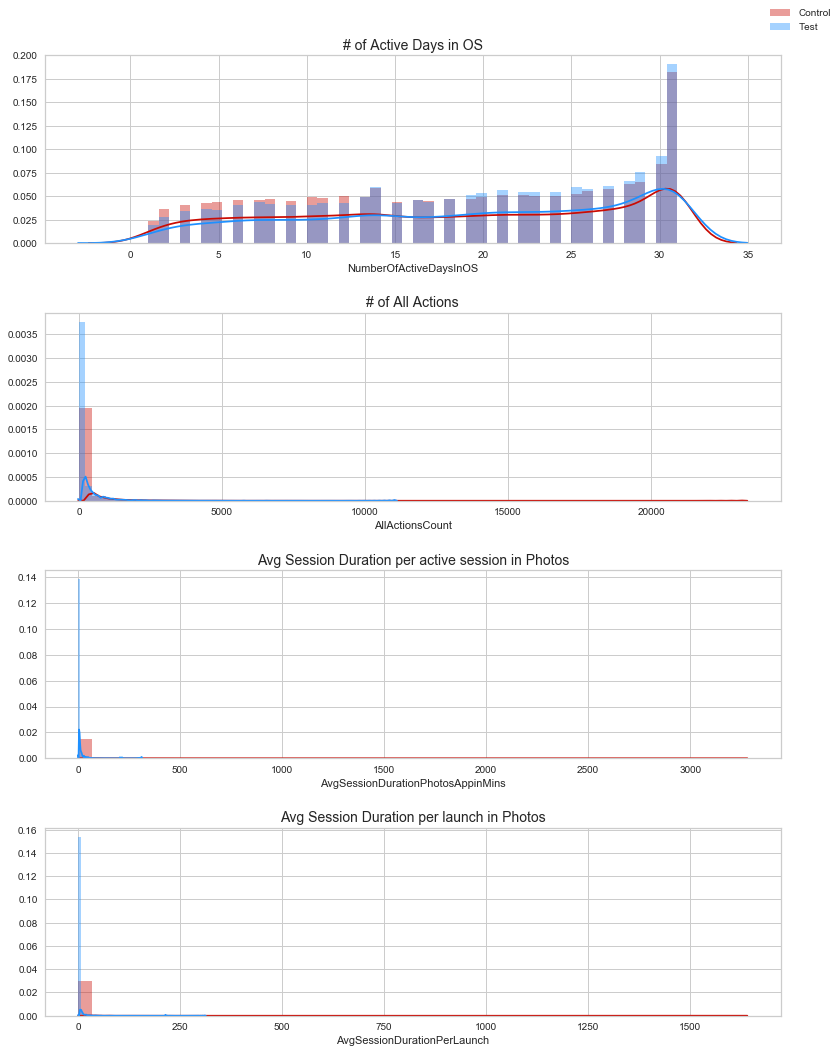

In [115]:
#histograms of these chosen variables
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(12,15))
fig.tight_layout(pad=5.0)

sns.distplot(cont_df['NumberOfActiveDaysInOS'],  ax= ax1, color='r',bins=50)
sns.distplot(test_df['NumberOfActiveDaysInOS'], ax= ax1, color='dodgerblue',  bins=50)
ax1.set_title("# of Active Days in OS", fontsize=14)

sns.distplot(cont_df['AllActionsCount'],  ax= ax2, color='r',bins=50)
sns.distplot(test_df['AllActionsCount'], ax= ax2, color='dodgerblue',  bins=50)
ax2.set_title("# of All Actions", fontsize=14)

sns.distplot(cont_df['AvgSessionDurationPhotosAppinMins'],  ax= ax3, color='r',bins=50)
sns.distplot(test_df['AvgSessionDurationPhotosAppinMins'], ax= ax3, color='dodgerblue',  bins=50)
ax3.set_title("Avg Session Duration per active session in Photos", fontsize=14)

sns.distplot(cont_df['AvgSessionDurationPerLaunch'],  ax= ax4, color='r',bins=50)
sns.distplot(test_df['AvgSessionDurationPerLaunch'], ax= ax4, color='dodgerblue',  bins=50)
ax4.set_title("Avg Session Duration per launch in Photos", fontsize=14)

fig.legend(labels=['Control','Test'], loc= 'best')
plt.show()

In [116]:
#DailyTimeInPhotosAppInMins
#outlier treatments (Remove data above 95th percetile)
cont_df95 = cont_df[cont_df['AvgSessionDurationPhotosAppinMins'] < np.percentile(cont_df['AvgSessionDurationPhotosAppinMins'],95)]
test_df95 = test_df[test_df['AvgSessionDurationPhotosAppinMins'] < np.percentile(test_df['AvgSessionDurationPhotosAppinMins'],95)]

two_sample_test(cont_df95['AvgSessionDurationPhotosAppinMins'], test_df95['AvgSessionDurationPhotosAppinMins'])

observed difference in mean: -0.2911
p-value from t-test is: 1.646494375618627e-26
lower_ci: 0.2375979355298744   upper_ci: 0.34465333758920125
p-value from z-test is: 1.5689751570706026e-26
reject the null hypothesis


In [117]:
#AvgSessionDurationPerLaunch
#outlier treatments (Remove data above 95th percetile)
cont_df95 = cont_df[cont_df['AvgSessionDurationPerLaunch'] < np.percentile(cont_df['AvgSessionDurationPerLaunch'],95)]
test_df95 = test_df[test_df['AvgSessionDurationPerLaunch'] < np.percentile(test_df['AvgSessionDurationPerLaunch'],95)]

two_sample_test(cont_df95['AvgSessionDurationPerLaunch'], test_df95['AvgSessionDurationPerLaunch'])

observed difference in mean: -0.1262
p-value from t-test is: 4.036079244396576e-51
lower_ci: 0.1097485262195183   upper_ci: 0.14260811190097927
p-value from z-test is: 3.338084720850892e-51
reject the null hypothesis


In [118]:
#Invariant Metrics: number of active days in OS
NumberOfActiveDaysInOS_cont=cont_df['NumberOfActiveDaysInOS'].sum()
NumberOfActiveDaysInOS_test=test_df['NumberOfActiveDaysInOS'].sum()
NumberOfActiveDaysInOS_total=NumberOfActiveDaysInOS_cont+NumberOfActiveDaysInOS_test
print ("number of active days in os in control:", NumberOfActiveDaysInOS_cont)
print ("number of active days in os in experiment:" ,NumberOfActiveDaysInOS_test)
print ("ratio of control to total:" ,NumberOfActiveDaysInOS_cont/(NumberOfActiveDaysInOS_total))

number of active days in os in control: 951916
number of active days in os in experiment: 383163
ratio of control to total: 0.7130035001674059


In [119]:
#Invariant Metrics: Count of all user actions
AllActionsCount_cont=cont_df['AllActionsCount'].sum()
AllActionsCount_test=test_df['AllActionsCount'].sum()
AllActionsCount_total=AllActionsCount_cont+AllActionsCount_test
print ("all actions count in control:", AllActionsCount_cont)
print ("all actions count in experiment:" ,AllActionsCount_test)
print ("ratio of control to total:" ,AllActionsCount_cont/(AllActionsCount_total))

all actions count in control: 8662380
all actions count in experiment: 3274039
ratio of control to total: 0.7257101145661861


In [120]:
#sanity checks for invariant metrics: Z-test (alpha =5%)
print('95-Percent Confidence Interval for NumberOfActiveDaysInOS: \n Lower Bound = %.4f, Upper Bound = %.4f' % \
      (statsmodels.stats.proportion.proportion_confint(\
            NumberOfActiveDaysInOS_cont, NumberOfActiveDaysInOS_total, alpha=0.05, method='normal'))) 

print('95-Percent Confidence Interval for AllActionsCount: \n Lower Bound = %.4f, Upper Bound = %.4f' % \
      (statsmodels.stats.proportion.proportion_confint(\
            AllActionsCount_cont, AllActionsCount_total, alpha=0.05, method='normal'))) 

#both observed values fall under the 95% confidence intervals. 
#Hence, we conclude that two user groups exhibit similar behaviors when it comes to # of active days in OS and total number of user actions. 

95-Percent Confidence Interval for NumberOfActiveDaysInOS: 
 Lower Bound = 0.7122, Upper Bound = 0.7138
95-Percent Confidence Interval for AllActionsCount: 
 Lower Bound = 0.7255, Upper Bound = 0.7260


#### Supervised Algorithm - Random Forest

In [121]:
df =df.dropna()
target = ['PhotoApp']

cat_features = ['Continent','AgeGroup', 'Gender', 'Continent_Gender', 'Continent_AgeGroup', 'Gender_AgeGroup', 'Continent_AgeGroup_Gender',
                'FormFactorTouch', 'FinalOneDriveSettingState', 'FinalDuplicateSettingState', 'FinalEnhanceSettingState']

num_features = [ 'TotalLaunchCount','Viewed', 'PicturesViewed', 'VideosViewed',  'Edit', 'OtherActionsCount','AllActionsCount',
'TotalLaunchCount', 'LaunchByFile', 'LaunchByTileAndTaskBar', 'LaunchByOther',
'LaunchByFilePercent','LaunchByTileAndTaskBarPercent','LaunchByOtherPercent',
'FromLocal','FromOneDrive', 'NumberOfImages', 'NumberOfVideos','TotalFilesInCollection',                 
'PercentImages','PercentVideos', 'PercentOthers', 
'LaunchByOther', 'PercentImages','PercentVideos', 'PercentOthers',
'NumberOfActiveDaysInOS','NumberOfActiveDaysInPhotosApp','TotalTimeInAllAppsInMins']    

In [122]:
# Numerical variables: normaalize based on min/max
scaler = MinMaxScaler() 
fit_scaled = scaler.fit_transform(df[num_features]) 
df_num = pd.DataFrame(fit_scaled, columns=df[num_features].columns,index=df.index)

In [123]:
# one hot-encoding
df_cat = pd.get_dummies(df[cat_features], prefix_sep="__", columns=cat_features)
df_cat.shape

# Target variable
df['Target'] = np.where(df['PhotoApp']=='Photos', 1,0)

In [124]:
# Modeling data
model_df = pd.concat([df_cat, df_num, df['Target']],axis=1, join='inner')

In [125]:
target_map = {'0': 0, '1': 1}
model_df['__target__'] = model_df['Target'].map(str).map(target_map)
del model_df['Target']

# Remove rows for which the target is unknown.
model_df = model_df[~model_df['__target__'].isnull()]

In [126]:
#cross-validation strategy (80/20% split)
train, test = train_test_split(model_df, test_size=0.2)

# split the data into features and labels
train_X = train.drop('__target__', axis=1)
test_X = test.drop('__target__', axis=1)

train_Y = np.array(train['__target__'])
test_Y = np.array(test['__target__'])

In [127]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
clf_rf= RandomForestClassifier(n_estimators=100,
    random_state=1337,
    max_depth=5,
    min_samples_leaf=1,
    verbose=2)

In [128]:
#roc chart
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [129]:
#key performance metrics
def fn_metrics(act, prob, pred):
    fpr, tpr, thresholds = roc_curve(act, prob)
    roc_auc = auc(fpr, tpr)
    
    print ('ROC value:{:.2f}'.format(roc_auc*100))

    plot_roc_curve(fpr, tpr)

    #Precision,Recall, F-1 Score
    print ('Accuracy:{:.2f}'.format(accuracy_score(act, pred)))
    print ('F1 score:{:.2f}'.format(f1_score(act, pred)))
    print ('Recall::{:.2f}'.format(recall_score(act, pred)))
    print ('Precision:{:.2f}'.format(precision_score(act, pred)))
    print ('\n clasification report:\n',classification_report(act, pred))
    print ('\n confussion matrix:\n',confusion_matrix(act, pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


ROC value:68.33


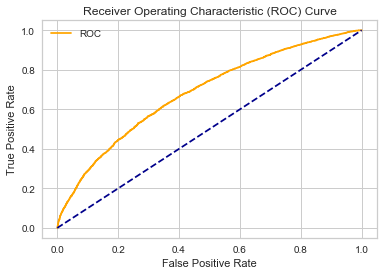

Accuracy:0.69
F1 score:0.81
Recall::1.00
Precision:0.69

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      4221
           1       0.69      1.00      0.81      9213

    accuracy                           0.69     13434
   macro avg       0.84      0.50      0.41     13434
weighted avg       0.78      0.69      0.56     13434


 confussion matrix:
 [[  10 4211]
 [   0 9213]]


In [130]:
#Random Forest
clf_rf.fit(train_X, train_Y)
_predictions = clf_rf.predict(test_X)
_probas = clf_rf.predict_proba(test_X)
predictions = pd.Series(data=_predictions, index=test_X.index, name='predicted_value')

cols = [
        u'probability_of_value_%s' % label
        for (_, label) in sorted([(int(target_map[label]), label) for label in target_map])
    ]

probabilities = pd.DataFrame(data=_probas, index=test_X.index, columns=cols)

fn_metrics(test['__target__'], probabilities['probability_of_value_1'], predictions)

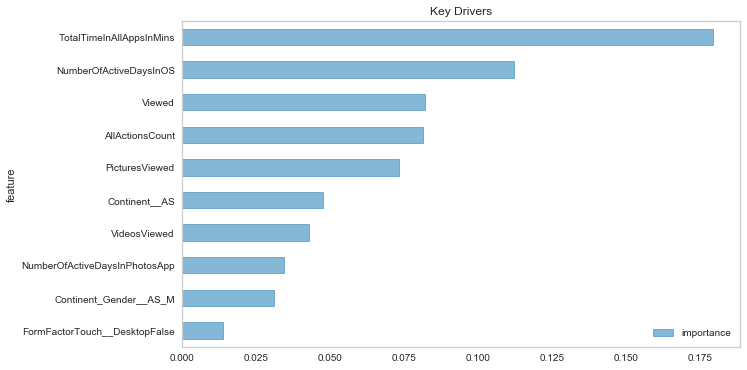

In [131]:
#Importance of variables
feature_importances_data = []
features = train_X.columns
for feature_name, feature_importance in zip(features, clf_rf.feature_importances_):
    feature_importances_data.append({
        'feature': feature_name,
        'importance': feature_importance
    })

# Plot the results
pd.DataFrame(feature_importances_data)\
    .set_index('feature')\
    .sort_values(by='importance')[-10::]\
    .plot(title='Key Drivers',
          kind='barh',
          figsize=(10, 6),
          color='#348ABD',
          alpha=0.6,
          lw='1',
          edgecolor='#348ABD',
          grid=False,)

#### Unsupervised Learning - K-means clustering

In [132]:
#As an example, run K-means clustering to see any additional insights can be found. 

In [133]:
#Columns to cluster
cols = ['Continent','AgeGroup','AllActionsCount', 'TotalTimeInPhotosAppInMins']
#cols = ['Continent', 'FormFactorTouch', 'AllActionsCount', 'TotalTimeInPhotosAppInMins']
train = df[cols]

train.loc[(train['AgeGroup'] == '<18'),'AgeGroup_num']= 'A1'
train.loc[(train['AgeGroup'] == '[18-25)'),'AgeGroup_num']= 'A2'
train.loc[(train['AgeGroup'] == '[25-35)'),'AgeGroup_num']='A3'
train.loc[(train['AgeGroup'] == '[35-50)'),'AgeGroup_num']='A4'
train.loc[(train['AgeGroup'] == '>=50'),'AgeGroup_num']='A5'
train.loc[(train['AgeGroup'] == 'Missing'),'AgeGroup_num']='A6'
#train['AgeGroup']=train['AgeGroup_num']

#train = train.drop(columns=['AgeGroup_num'])

In [134]:
train.head()

Continent AgeGroup  AllActionsCount  TotalTimeInPhotosAppInMins AgeGroup_num
1        EU  [25-35)                3                           0           A3
2        AS  Missing                3                           0           A6
3        EU     >=50                8                           6           A5
4        AF  Missing              158                           8           A6
5        NA  Missing                9                           0           A6

In [135]:
#pre-processing: scaling numerical values
num_cols = ['AllActionsCount', 'TotalTimeInPhotosAppInMins']
train[num_cols] = StandardScaler().fit_transform(train[num_cols])

In [136]:
#pre-processing label encoding
cat_cols = ['Continent', 'AgeGroup_num']
for f in cat_cols:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train[f].values))
    train[f] = lbl.transform(list(train[f].values))

train= train.drop(columns=['AgeGroup'])

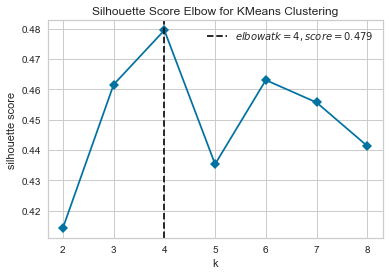

In [137]:
#elbow method: based on silhouette scores
# Instantiate the clustering model and visualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=False)  

# Fit the data to the visualizer
visualizer.fit(train)   
# Draw/show/poof the data
visualizer.poof()    

In [138]:
# Run k-means with the selected number of clusters
clustering_model = KMeans(n_clusters=4)

In [139]:
%time clusters = clustering_model.fit_predict(train)

#Join our original dataset with the cluster labels we found.
model = train.join(pd.Series(clusters, index=train.index, name='cluster'))
model['cluster'] = model['cluster'].map(lambda cluster_id: cluster_id)

Wall time: 2.06 s


In [140]:
model.head()

Continent  AllActionsCount  TotalTimeInPhotosAppInMins  AgeGroup_num  \
1          2        -0.324556                   -0.221806             2   
2          1        -0.324556                   -0.221806             5   
3          2        -0.314562                   -0.154836             4   
4          0        -0.014755                   -0.132512             5   
5          3        -0.312563                   -0.221806             5   

   cluster  
1        2  
2        1  
3        1  
4        1  
5        1

In [141]:
#Compute the cluster sizes
cluster_size = pd.DataFrame({'size': model['cluster'].value_counts()})
cluster_size.head()

size
1  29874
2  25748
0  11487
3     60

In [142]:
#Cluster means
(model.groupby(['cluster'])['Continent', 'AgeGroup_num', 'AllActionsCount','TotalTimeInPhotosAppInMins'].agg(["mean",pd.Series.mode, "count"]).round(2))

Continent             AgeGroup_num             AllActionsCount        \
             mean mode  count         mean mode  count            mean  mode   
cluster                                                                        
0            4.93    5  11487         3.92    5  11487           -0.04 -0.33   
1            1.78    2  29874         4.86    5  29874            0.05 -0.33   
2            1.95    2  25748         1.85    2  25748           -0.04 -0.33   
3            1.85    1     60         2.10    1     60            1.39  1.56   

               TotalTimeInPhotosAppInMins                
         count                       mean   mode  count  
cluster                                                  
0        11487                      -0.06  -0.22  11487  
1        29874                      -0.02  -0.22  29874  
2        25748                      -0.01  -0.22  25748  
3           60                      25.13  20.27     60

In [143]:
#Silhouette score
silhouette = silhouette_score(train.values, clusters, metric='euclidean', sample_size=2000)
print ("Silhouette score :", silhouette)

Silhouette score : 0.47954826709777515


Text(25.815498046875, 0.5, 'TotalTimeInPhotosAppInMins')

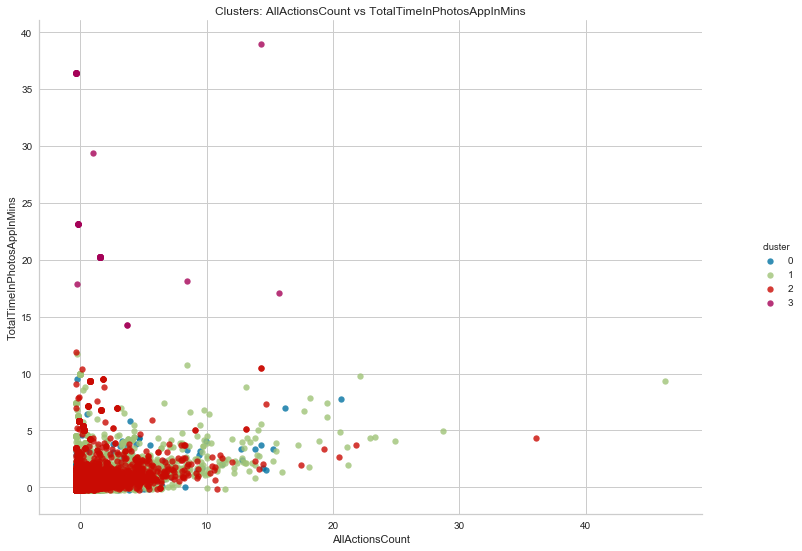

In [144]:
#Scatter plots
g = sns.lmplot('AllActionsCount', 'TotalTimeInPhotosAppInMins',  data=model,  
               fit_reg=False,  hue="cluster",   scatter_kws={"marker": "D", "s": 40})
g.fig.set_figwidth(12), g.fig.set_figheight(8)
plt.title('Clusters: AllActionsCount vs TotalTimeInPhotosAppInMins')
plt.xlabel('AllActionsCount')
plt.ylabel('TotalTimeInPhotosAppInMins')

#clusters = [0,1,2,3]
#i=0
#for c in clusters:
#    model_cluster = model[model['cluster'] ==i] 
#    sns.lmplot('AllActionsCount', 'TotalTimeInPhotosAppInMins',  data=model_cluster,  
#               fit_reg=False,  hue="cluster",   scatter_kws={"marker": "D", "s": 40})
#    i=i+1
#plt.show()

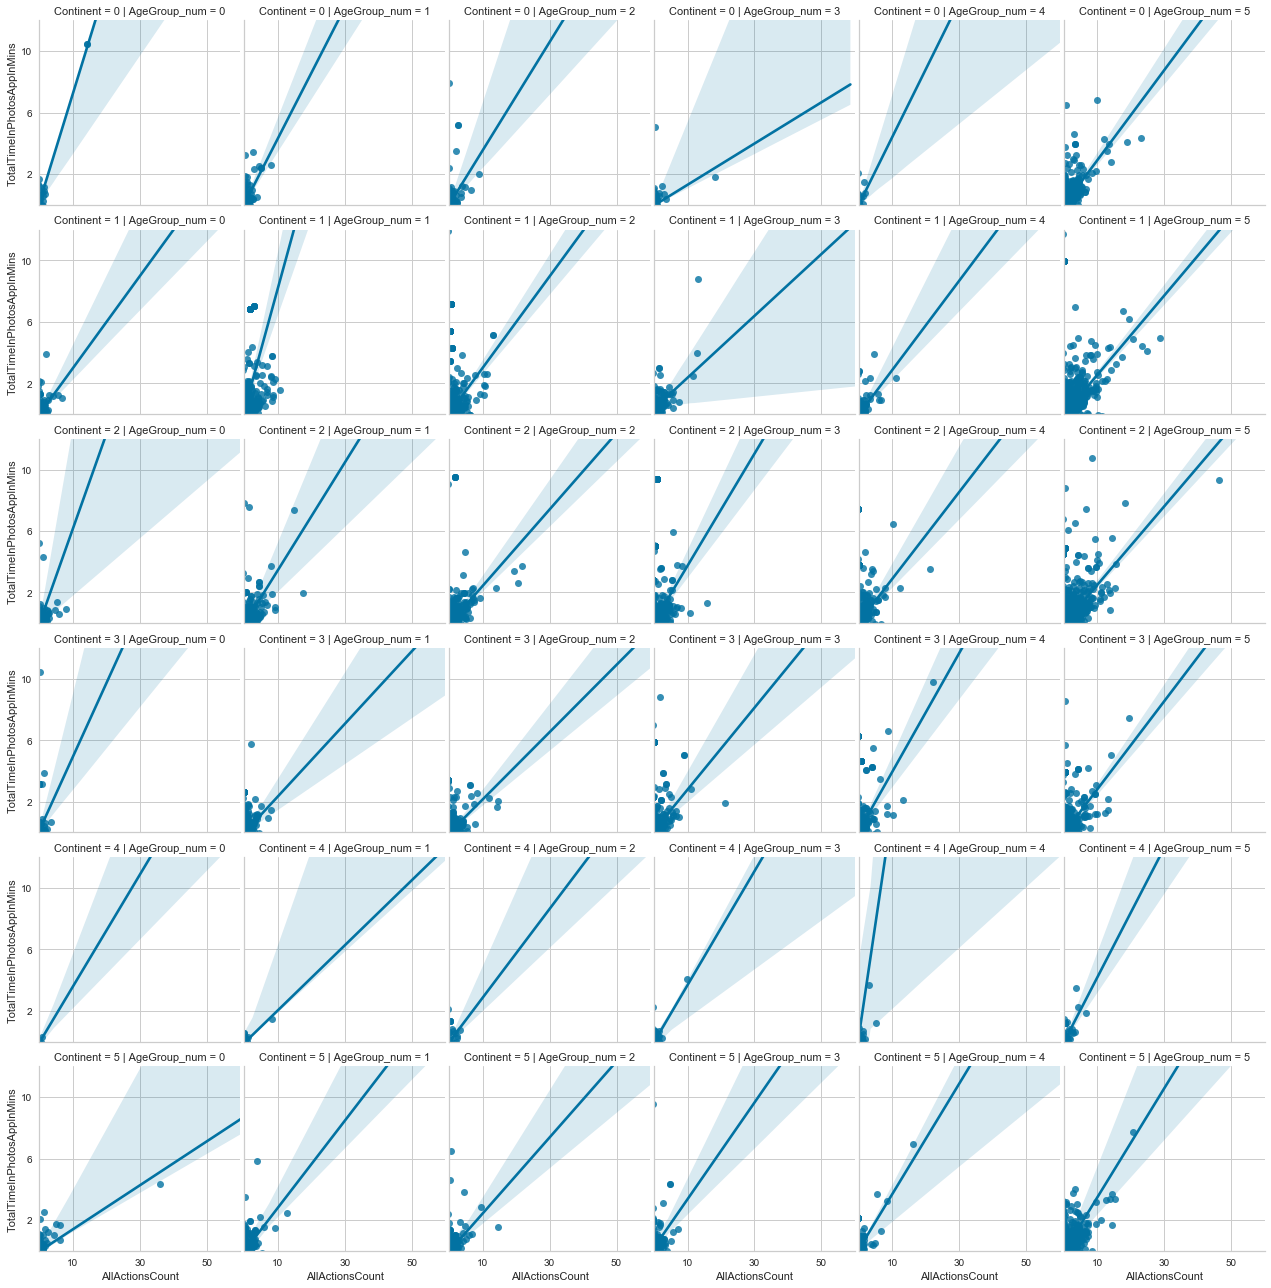

In [145]:
g = sns.lmplot(x="AllActionsCount", y="TotalTimeInPhotosAppInMins", row="Continent", col="AgeGroup_num",
               data=model, height=3)
g = (g.set_axis_labels("AllActionsCount", "TotalTimeInPhotosAppInMins")
      .set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
      .fig.subplots_adjust(wspace=.02))

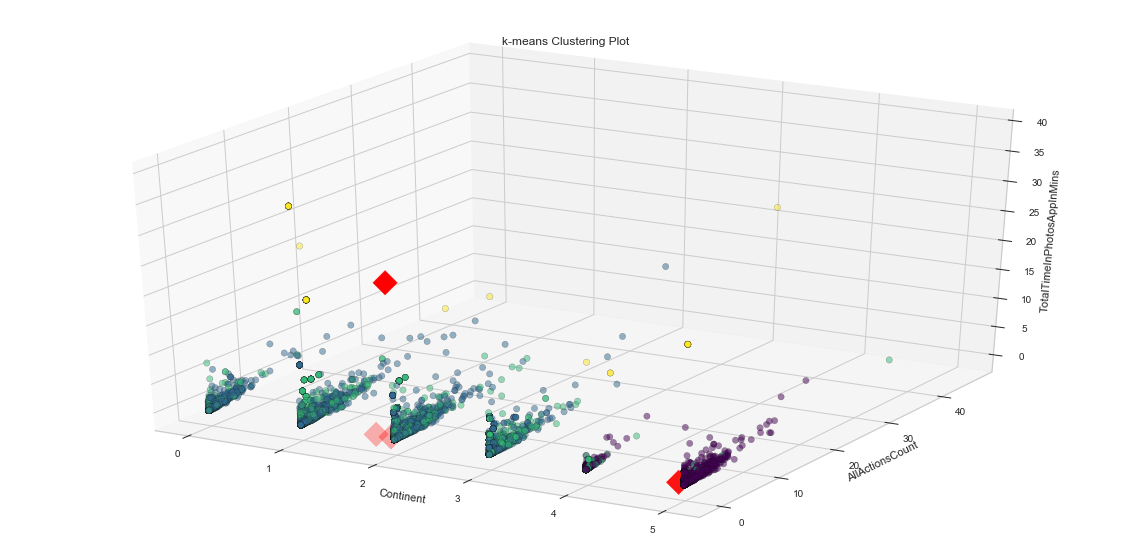

In [147]:
#3D Clustering Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(model['Continent'],model['AllActionsCount'], model['TotalTimeInPhotosAppInMins'], c=model['cluster'], cmap='viridis', \
           edgecolor='k', s=40, alpha = 0.5)


ax.set_title("k-means Clustering Plot")
ax.set_xlabel("Continent")
ax.set_ylabel("AllActionsCount")
ax.set_zlabel("TotalTimeInPhotosAppInMins")
ax.dist = 10

ax.scatter(clustering_model.cluster_centers_[:,0], clustering_model.cluster_centers_[:,1], \
           clustering_model.cluster_centers_[:,2], s = 300, c = 'red', marker='D',  label = 'Centroid')

plt.autoscale(enable=True, axis='x', tight=True)    

plt.show()